# DESCRIPTIVE STATISTICS:

### This code will begin similar to the one for the main model, but will not feature a train test split or a model building; wrangling will continue until one step before model building and then will focus on the dataframe's descriptive statistics
### These steps as they are present here would induce data leakage if they were to feed a model

Data ingestion<br>

Data wrangling and feature engineering
- Outlier removal<br>
- Tokenization and cleanup of job titles<br>
- Creation of dummies for all categorical variables<br>
- Feature selection and database cleanup<br>
- Independent variable normalization<br>

### Data description
- Categorical entries' volumes<br>
- Dummies' impacts charts and tables<br>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.api import qqplot
from scipy.stats import boxcox, normaltest, kstest

In [2]:
sns.set() # makes all charts look better by default

## Data Ingestion

In [3]:
aijobs = pd.read_csv(r'https://ai-jobs.net/salaries/download/salaries.csv')
# Last accessed at 2024-03-23

In [4]:
aijobs # first look at the data

work_year experience_level employment_type                 job_title  \
0           2024               MI              FT             Data Engineer   
1           2024               SE              PT            Data Architect   
2           2024               SE              PT            Data Architect   
3           2024               MI              FT        Data Product Owner   
4           2024               MI              FT        Data Product Owner   
...          ...              ...             ...                       ...   
14796       2020               SE              FT            Data Scientist   
14797       2021               MI              FT  Principal Data Scientist   
14798       2020               EN              FT            Data Scientist   
14799       2020               EN              CT     Business Data Analyst   
14800       2021               SE              FT      Data Science Manager   

        salary salary_currency  salary_in_usd employee_residence  \
0       120000             CHF         136363                 CH   
1       212000             USD         212000                 US   
2        93300             USD          93300                 US   
3       321830             USD         321830                 US   
4       124690             USD         124690                 US   
...        ...             ...            ...                ...   
14796   412000             USD         412000                 US   
14797   151000             USD         151000                 US   
14798   105000             USD         105000                 US   
14799   100000             USD         100000                 US   
14800  7000000             INR          94665                 IN   

       remote_ratio company_location company_size  
0                50               CH            L  
1                 0               US            M  
2                 0               US            M  
3                 0               US            M  
4                 0               US            M  
...             ...              ...          ...  
14796           100               US            L  
14797           100               US            L  
14798           100               US            S  
14799           100               US            L  
14800            50               IN            L  

[14801 rows x 11 columns]

In [5]:
aijobs.describe(include='all')

work_year experience_level employment_type      job_title  \
count   14801.000000            14801           14801          14801   
unique           NaN                4               4            152   
top              NaN               SE              FT  Data Engineer   
freq             NaN             9673           14735           3158   
mean     2023.136748              NaN             NaN            NaN   
std         0.700349              NaN             NaN            NaN   
min      2020.000000              NaN             NaN            NaN   
25%      2023.000000              NaN             NaN            NaN   
50%      2023.000000              NaN             NaN            NaN   
75%      2024.000000              NaN             NaN            NaN   
max      2024.000000              NaN             NaN            NaN   

              salary salary_currency  salary_in_usd employee_residence  \
count   1.480100e+04           14801   14801.000000              14801   
unique           NaN              23            NaN                 88   
top              NaN             USD            NaN                 US   
freq             NaN           13648            NaN              12896   
mean    1.650843e+05             NaN  149895.249307                NaN   
std     3.566669e+05             NaN   69037.515089                NaN   
min     1.400000e+04             NaN   15000.000000                NaN   
25%     1.021000e+05             NaN  102000.000000                NaN   
50%     1.422000e+05             NaN  141525.000000                NaN   
75%     1.875000e+05             NaN  185900.000000                NaN   
max     3.040000e+07             NaN  800000.000000                NaN   

        remote_ratio company_location company_size  
count   14801.000000            14801        14801  
unique           NaN               77            3  
top              NaN               US            M  
freq             NaN            12945        13638  
mean       32.801838              NaN          NaN  
std        46.502476              NaN          NaN  
min         0.000000              NaN          NaN  
25%         0.000000              NaN          NaN  
50%         0.000000              NaN          NaN  
75%       100.000000              NaN          NaN  
max       100.000000              NaN          NaN

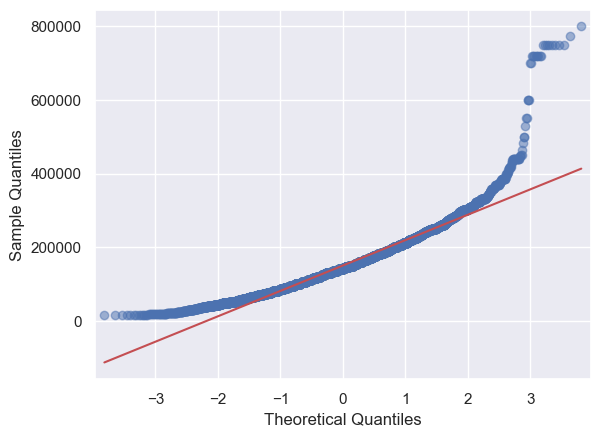

In [6]:
qqplot(aijobs['salary_in_usd'], line='s', alpha=0.5)
plt.show()

# Common data wrangling
These steps would be equally done for train and test bases with no population or sampled information, only individual ones, so no data leakage will occur if done now.

### Outlier removal

In [7]:
# The first outliers are extremely out of touch with the remainder of the database.
# They will skew the results too much and must be removed.
# According to Hair, from 2.5 to 4 standards deviations might be used to remove outliers.
# Visually, 4 deviations cover the worst cases.

mean = aijobs['salary_in_usd'].mean()
std = aijobs['salary_in_usd'].std()
outmax = mean + 4 * std
print(outmax)
outliers = aijobs[aijobs['salary_in_usd'] > outmax].index
print(outliers)
print(len(outliers))

aijobs.drop(outliers, inplace=True)
aijobs.reset_index(drop=True, inplace=True)
aijobs.sort_values('salary_in_usd', ascending=False).head()

426045.3096650862
Index([  153,   157,   410,   455,   569,   617,   892,   894,   902,  1071,
        1576,  1699,  1906,  1907,  1914,  1922,  2385,  2397,  2413,  2427,
        2455,  2483,  2573,  2577,  2713,  2889,  3113,  3300,  3519,  3804,
        3861,  3871,  3885,  3905,  3929,  4063,  4075,  4079,  4105,  4115,
        4119,  4673,  4679,  4982,  5333,  5609,  5657,  5765, 11095, 13095,
       14583],
      dtype='int64')
51


work_year experience_level employment_type  \
14742       2021               MI              FT   
3773        2024               SE              FT   
3298        2024               SE              FT   
11574       2023               SE              FT   
14677       2021               EX              CT   

                                job_title   salary salary_currency  \
14742  Applied Machine Learning Scientist   423000             USD   
3773            Machine Learning Engineer   418000             USD   
3298            Machine Learning Engineer   418000             USD   
11574                        AI Scientist  1500000             ILS   
14677            Principal Data Scientist   416000             USD   

       salary_in_usd employee_residence  remote_ratio company_location  \
14742         423000                 US            50               US   
3773          418000                 US           100               US   
3298          418000                 US           100               US   
11574         417937                 IL             0               IL   
14677         416000                 US           100               US   

      company_size  
14742            L  
3773             M  
3298             M  
11574            L  
14677            S

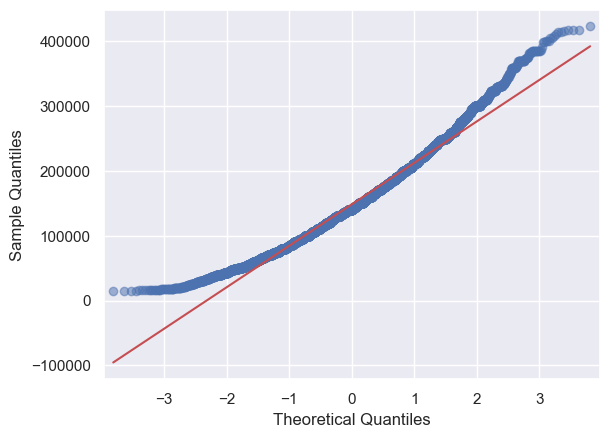

In [8]:
qqplot(aijobs['salary_in_usd'], line='s', alpha=0.5)
plt.show()

In [9]:
aijobs.describe(include='all')

work_year experience_level employment_type      job_title  \
count   14750.000000            14750           14750          14750   
unique           NaN                4               4            152   
top              NaN               SE              FT  Data Engineer   
freq             NaN             9650           14684           3156   
mean     2023.134712              NaN             NaN            NaN   
std         0.699531              NaN             NaN            NaN   
min      2020.000000              NaN             NaN            NaN   
25%      2023.000000              NaN             NaN            NaN   
50%      2023.000000              NaN             NaN            NaN   
75%      2024.000000              NaN             NaN            NaN   
max      2024.000000              NaN             NaN            NaN   

              salary salary_currency  salary_in_usd employee_residence  \
count   1.475000e+04           14750   14750.000000              14750   
unique           NaN              23            NaN                 88   
top              NaN             USD            NaN                 US   
freq             NaN           13599            NaN              12849   
mean    1.636749e+05             NaN  148422.371390                NaN   
std     3.563792e+05             NaN   63942.227074                NaN   
min     1.400000e+04             NaN   15000.000000                NaN   
25%     1.020000e+05             NaN  101570.000000                NaN   
50%     1.420000e+05             NaN  141000.000000                NaN   
75%     1.868460e+05             NaN  185900.000000                NaN   
max     3.040000e+07             NaN  423000.000000                NaN   

        remote_ratio company_location company_size  
count   14750.000000            14750        14750  
unique           NaN               77            3  
top              NaN               US            M  
freq             NaN            12898        13587  
mean       32.861017              NaN          NaN  
std        46.522770              NaN          NaN  
min         0.000000              NaN          NaN  
25%         0.000000              NaN          NaN  
50%         0.000000              NaN          NaN  
75%       100.000000              NaN          NaN  
max       100.000000              NaN          NaN

## Feature Engineering

In [10]:
# There is no value in local currency salaries as they're not scaled.
# Salary in USD conveys the same useful information in a scaled manner.
aijobs.drop('salary', axis=1, inplace=True)

In [11]:
# An interesting variable to research
aijobs['work_abroad'] = aijobs['employee_residence'] != aijobs['company_location']
aijobs['work_abroad'] = aijobs['work_abroad'].astype(int)
aijobs.tail(10)

work_year experience_level employment_type  \
14740       2021               SE              FT   
14741       2021               MI              FT   
14742       2021               MI              FT   
14743       2021               MI              FT   
14744       2021               SE              FT   
14745       2020               SE              FT   
14746       2021               MI              FT   
14747       2020               EN              FT   
14748       2020               EN              CT   
14749       2021               SE              FT   

                                job_title salary_currency  salary_in_usd  \
14740            Director of Data Science             USD         168000   
14741                      Data Scientist             SGD         119059   
14742  Applied Machine Learning Scientist             USD         423000   
14743                       Data Engineer             EUR          28369   
14744                     Data Specialist             USD         165000   
14745                      Data Scientist             USD         412000   
14746            Principal Data Scientist             USD         151000   
14747                      Data Scientist             USD         105000   
14748               Business Data Analyst             USD         100000   
14749                Data Science Manager             INR          94665   

      employee_residence  remote_ratio company_location company_size  \
14740                 JP             0               JP            S   
14741                 SG           100               IL            M   
14742                 US            50               US            L   
14743                 MT            50               MT            L   
14744                 US           100               US            L   
14745                 US           100               US            L   
14746                 US           100               US            L   
14747                 US           100               US            S   
14748                 US           100               US            L   
14749                 IN            50               IN            L   

       work_abroad  
14740            0  
14741            1  
14742            0  
14743            0  
14744            0  
14745            0  
14746            0  
14747            0  
14748            0  
14749            0

In [12]:
# remote_ratio is categorical; the correct way to interpret those numbers is:
#   0 == On Site (less than 20% remote)
#  50 == Partially remote/hybird
# 100 == Fully remote (more than 80% remote)
# therefore using it as numerical would be creating a spurious relationship.
# It has to be dummified and will be switched for easier interpretation.

aijobs.loc[aijobs['remote_ratio'] == 0, 'remote_ratio'] = 'On_Site'
aijobs.loc[aijobs['remote_ratio'] == 50, 'remote_ratio'] = 'Hybrid'
aijobs.loc[aijobs['remote_ratio'] == 100, 'remote_ratio'] = 'Remote'

aijobs['remote_ratio']

0         Hybrid
1        On_Site
2        On_Site
3        On_Site
4        On_Site
          ...   
14745     Remote
14746     Remote
14747     Remote
14748     Remote
14749     Hybrid
Name: remote_ratio, Length: 14750, dtype: object

In [13]:
# Categorical columns will receive appropriate treatment
categorical_columns = ['experience_level', 'employment_type', 'salary_currency', 'employee_residence', 'remote_ratio', 
                       'company_location', 'company_size']

In [14]:
# Quick look at job titles. This will receive a quick NLP method for processing.
print(len(aijobs.job_title.unique()), "different job titles \n")
print(aijobs.job_title.unique())

152 different job titles 

['Data Engineer' 'Data Architect' 'Data Product Owner' 'MLOps Engineer'
 'Data Specialist' 'Data Manager' 'Analytics Engineer' 'Data Analyst'
 'Machine Learning Scientist' 'Business Intelligence Engineer'
 'Data Scientist' 'Business Intelligence Analyst' 'Data Science'
 'Data Analytics Manager' 'Encounter Data Management Professional'
 'Machine Learning Engineer' 'Research Scientist' 'Research Engineer'
 'AI Engineer' 'Data Modeler' 'Research Analyst' 'ML Engineer'
 'Data Science Consultant' 'Applied Scientist' 'BI Analyst'
 'Data Integration Engineer' 'Data Integration Specialist'
 'Machine Learning Operations Engineer'
 'Machine Learning Infrastructure Engineer' 'Data Developer'
 'Business Intelligence' 'CRM Data Analyst' 'ETL Developer'
 'Business Intelligence Manager' 'Data Science Engineer' 'AI Architect'
 'Robotics Engineer' 'BI Developer' 'Head of Data' 'Data Science Manager'
 'Cloud Database Engineer' 'Data Operations Analyst'
 'Data Science Analyst' 

In [15]:
# Work on the terms contained in job titles.
terms = []
for title in aijobs.job_title.unique():
    for word in title.split():
        terms.append(word)
terms = sorted(set(terms))
print(len(terms), "different terms in these titles \n")
print(terms)

82 different terms in these titles 

['&', 'AI', 'AWS', 'Admin', 'Analyst', 'Analytics', 'Applied', 'Architect', 'Associate', 'Autonomous', 'Azure', 'BI', 'Big', 'Biologist', 'Business', 'CRM', 'Cloud', 'Compliance', 'Computational', 'Computer', 'Consultant', 'Data', 'Database', 'Decision', 'Deep', 'DevOps', 'Developer', 'Director', 'ETL', 'Encounter', 'Engineer', 'Engineering', 'Finance', 'Financial', 'Head', 'Infrastructure', 'Insight', 'Integration', 'Intelligence', 'Lead', 'Learning', 'ML', 'MLOps', 'Machine', 'Management', 'Manager', 'Managing', 'Marketing', 'Modeler', 'Modeller', 'NLP', 'Operations', 'Ops', 'Owner', 'Pipeline', 'Power', 'Practitioner', 'Principal', 'Product', 'Professional', 'Programmer', 'Prompt', 'Quality', 'Quantitative', 'Reporting', 'Research', 'Researcher', 'Robotics', 'Sales', 'Science', 'Scientist', 'Software', 'Specialist', 'Staff', 'Strategist', 'Strategy', 'Tech', 'Technician', 'Vehicle', 'Vision', 'Visualization', 'of']


In [16]:
stop_words = ['&', 'of', 'Data', 'Learning', 'Computational', 'Computer', 'Autonomous', 'Technician', 'Professional']
# Justification: '&', 'of' and 'Data' are too generic for this project.
# 'Learning' has two contexts: Machine Learning and Deep Learning, yet both "Machine" and "Deep" are unique to them,
# so there's nothing to be gained from adding it.
# "Autonomous Vehicle Technician" is a job title whose words are all unique, so a single one is enough.
# "Computational Biologist" shares the same issue.
# "Encounter Data Management Professional" is the only to use "Encounter" and "Professional".
# "Computer Vision" is present in more than one job, but all of them use this same sequence, so it's the same situation.

In [17]:
synonym_terms = ['ML','Machine','MLOps', 'Operations','Business','BI','Intelligence','AWS','Cloud','Azure','Modeller','Modeler',
                 'Engineering','Engineer','Financial','Finance','Researcher','Research','Science','Scientist',
                 'Strategy','Strategist','Management','Manager', 'Managing']

In [18]:
# this uses the same pressupositions as above, but some words will mean the same thing.
synonyms = {'Machine': 'Machine|ML|MLOps',      # ML is short for Machine Learning
            'Operations':'MLOps|Operations',    # Ops is short for Operations
            'Intelligence':'Intelligence|BI',   # BI is short for Business Intelligence (Intelligence is exclusive to BI)
            'Business':'Business|BI',           # For consistency (Business is not exclusive to BI)
            'Cloud':'Cloud|AWS|Azure',          # There is a single instance for AWS and for Azure; both specific cloud tools
            'Modeler':'Modeler|Modeller',       # Typo
            'Engineer':'Engineer|Engineering',
            'Finance':'Finance|Financial',
            'Research':'Research|Researcher',
            'Scientist':'Scientist|Science',
            'Strategist':'Strategist|Strategy',
            'Manager':'Management|Manager|Managing'}

In [19]:
clean_terms = terms.copy()                                                   # copy method to keep the original list
[clean_terms.remove(term) for term in stop_words if term in clean_terms]     # remove stop words
[clean_terms.remove(term) for term in synonym_terms if term in clean_terms]  # synonyms will be processed differently
print(len(clean_terms), "terms after cleaning \n\n", clean_terms)

48 terms after cleaning 

 ['AI', 'Admin', 'Analyst', 'Analytics', 'Applied', 'Architect', 'Associate', 'Big', 'Biologist', 'CRM', 'Compliance', 'Consultant', 'Database', 'Decision', 'Deep', 'DevOps', 'Developer', 'Director', 'ETL', 'Encounter', 'Head', 'Infrastructure', 'Insight', 'Integration', 'Lead', 'Marketing', 'NLP', 'Ops', 'Owner', 'Pipeline', 'Power', 'Practitioner', 'Principal', 'Product', 'Programmer', 'Prompt', 'Quality', 'Quantitative', 'Reporting', 'Robotics', 'Sales', 'Software', 'Specialist', 'Staff', 'Tech', 'Vehicle', 'Vision', 'Visualization']


In [20]:
# dummization for all chosen job keywords
for job_string in clean_terms:
    aijobs['job_name_' + job_string] = aijobs['job_title'].str.contains(job_string, case=False).astype(int)
for job_string in synonyms.keys():
    aijobs['job_name_' + job_string] = aijobs['job_title'].str.contains(f'{synonyms[job_string]}', case=False).astype(int)
aijobs

work_year experience_level employment_type                 job_title  \
0           2024               MI              FT             Data Engineer   
1           2024               SE              PT            Data Architect   
2           2024               SE              PT            Data Architect   
3           2024               MI              FT        Data Product Owner   
4           2024               MI              FT        Data Product Owner   
...          ...              ...             ...                       ...   
14745       2020               SE              FT            Data Scientist   
14746       2021               MI              FT  Principal Data Scientist   
14747       2020               EN              FT            Data Scientist   
14748       2020               EN              CT     Business Data Analyst   
14749       2021               SE              FT      Data Science Manager   

      salary_currency  salary_in_usd employee_residence remote_ratio  \
0                 CHF         136363                 CH       Hybrid   
1                 USD         212000                 US      On_Site   
2                 USD          93300                 US      On_Site   
3                 USD         321830                 US      On_Site   
4                 USD         124690                 US      On_Site   
...               ...            ...                ...          ...   
14745             USD         412000                 US       Remote   
14746             USD         151000                 US       Remote   
14747             USD         105000                 US       Remote   
14748             USD         100000                 US       Remote   
14749             INR          94665                 IN       Hybrid   

      company_location company_size  ...  job_name_Intelligence  \
0                   CH            L  ...                      0   
1                   US            M  ...                      0   
2                   US            M  ...                      0   
3                   US            M  ...                      0   
4                   US            M  ...                      0   
...                ...          ...  ...                    ...   
14745               US            L  ...                      0   
14746               US            L  ...                      0   
14747               US            S  ...                      0   
14748               US            L  ...                      0   
14749               IN            L  ...                      0   

       job_name_Business  job_name_Cloud  job_name_Modeler  job_name_Engineer  \
0                      0               0                 0                  1   
1                      0               0                 0                  0   
2                      0               0                 0                  0   
3                      0               0                 0                  0   
4                      0               0                 0                  0   
...                  ...             ...               ...                ...   
14745                  0               0                 0                  0   
14746                  0               0                 0                  0   
14747                  0               0                 0                  0   
14748                  1               0                 0                  0   
14749                  0               0                 0                  0   

       job_name_Finance  job_name_Research  job_name_Scientist  \
0                     0                  0                   0   
1                     0                  0                   0   
2                     0                  0                   0   
3                     0                  0                   0   
4                     0                  0                   0   
...                

In [21]:
df_dummies = pd.get_dummies(aijobs[categorical_columns], dtype=int)
aijobs = pd.concat([aijobs, df_dummies], axis=1)

aijobs

work_year experience_level employment_type                 job_title  \
0           2024               MI              FT             Data Engineer   
1           2024               SE              PT            Data Architect   
2           2024               SE              PT            Data Architect   
3           2024               MI              FT        Data Product Owner   
4           2024               MI              FT        Data Product Owner   
...          ...              ...             ...                       ...   
14745       2020               SE              FT            Data Scientist   
14746       2021               MI              FT  Principal Data Scientist   
14747       2020               EN              FT            Data Scientist   
14748       2020               EN              CT     Business Data Analyst   
14749       2021               SE              FT      Data Science Manager   

      salary_currency  salary_in_usd employee_residence remote_ratio  \
0                 CHF         136363                 CH       Hybrid   
1                 USD         212000                 US      On_Site   
2                 USD          93300                 US      On_Site   
3                 USD         321830                 US      On_Site   
4                 USD         124690                 US      On_Site   
...               ...            ...                ...          ...   
14745             USD         412000                 US       Remote   
14746             USD         151000                 US       Remote   
14747             USD         105000                 US       Remote   
14748             USD         100000                 US       Remote   
14749             INR          94665                 IN       Hybrid   

      company_location company_size  ...  company_location_SI  \
0                   CH            L  ...                    0   
1                   US            M  ...                    0   
2                   US            M  ...                    0   
3                   US            M  ...                    0   
4                   US            M  ...                    0   
...                ...          ...  ...                  ...   
14745               US            L  ...                    0   
14746               US            L  ...                    0   
14747               US            S  ...                    0   
14748               US            L  ...                    0   
14749               IN            L  ...                    0   

       company_location_TH  company_location_TR  company_location_UA  \
0                        0                    0                    0   
1                        0                    0                    0   
2                        0                    0                    0   
3                        0                    0                    0   
4                        0                    0                    0   
...                    ...                  ...                  ...   
14745                    0                    0                    0   
14746                    0                    0                    0   
14747                    0                    0                    0   
14748                    0                    0                    0   
14749                    0                    0                    0   

       company_location_US  company_location_VN  company_location_ZA  \
0                        0                    0                    0   
1                        1                    0                    0   
2                        1                    0                    0   
3                        1                    0                    0   
4                        1                    0                    0   
...                    ...                  ...                  ...   
14745                    1                 

In [22]:
aijobs[categorical_columns].describe().loc['unique']

experience_level       4
employment_type        4
salary_currency       23
employee_residence    88
remote_ratio           3
company_location      77
company_size           3
Name: unique, dtype: object

In [23]:
# To establish the features, categorical columns that are not dummies will need to be removed. Target variable too.
# NOTE: COMPREHENSIVE DUMMIES WILL NOT HAVE AN INSTANCE REMOVED FOR STATISTICAL ANALYSIS
# AS THIS IS NOT FOR MODEL BUILDING, THERE IS NO INTERCEPT IMPLIED STANDARD FOR DUMMY VARIABLES

X_vars = aijobs.columns.tolist()
[X_vars.remove(col) for col in categorical_columns if col in X_vars]
X_vars.remove('job_title')
X_vars.remove('salary_in_usd')
X_vars

['work_year',
 'work_abroad',
 'job_name_AI',
 'job_name_Admin',
 'job_name_Analyst',
 'job_name_Analytics',
 'job_name_Applied',
 'job_name_Architect',
 'job_name_Associate',
 'job_name_Big',
 'job_name_Biologist',
 'job_name_CRM',
 'job_name_Compliance',
 'job_name_Consultant',
 'job_name_Database',
 'job_name_Decision',
 'job_name_Deep',
 'job_name_DevOps',
 'job_name_Developer',
 'job_name_Director',
 'job_name_ETL',
 'job_name_Encounter',
 'job_name_Head',
 'job_name_Infrastructure',
 'job_name_Insight',
 'job_name_Integration',
 'job_name_Lead',
 'job_name_Marketing',
 'job_name_NLP',
 'job_name_Ops',
 'job_name_Owner',
 'job_name_Pipeline',
 'job_name_Power',
 'job_name_Practitioner',
 'job_name_Principal',
 'job_name_Product',
 'job_name_Programmer',
 'job_name_Prompt',
 'job_name_Quality',
 'job_name_Quantitative',
 'job_name_Reporting',
 'job_name_Robotics',
 'job_name_Sales',
 'job_name_Software',
 'job_name_Specialist',
 'job_name_Staff',
 'job_name_Tech',
 'job_name_Vehicl

In [24]:
# Hair says 5 entries is a minimum threshold; any dummy with less than 5 examples is too prone to overfitting.
# They would be excluded from any model anyway, so they will not be part of the statistical analysis.
# This was adapted from a function created for the built models.

def del_vars(X_train, printing=False):
    """
    This function deletes all columns in training base that have too few instances and will result in overfitting
    It also deletes every row that had an instance in such columns in order to prevent assumptions implied in the intecept
    """
    
    if printing == True:
        print("Before:", X_train.shape)
    deletions = 1 #just to enter the loop
    train_dropped = []
    while deletions > 0:
        deletions = X_train.shape[0] # store the dataframe size for later comparison
        X_sum = X_train.sum()
        exclusion_list = X_sum[X_sum < 5].index # create the exclusion column list

        # deleting all rows with any positive value in those variables
        X_delete = X_train[exclusion_list].sum(axis=1)
        rows_to_delete = X_delete[X_delete != 0]
        X_train.drop(rows_to_delete.index, inplace=True)
        
        [train_dropped.append(item) for item in rows_to_delete.index] # list all deleted rows for later consistency wity y array
        deletions = deletions - X_train.shape[0] # difference from previous dataframe size
        if printing == True:
            print('Rows deleted:', deletions) # deleted rows in this loop
            print('Columns dropped:', len(exclusion_list)) # cumulative columns to be deleted
        # loop until there are no more deleted rows
        
    X_train.drop(exclusion_list, axis=1, inplace=True) # dropping columns from train base now
    
    if printing == True:
        print("After:", X_train.shape)

In [25]:
new_X = aijobs[X_vars + ['salary_in_usd']].copy()

In [26]:
del_vars(new_X, printing=True)

Before: (14750, 265)
Rows deleted: 157
Columns dropped: 116
Rows deleted: 31
Columns dropped: 132
Rows deleted: 8
Columns dropped: 135
Rows deleted: 0
Columns dropped: 135
After: (14554, 130)


In [27]:
new_X

work_year  work_abroad  job_name_AI  job_name_Analyst  \
0           2024            0            0                 0   
1           2024            0            0                 0   
2           2024            0            0                 0   
3           2024            0            0                 0   
4           2024            0            0                 0   
...          ...          ...          ...               ...   
14745       2020            0            0                 0   
14746       2021            0            0                 0   
14747       2020            0            0                 0   
14748       2020            0            0                 1   
14749       2021            0            0                 0   

       job_name_Analytics  job_name_Applied  job_name_Architect  \
0                       0                 0                   0   
1                       0                 0                   1   
2                       0                 0                   1   
3                       0                 0                   0   
4                       0                 0                   0   
...                   ...               ...                 ...   
14745                   0                 0                   0   
14746                   0                 0                   0   
14747                   0                 0                   0   
14748                   0                 0                   0   
14749                   0                 0                   0   

       job_name_Associate  job_name_Big  job_name_Consultant  ...  \
0                       0             0                    0  ...   
1                       0             0                    0  ...   
2                       0             0                    0  ...   
3                       0             0                    0  ...   
4                       0             0                    0  ...   
...                   ...           ...                  ...  ...   
14745                   0             0                    0  ...   
14746                   0             0                    0  ...   
14747                   0             0                    0  ...   
14748                   0             0                    0  ...   
14749                   0             0                    0  ...   

       company_location_PL  company_location_PT  company_location_SI  \
0                        0                    0                    0   
1                        0                    0                    0   
2                        0                    0                    0   
3                        0                    0                    0   
4                        0                    0                    0   
...                    ...                  ...                  ...   
14745                    0                    0                    0   
14746                    0                    0                    0   
14747                    0                    0                    0   
14748                    0                    0                    0   
14749                    0                    0                    0   

       company_location_UA  company_location_US  company_location_ZA  \
0                        0                    0                    0   
1                        0                    1                    0   
2                        0                    1                    0   
3                        0                    1                    0   
4                        0                    1                    0   
...                    ...                  ...                  ...   
14745                    0                    1                    0   
14746                    0                    1                    0   
14747                    0                    1                    0   
14748              

## Box-Cox transformation

Best Lambda Value: 0.4705


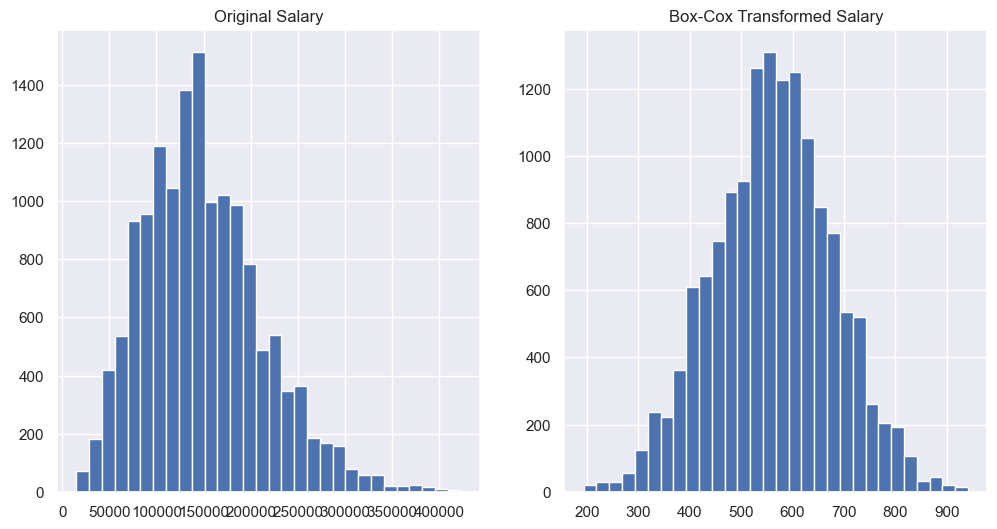

Normal test: NormaltestResult(statistic=2.1782559526526573, pvalue=0.3365098103196524)
Kolmogorov-Smirnov test: KstestResult(statistic=1.0, pvalue=0.0, statistic_location=193.87870151792984, statistic_sign=-1)


In [28]:
# fit the lambda and transform the train dependent variable
new_X['transformed_salary'], lmbda = boxcox(new_X['salary_in_usd'])
print(f'Best Lambda Value: {lmbda:.4f}')

# plot

plt.figure(figsize=(12, 6))

# Original
plt.subplot(1, 2, 1)
plt.hist(new_X['salary_in_usd'], bins=30)
plt.title('Original Salary')

# Transformed
plt.subplot(1, 2, 2)
plt.hist(new_X['transformed_salary'], bins=30)
plt.title('Box-Cox Transformed Salary')

plt.show()

print('Normal test:', normaltest(new_X['transformed_salary']))
print('Kolmogorov-Smirnov test:', kstest(new_X['transformed_salary'], "norm"))

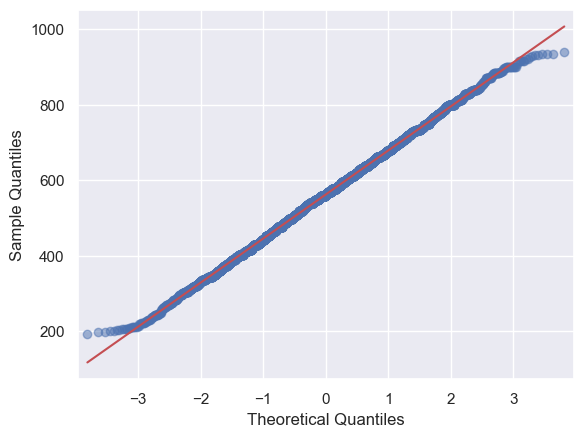

In [29]:
qqplot(new_X['transformed_salary'], line='s', alpha=0.5)
plt.show()

# DATA DESCRIPTION

In [30]:
pd.set_option('display.max_rows', None)

work_year
2023    8511
2024    4296
2022    1651
2021     218
2020      74
Name: count, dtype: int64


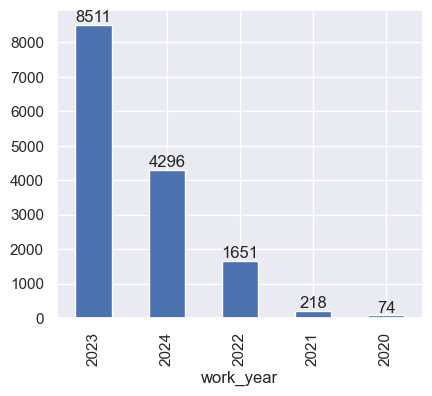

experience_level
SE    9650
MI    3517
EN    1145
EX     438
Name: count, dtype: int64


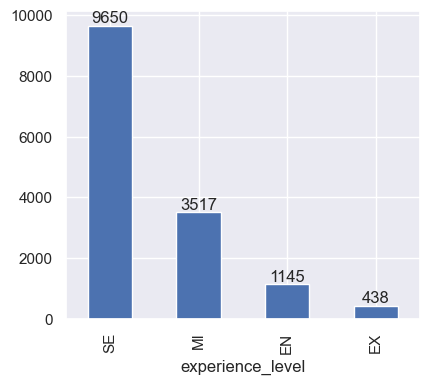

employment_type
FT    14684
PT       27
CT       26
FL       13
Name: count, dtype: int64


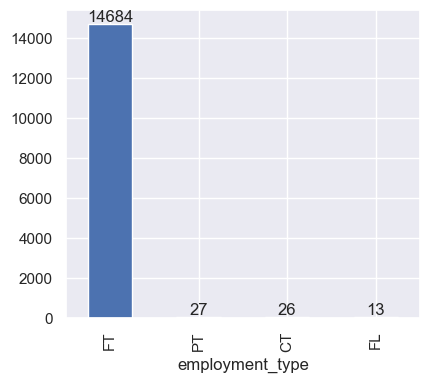

salary_currency
USD    13599
GBP      563
EUR      423
INR       53
CAD       51
AUD       12
CHF        8
PLN        7
SGD        6
JPY        4
BRL        4
DKK        3
HUF        3
TRY        3
NOK        2
THB        2
ZAR        1
HKD        1
ILS        1
PHP        1
NZD        1
MXN        1
CLP        1
Name: count, dtype: int64


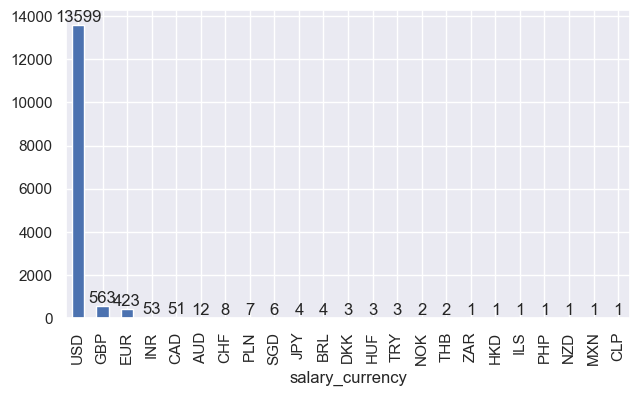

employee_residence
US    12849
GB      643
CA      385
ES      131
DE       90
IN       74
FR       65
AU       50
PT       30
NL       28
BR       23
IT       21
GR       17
CO       16
LT       16
PL       15
ZA       15
EG       14
LV       14
MX       13
NG       12
IE       12
AR       11
UA       11
EE       11
AT       10
PH        9
TR        8
JP        8
CH        8
PK        6
RU        6
VN        6
BE        6
SI        6
NZ        6
SG        5
HR        5
PR        5
RO        5
AE        5
TH        4
HU        4
GH        4
UZ        3
FI        3
SA        3
DK        3
MT        3
CF        2
HK        2
MD        2
SE        2
BO        2
NO        2
LB        2
AM        2
KE        2
CZ        2
BA        2
KR        2
CL        2
TN        2
IQ        1
MY        1
ID        1
BG        1
JE        1
DO        1
RS        1
CR        1
DZ        1
HN        1
GE        1
CN        1
AS        1
IR        1
CY        1
KW        1
IL        1
PE        1
EC       

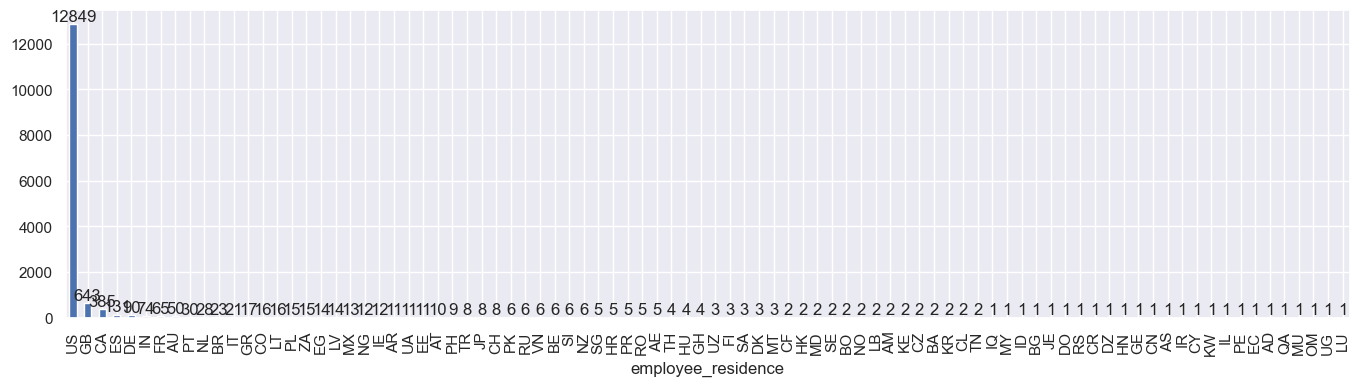

remote_ratio
On_Site    9779
Remote     4723
Hybrid      248
Name: count, dtype: int64


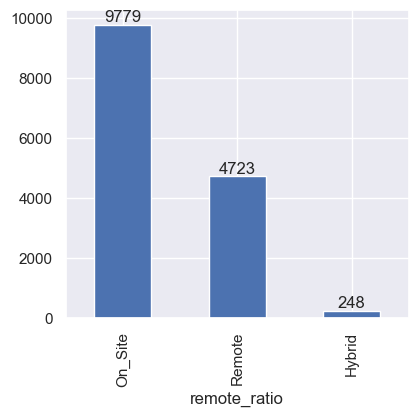

company_location
US    12898
GB      651
CA      387
ES      127
DE       97
FR       61
IN       59
AU       53
NL       28
PT       28
BR       21
CO       16
LT       16
ZA       15
PL       14
LV       14
GR       14
IT       14
MX       14
EG       13
EE       12
IE       12
UA       10
AT       10
CH        9
NG        9
JP        8
AR        7
RU        7
PH        6
NZ        6
TR        6
SI        6
AE        5
SG        5
DK        5
VN        4
HU        4
FI        4
PR        4
BE        4
RO        4
CZ        3
TH        3
HR        3
IL        3
SE        3
GH        3
MT        3
SA        3
AS        3
LU        3
LB        2
KR        2
BA        2
ID        2
PK        2
NO        2
KE        2
CF        2
MY        1
DZ        1
HN        1
IQ        1
CN        1
CL        1
OM        1
QA        1
BS        1
IR        1
AM        1
HK        1
GI        1
EC        1
AD        1
MU        1
MD        1
Name: count, dtype: int64


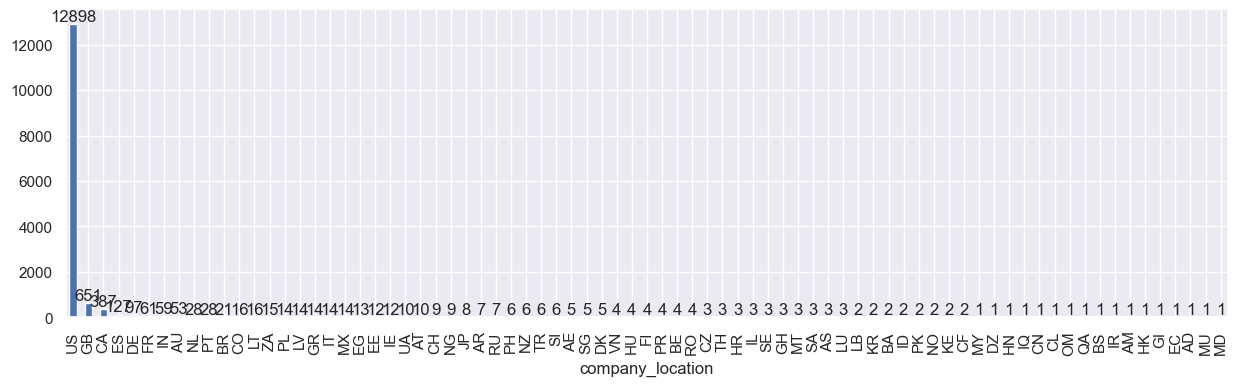

company_size
M    13587
L      983
S      180
Name: count, dtype: int64


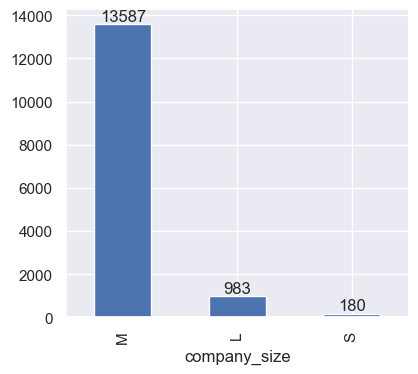

In [31]:
# Quick chart view of the raw base counts for all categorical columns. They're not present in the "new_X" dataframe.
for col in ['work_year'] + categorical_columns:
    group = aijobs[col].value_counts()
    print(group)
    ax = group.plot(kind='bar', figsize=(len(group)/7+4, 4))
    ax.bar_label(ax.containers[0])
    plt.show()

mean           std  count
work_year                                    
2023       153254.955939  63400.838477   8511
2024       147642.146415  64890.791412   4296
2022       134224.445790  57268.969065   1651
2021        99922.073394  67072.030451    218
2020        97551.554054  72510.454072     74

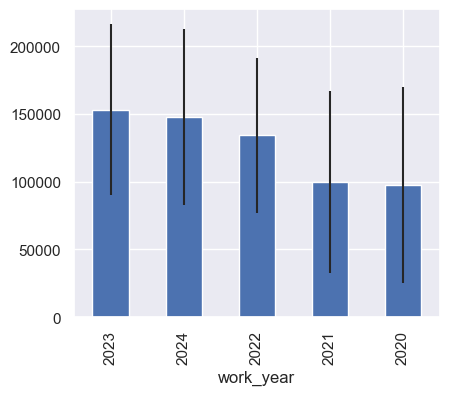

mean           std  count
experience_level                                    
SE                162760.030570  60760.869714   9650
MI                122201.085016  55736.343214   3517
EN                 91082.483843  48210.729909   1145
EX                192979.504566  68696.400577    438

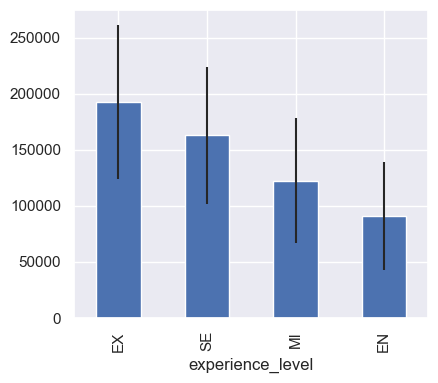

mean           std  count
employment_type                                    
FT               148718.692999  63751.165983  14684
PT                69608.037037  49895.031732     27
CT               112007.500000  95205.536251     26
FL                50236.769231  25715.401964     13

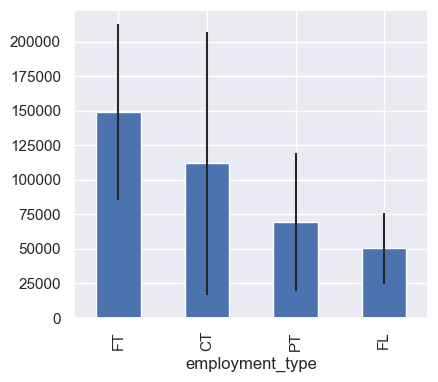

mean           std  count
salary_currency                                    
USD              154819.293551  61283.257555  13599
GBP               79778.476021  42589.534095    563
EUR               64242.827423  32825.973036    423
INR               34166.132075  19328.497632     53
CAD              110108.313725  52623.225644     51
AUD               78660.000000  26425.228393     12
CHF              137187.500000  79146.017766      8
PLN               36099.428571  10611.082962      7
SGD               81724.333333  20167.539718      6
JPY               56143.250000  17530.802765      4
BRL               26168.750000   8958.935330      4
DKK               31192.666667  13596.868475      3
TRY               22189.333333   5124.798370      3
HUF               29892.666667  10576.261170      3
NOK               88462.000000  16905.508925      2
THB               26957.000000   3314.916590      2
ILS              417937.000000           NaN      1
MXN               33511.000000           NaN      1
ZAR               34482.000000           NaN      1
CLP               40038.000000           NaN      1
HKD               65058.000000           NaN      1
NZD              125000.000000           NaN      1
PHP               15680.000000           NaN      1

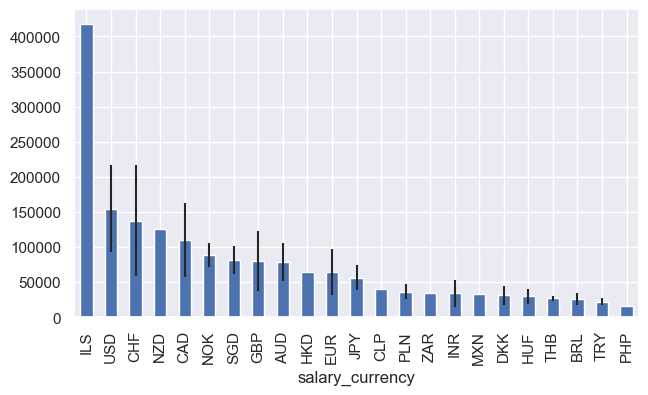

mean           std  count
employee_residence                                    
US                  156204.979065  60658.458219  12849
GB                   94595.281493  54546.965171    643
CA                  144087.462338  58338.666430    385
ES                   58715.763359  36634.980531    131
DE                   97797.688889  54469.243446     90
IN                   46953.837838  38285.993687     74
FR                   86244.538462  60449.184456     65
AU                  132666.760000  73636.422115     50
PT                   53920.966667  28464.722688     30
NL                   76752.964286  28581.497743     28
BR                   62594.565217  34877.168094     23
IT                   54867.666667  30538.948314     21
GR                   53866.235294  22454.590518     17
LT                   68553.062500  29287.497475     16
CO                   79115.250000  30019.544539     16
ZA                   55786.533333  23999.345401     15
PL                   78104.266667  52873.394511     15
EG                  135807.142857  70464.027531     14
LV                   54734.928571  19875.978577     14
MX                   84969.923077  71459.023786     13
NG                   52416.666667  49059.256069     12
IE                  104694.916667  33896.783252     12
UA                   98272.727273  71246.180121     11
AR                   62272.727273  18504.544896     11
EE                   43941.818182   8749.139716     11
AT                   68378.800000  15101.187082     10
PH                   53667.555556  31534.961452      9
CH                  137187.500000  79146.017766      8
JP                   95821.625000  78354.482667      8
TR                   34186.500000  27133.474781      8
NZ                  147681.666667  33334.636225      6
SI                   56186.333333  28245.696958      6
BE                   95565.833333  61330.620765      6
PK                   38536.166667  15523.822602      6
RU                   79242.500000  77355.703329      6
VN                   56733.333333  17381.215915      6
RO                   44338.000000  21513.207420      5
HR                   65702.200000  29349.702131      5
AE                   86000.000000  33800.887562      5
PR                  166000.000000  32672.618505      5
SG                   83092.600000  22234.453452      5
GH                   34250.000000  16977.926846      4
HU                   33169.500000  10840.760136      4
TH                   32228.500000  19447.737838      4
MT                   50423.000000  25803.230166      3
SA                  139999.333333  45824.884084      3
DK                   31192.666667  13596.868475      3
FI                   71900.000000   7808.233411      3
UZ                   82000.000000  36496.575182      3
KE                   65000.000000  21213.203436      2
HK                   65540.000000    681.650937      2
KR                   47000.000000   9899.494937      2
CF                   49216.000000   8700.241836      2
TN                   90234.500000  84521.180662      2
NO                   88462.000000  16905.508925      2
AM                   33500.000000  23334.523779      2
SE                  105000.000000  35355.339059      2
MD                   66500.000000  68589.357775      2
BO                   75000.000000      0.000000      2
BA                   75000.000000  63639.610307      2
CL                   72519.000000  45935.070719      2
CZ                   59999.500000  14141.428517      2
LB                   71750.000000  18738.329701      2
CR                   20000.000000           NaN      1
EC                   16000.000000           NaN      1
UG                   36000.000000           NaN      1
RS                   25532.000000           NaN      1
PE                   27000.000000           NaN      1
HN                   20000.000000           NaN      1
AS                   45555.000000           NaN      1
IL                  417937.000000           NaN      1
OM            

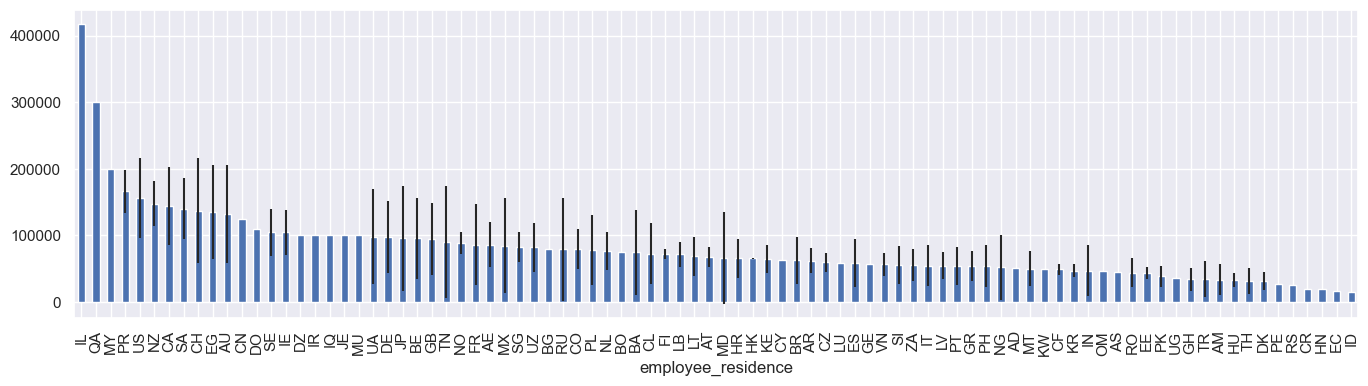

mean           std  count
remote_ratio                                    
On_Site       152039.309643  64841.652492   9779
Remote        144365.749947  59966.815248   4723
Hybrid         83056.983871  61893.327527    248

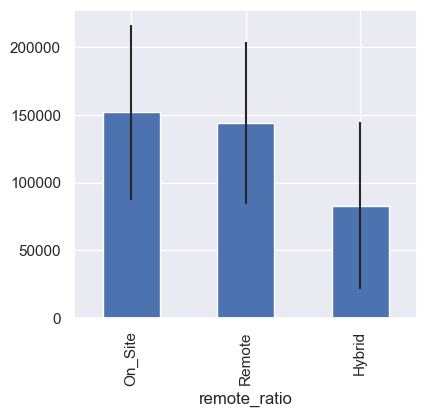

mean            std  count
company_location                                     
US                155917.139479   60822.192834  12898
GB                 94276.178187   54357.233299    651
CA                143609.547804   59092.327932    387
ES                 56817.149606   34411.411212    127
DE                 92426.824742   54676.325682     97
FR                 86310.508197   54807.149935     61
IN                 41995.423729   33807.618394     59
AU                130126.471698   73633.728412     53
PT                 50253.892857   22858.564127     28
NL                 76171.821429   30171.183921     28
BR                 56175.000000   27394.121950     21
CO                 79115.250000   30019.544539     16
LT                 68553.062500   29287.497475     16
ZA                 55786.533333   23999.345401     15
PL                 83083.357143   56366.124953     14
MX                 83186.357143   68979.186671     14
GR                 52260.857143   21279.818413     14
IT                 49600.428571   18169.006051     14
LV                 54734.928571   19875.978577     14
EG                140869.230769   70642.071796     13
EE                 45588.416667   10105.643270     12
IE                104694.916667   33896.783252     12
AT                 68479.300000   15045.888756     10
UA                105600.000000   70596.191273     10
CH                124646.888889   83045.065811      9
NG                 60444.444444   54127.421680      9
JP                110821.625000   77624.356154      8
RU                 78207.857143   74889.345696      7
AR                 69571.428571   17299.876135      7
PH                 49046.666667   29893.040439      6
SI                 56186.333333   28245.696958      6
TR                 23094.666667    4085.214495      6
NZ                147681.666667   33334.636225      6
AE                 86000.000000   33800.887562      5
SG                 62783.000000   27029.838836      5
DK                 49402.600000   28025.534202      5
VN                 63000.000000   18000.000000      4
HU                 39938.000000   18882.157310      4
RO                 44713.000000   15318.661865      4
PR                167500.000000   37527.767497      4
FI                 70833.750000    6722.590938      4
BE                 76864.750000   16763.859488      4
AS                 31684.333333   16480.592718      3
SE                 98791.333333   27214.750143      3
LU                 47609.333333   23115.488516      3
SA                139999.333333   45824.884084      3
TH                 22971.333333    7290.469967      3
GH                 27000.000000   10816.653826      3
MT                 50423.000000   25803.230166      3
HR                 76726.000000   32655.852217      3
CZ                 69478.666667   38752.120075      3
IL                217332.000000  173740.880017      3
NO                 88462.000000   16905.508925      2
ID                 34208.000000   27164.214106      2
KE                 65000.000000   21213.203436      2
PK                 30000.000000   14142.135624      2
CF                 49216.000000    8700.241836      2
LB                 71750.000000   18738.329701      2
KR                 47000.000000    9899.494937      2
BA                 75000.000000   63639.610307      2
HN                 20000.000000            NaN      1
MD                 18000.000000            NaN      1
MY                 40000.000000            NaN      1
CL                 40038.000000            NaN      1
QA                300000.000000            NaN      1
BS                 45555.000000            NaN      1
OM                 46848.000000            NaN      1
AM                 50000.000000            NaN      1
AD                 50745.000000            NaN      1
HK                 65058.000000            NaN      1
GI                 79976.000000            NaN      1
IQ                100000.000000            NaN      1
CN                100000.000000

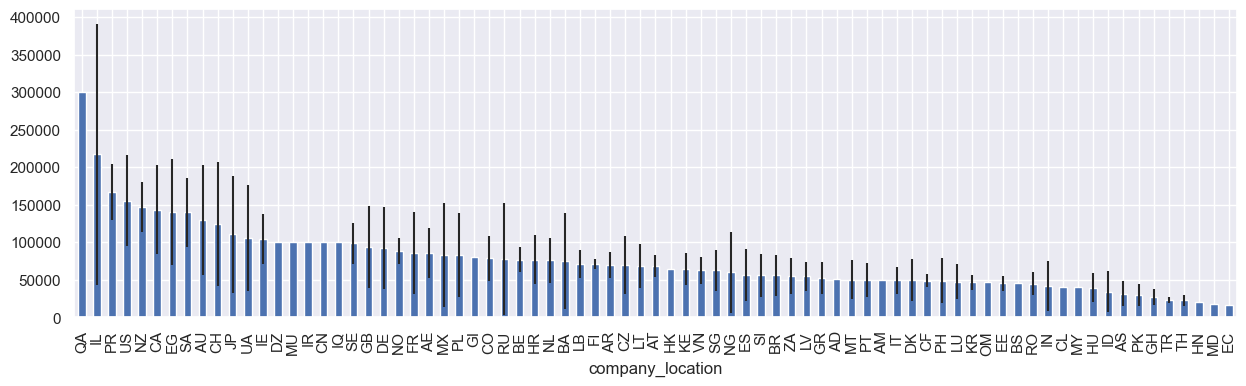

mean           std  count
company_size                                    
M             149877.838228  62748.185103  13587
L             139602.460834  74183.850792    983
S              86725.394444  58646.102848    180

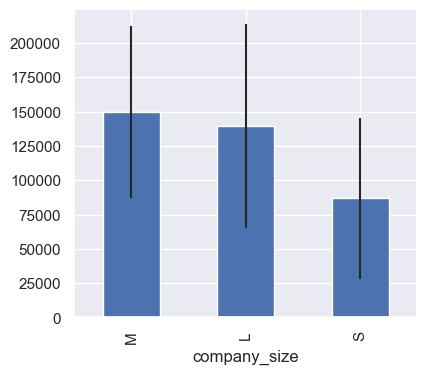

In [32]:
# Quick chart view of the salary range for all categorical columns.
for col in ['work_year'] + categorical_columns:
    group = aijobs.groupby(col)['salary_in_usd'].agg(['mean', 'std', 'count']).sort_values('mean', ascending=False)
    display(group.sort_values('count', ascending=False))
    group['mean'].sort_values(ascending=False).plot(kind='bar', yerr=group['std'], figsize=(len(group)/7+4, 4))
    plt.show()

#### Dummy detail comparison charts

In [33]:
# definition for plotting all post treatment dummies' counts, averages and deviation of target variable

def plotting(var):
    usd = new_X.groupby(var)['salary_in_usd']
    box = new_X.groupby(var)['transformed_salary']

    fig, ax = plt.subplots(layout='constrained', figsize=(12, 4))
    ax.remove()

    ax1 = plt.subplot(1, 2, 1)
    rects = ax1.bar(1, usd.mean()[1].astype(int), 0.8, yerr=usd.std()[1].astype(int), color='mediumturquoise')
    ax1.bar_label(rects, label_type='center')
    rects = ax1.bar(2, usd.mean()[0].astype(int), 0.8, yerr=usd.std()[0].astype(int), color='salmon')
    ax1.bar_label(rects, label_type='center')
    ax1.set_xticks([1, 2], [var, 'not ' + var])
    ax1.set_title('Salary in USD')

    ax2 = plt.subplot(1, 2, 2)
    rects = ax2.bar(1, box.mean()[1].astype(int), 0.8, yerr=box.std()[1].astype(int), color='mediumaquamarine')
    ax2.bar_label(rects, label_type='center')
    rects = ax2.bar(2, box.mean()[0].astype(int), 0.8, yerr=box.std()[0].astype(int), color='lightcoral')
    ax2.bar_label(rects, label_type='center')
    ax2.set_xticks([1, 2], [var, 'not ' + var])
    ax2.set_title('Transformed Salary')

    plt.show()

In [34]:
avg = new_X[['transformed_salary']].mean()[0]
avg

562.4922037766177

salary_in_usd              transformed_salary     
                   mean    std count               mean  std
work_year                                                   
2020             103014  73825    61                458  145
2021             107461  68681   179                469  142
2022             135465  56334  1611                536  112
2023             153996  62946  8433                571  114
2024             147984  64773  4270                559  117

salary_in_usd               transformed_salary     
                     mean    std  count               mean  std
work_abroad                                                    
0                  149692  63290  14491                563  116
1                   81138  57509     63                409  130

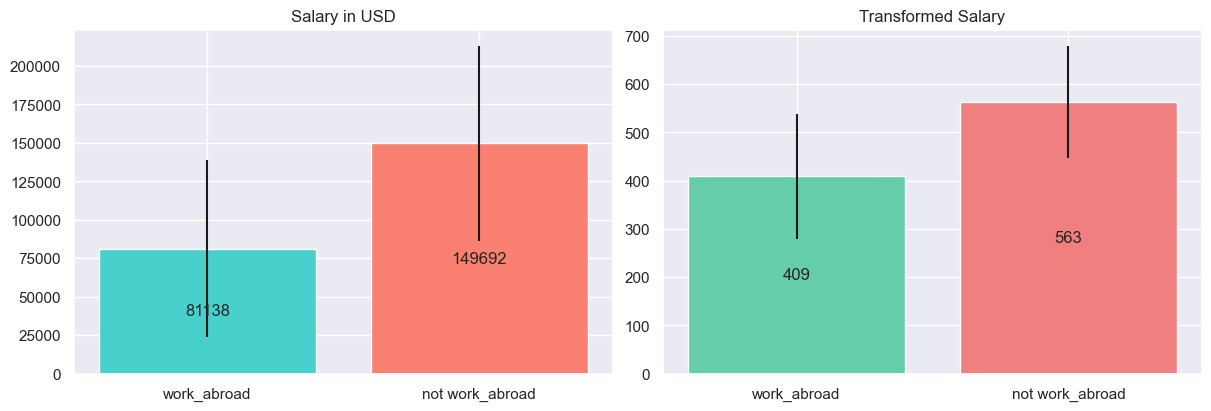

salary_in_usd               transformed_salary     
                     mean    std  count               mean  std
job_name_AI                                                    
0                  149182  63155  14386                562  116
1                  167640  81505    168                588  147

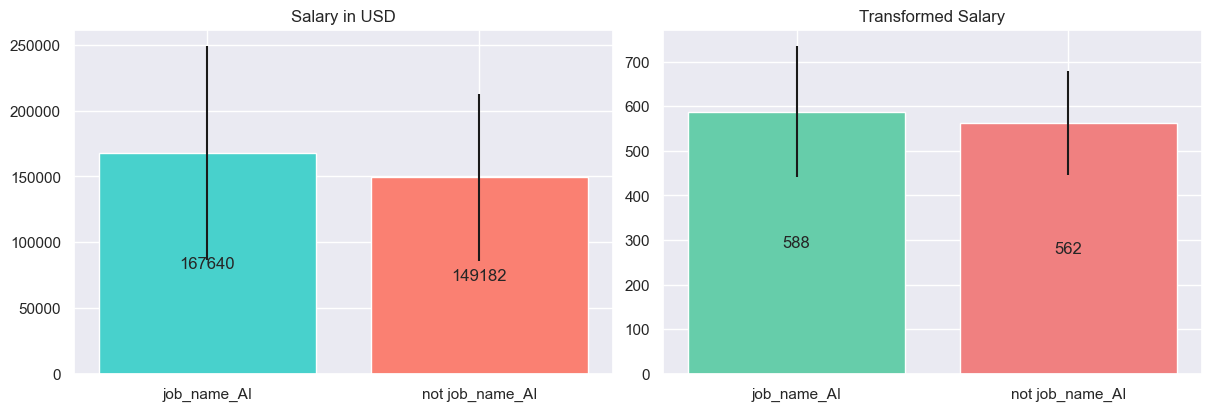

salary_in_usd               transformed_salary     
                          mean    std  count               mean  std
job_name_Analyst                                                    
0                       158661  63362  11952                580  113
1                       106833  43053   2602                481   93

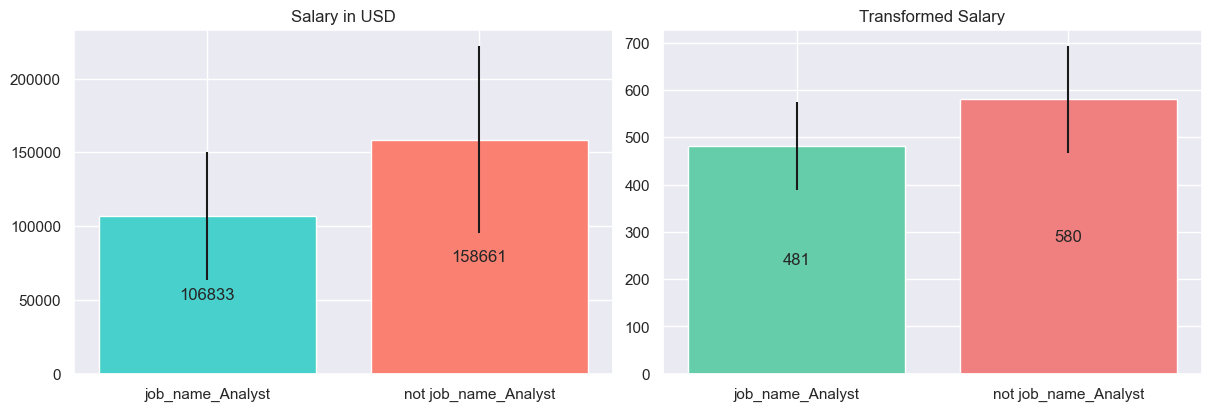

salary_in_usd               transformed_salary     
                            mean    std  count               mean  std
job_name_Analytics                                                    
0                         149325  63656  14070                562  117
1                         151440  56291    484                570   98

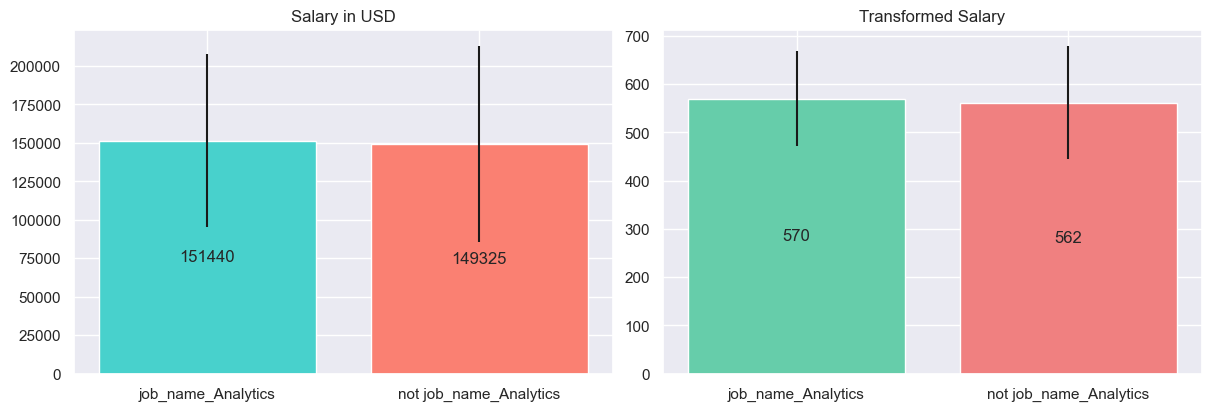

salary_in_usd               transformed_salary     
                          mean    std  count               mean  std
job_name_Applied                                                    
0                       148336  63235  14148                560  116
1                       186315  58852    406                630  102

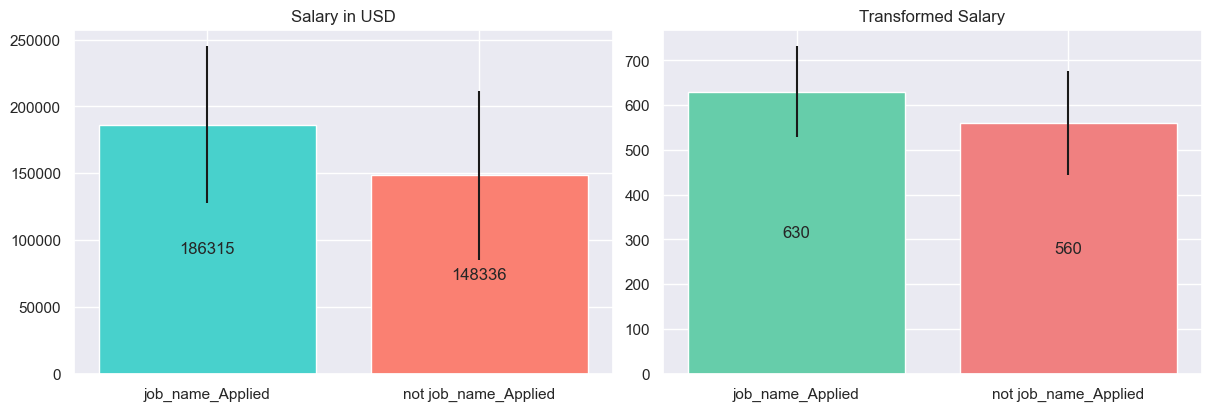

salary_in_usd               transformed_salary     
                            mean    std  count               mean  std
job_name_Architect                                                    
0                         148887  63398  14155                561  116
1                         167443  61771    399                597  103

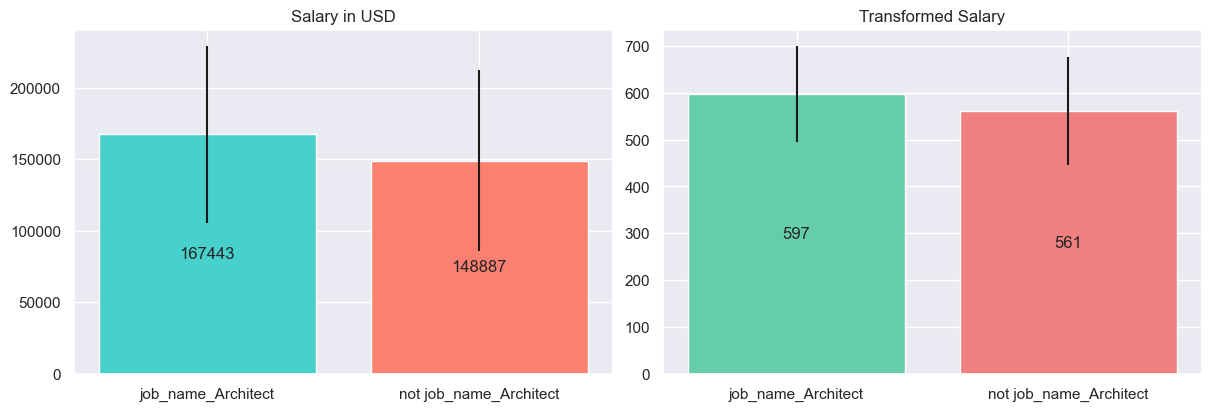

salary_in_usd               transformed_salary     
                            mean    std  count               mean  std
job_name_Associate                                                    
0                         149423  63416  14549                562  116
1                          67319  15618      5                393   42

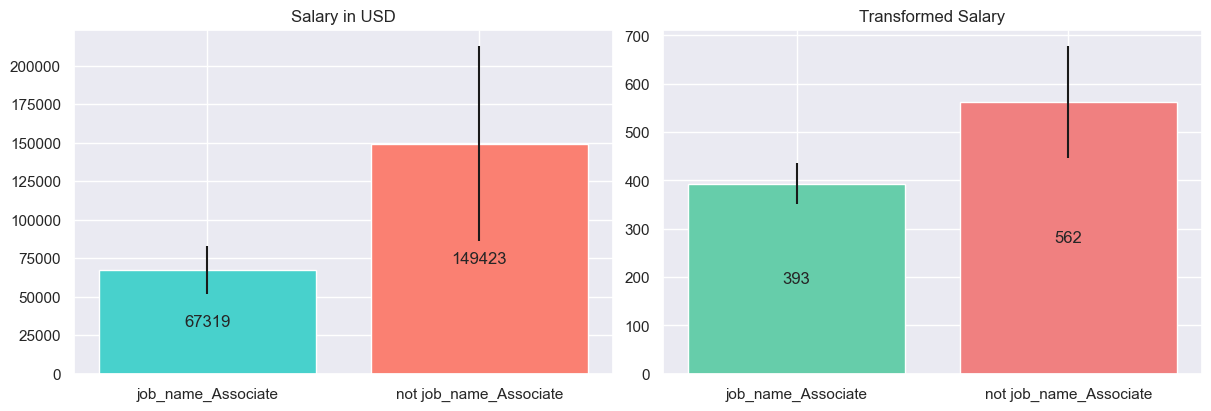

salary_in_usd               transformed_salary     
                      mean    std  count               mean  std
job_name_Big                                                    
0                   149453  63402  14542                562  116
1                    79793  53002     12                401  147

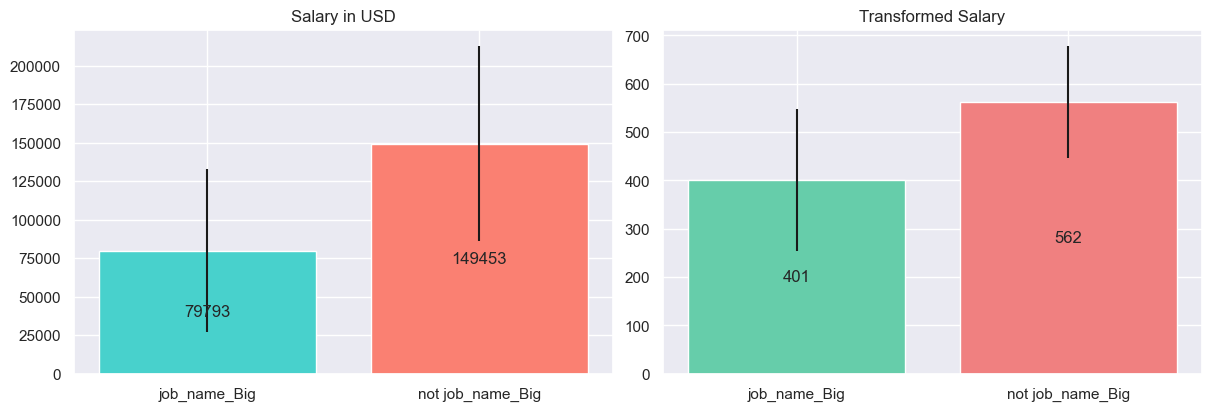

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
job_name_Consultant                                                    
0                          149653  63483  14467                562  116
1                          106602  30892     87                485   71

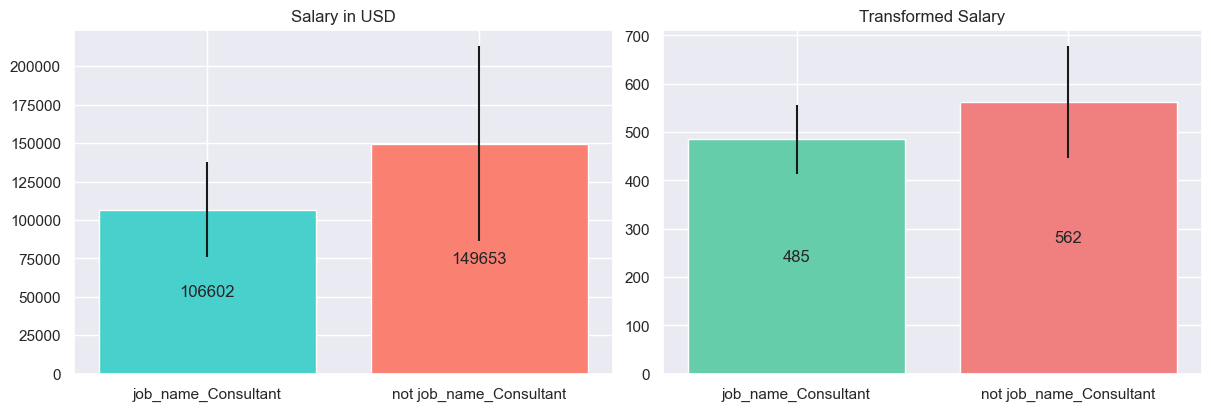

salary_in_usd               transformed_salary     
                           mean    std  count               mean  std
job_name_Database                                                    
0                        149401  63443  14541                562  116
1                        143538  37756     13                560   72

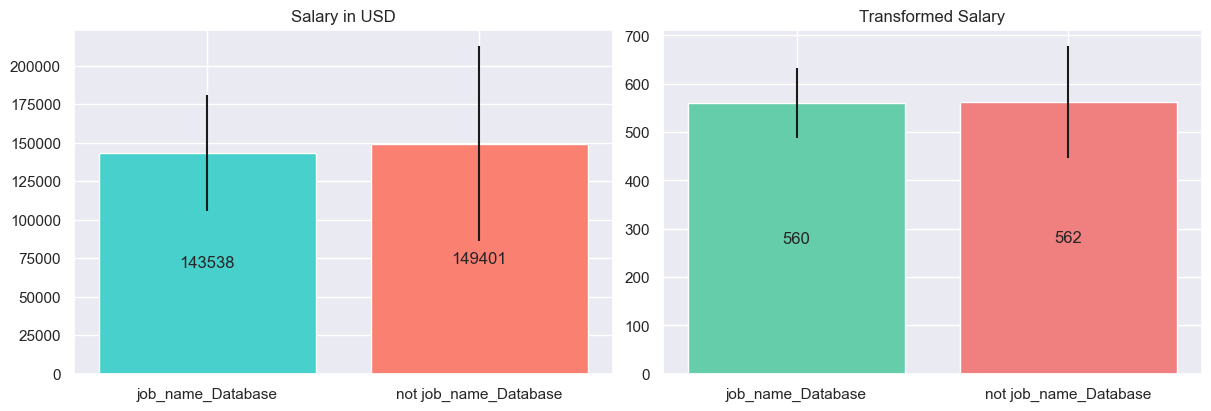

salary_in_usd               transformed_salary     
                           mean    std  count               mean  std
job_name_Decision                                                    
0                        149352  63481  14516                562  116
1                        166094  31969     38                602   55

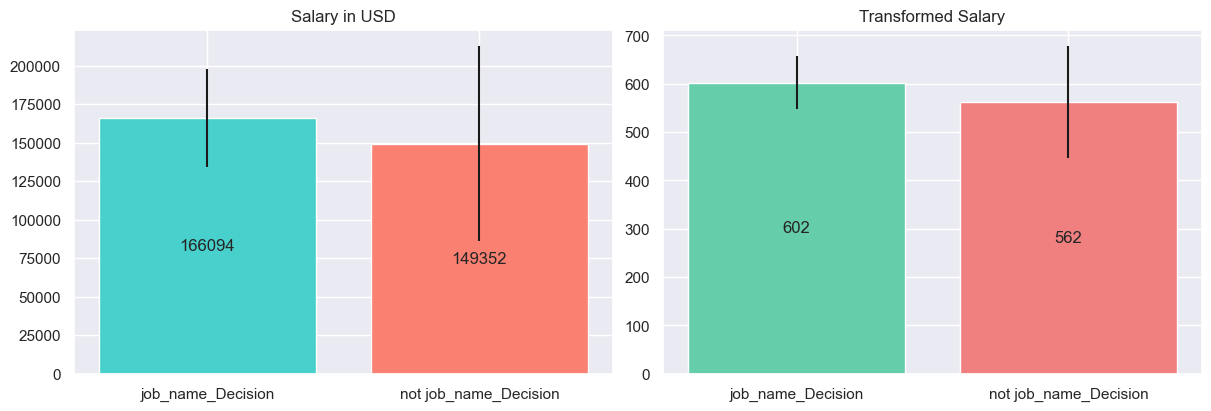

salary_in_usd                transformed_salary     
                       mean     std  count               mean  std
job_name_Deep                                                     
0                    149363   63373  14541                562  116
1                    185681  103900     13                613  171

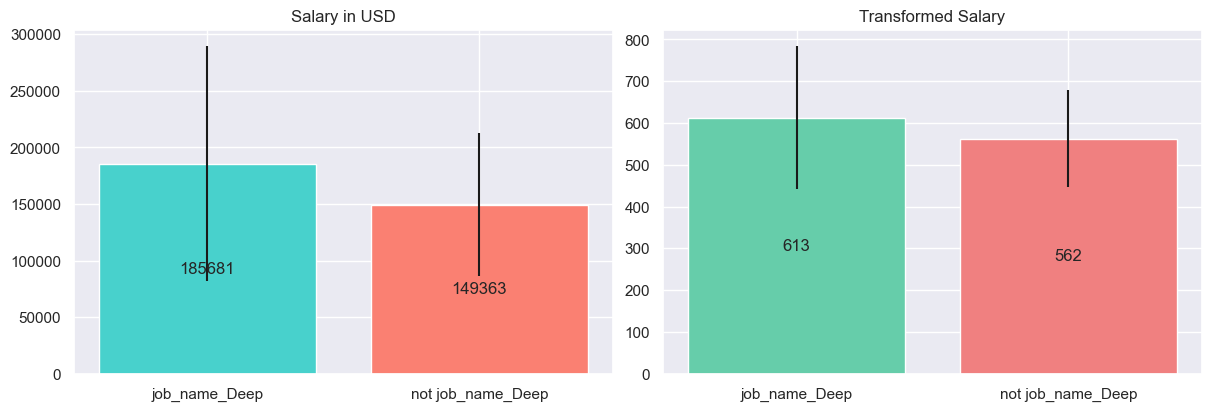

salary_in_usd               transformed_salary     
                            mean    std  count               mean  std
job_name_Developer                                                    
0                         149988  63469  14339                563  116
1                         109832  45410    215                487   94

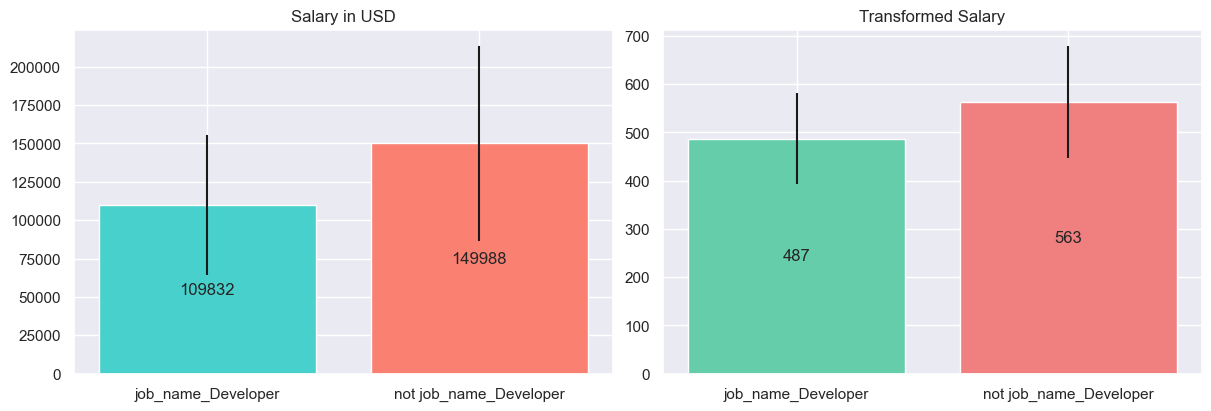

salary_in_usd               transformed_salary     
                           mean    std  count               mean  std
job_name_Director                                                    
0                        149205  63307  14512                562  116
1                        215021  70399     42                674  109

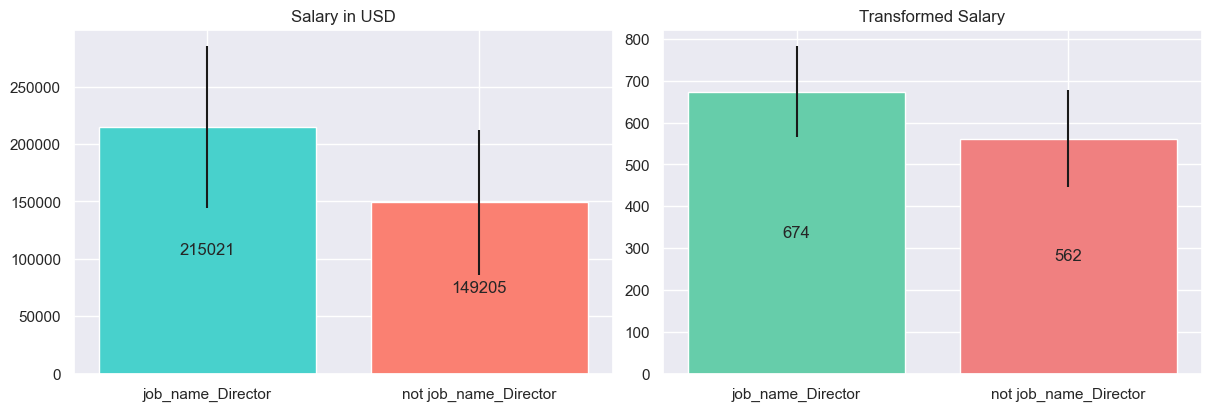

salary_in_usd               transformed_salary     
                      mean    std  count               mean  std
job_name_ETL                                                    
0                   149458  63421  14523                562  116
1                   119922  58809     31                504  116

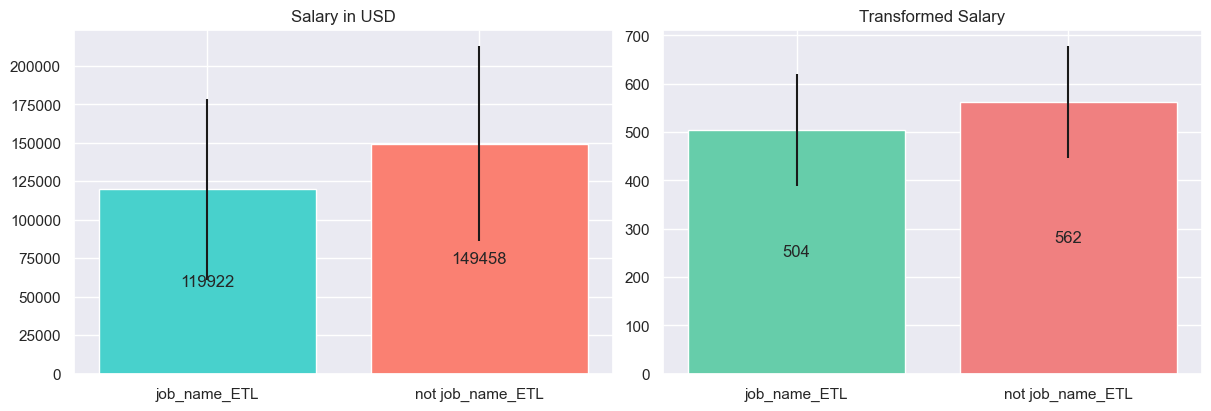

salary_in_usd               transformed_salary     
                       mean    std  count               mean  std
job_name_Head                                                    
0                    149139  63236  14491                562  116
1                    208390  78137     63                660  129

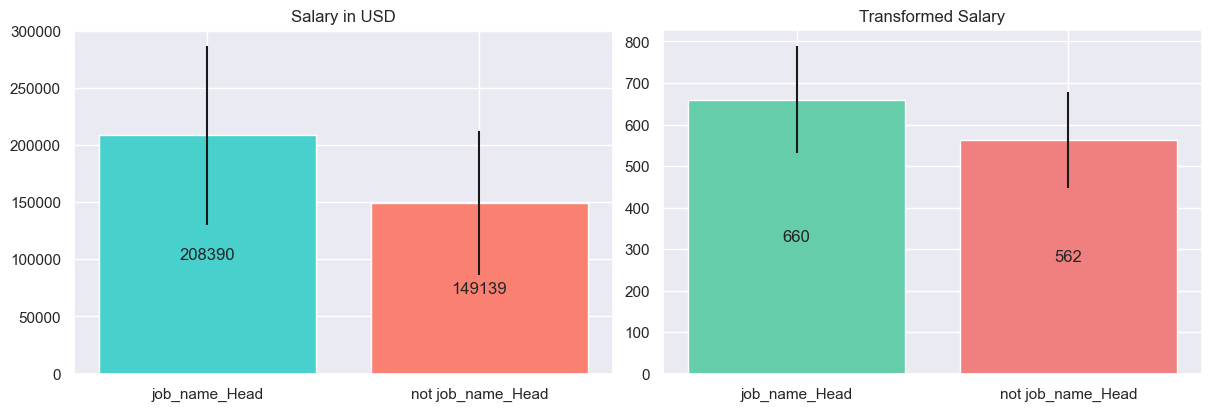

salary_in_usd               transformed_salary     
                                 mean    std  count               mean  std
job_name_Infrastructure                                                    
0                              149290  63386  14505                562  116
1                              180436  67587     49                618  110

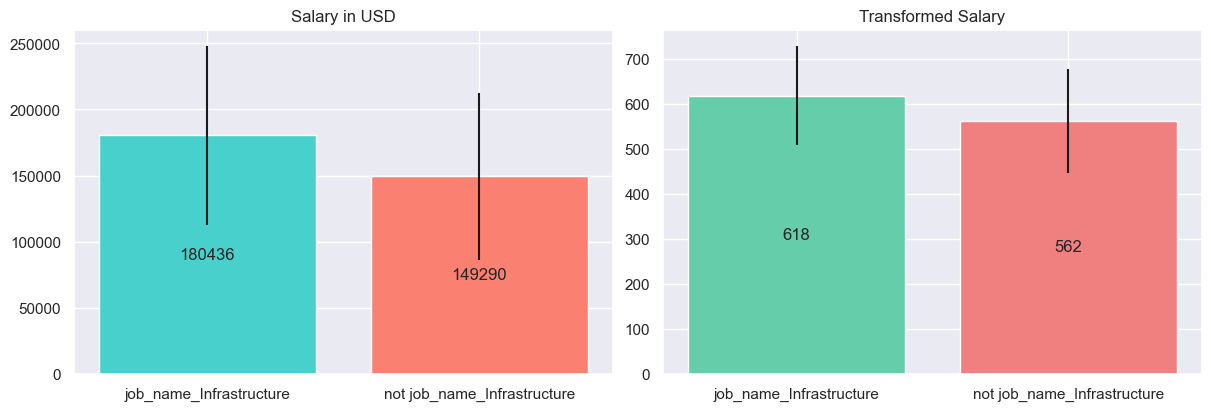

salary_in_usd               transformed_salary     
                          mean    std  count               mean  std
job_name_Insight                                                    
0                       149480  63381  14542                562  116
1                        46459   7158     12                330   25

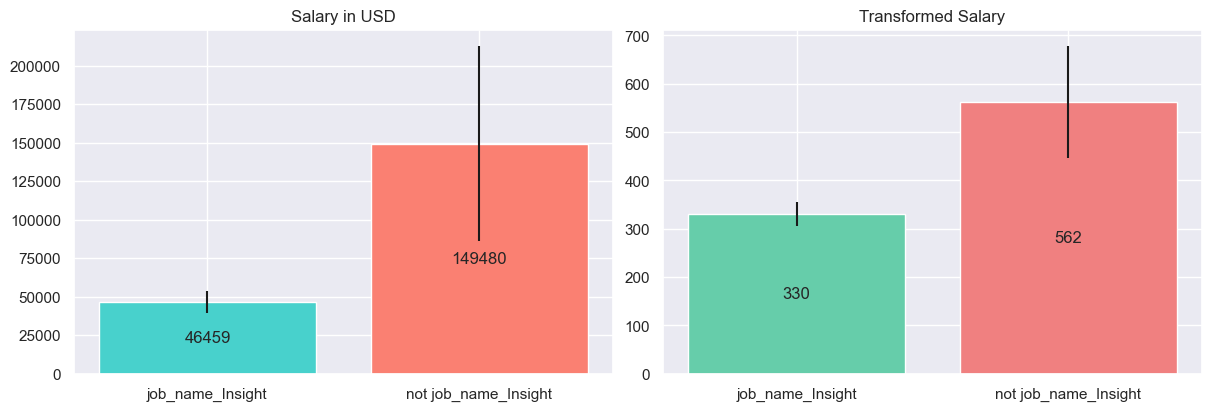

salary_in_usd               transformed_salary     
                              mean    std  count               mean  std
job_name_Integration                                                    
0                           149519  63434  14509                562  116
1                           109595  45416     45                487   95

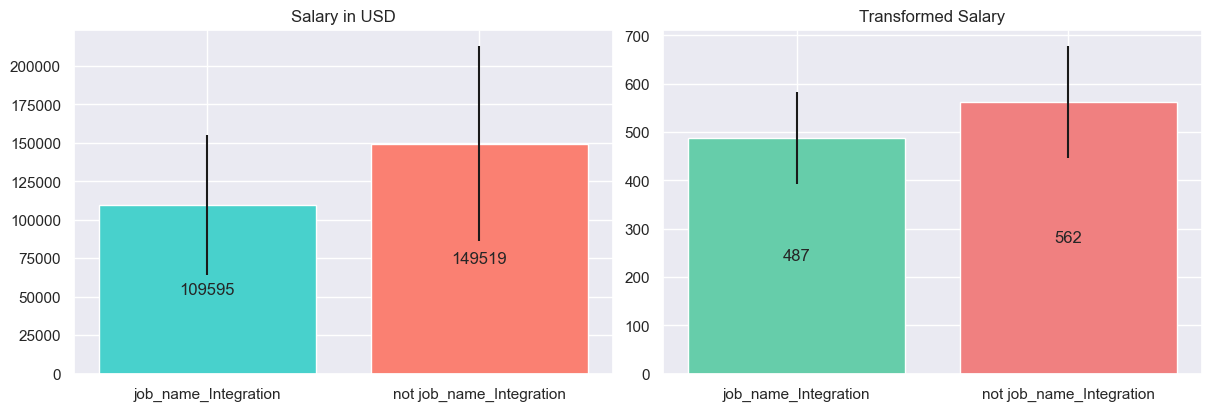

salary_in_usd               transformed_salary     
                       mean    std  count               mean  std
job_name_Lead                                                    
0                    149366  63287  14458                562  116
1                    153819  81818     96                562  150

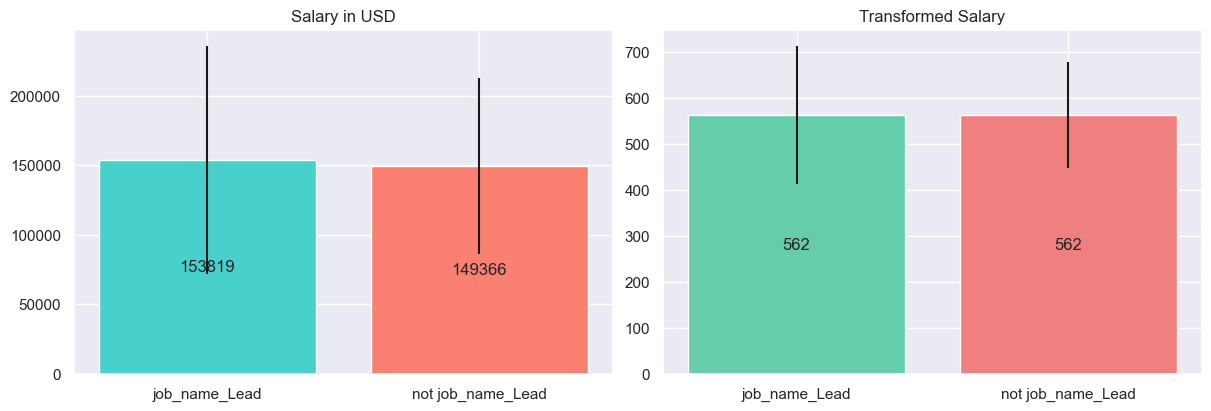

salary_in_usd               transformed_salary     
                      mean    std  count               mean  std
job_name_NLP                                                    
0                   149415  63408  14539                562  116
1                   130002  77349     15                515  155

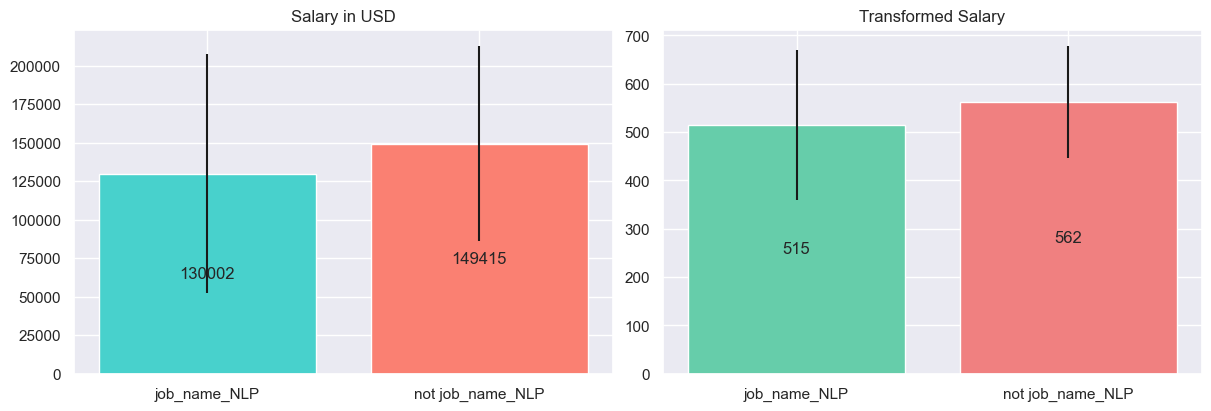

salary_in_usd               transformed_salary     
                      mean    std  count               mean  std
job_name_Ops                                                    
0                   149394  63441  14532                562  116
1                   150122  52601     22                568   94

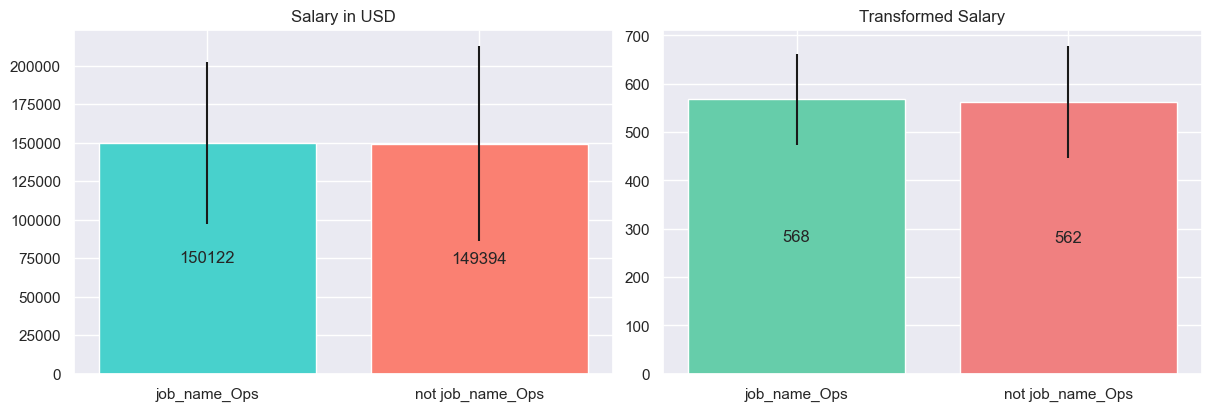

salary_in_usd               transformed_salary     
                        mean    std  count               mean  std
job_name_Owner                                                    
0                     149404  63410  14548                562  116
1                     127830  97991      6                510  165

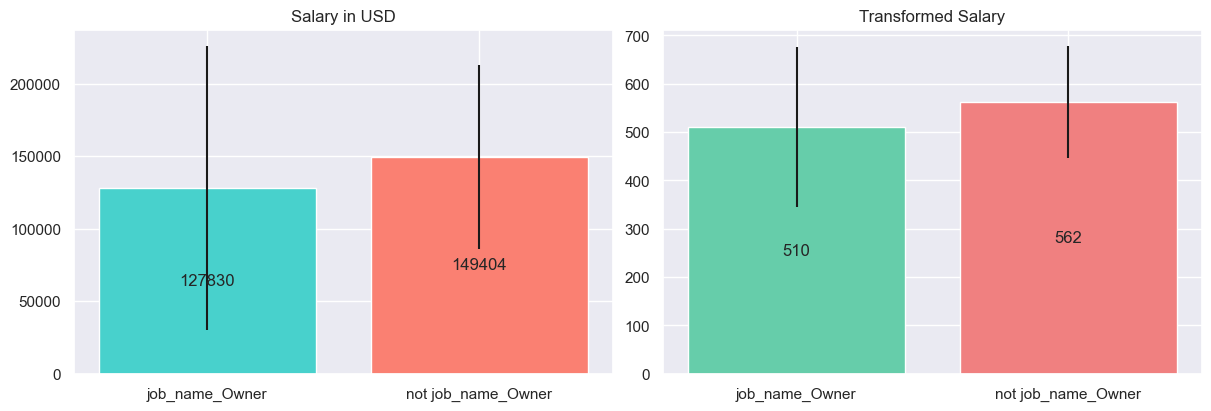

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
job_name_Practitioner                                                    
0                            149413  63440  14538                562  116
1                            133650  45759     16                538   89

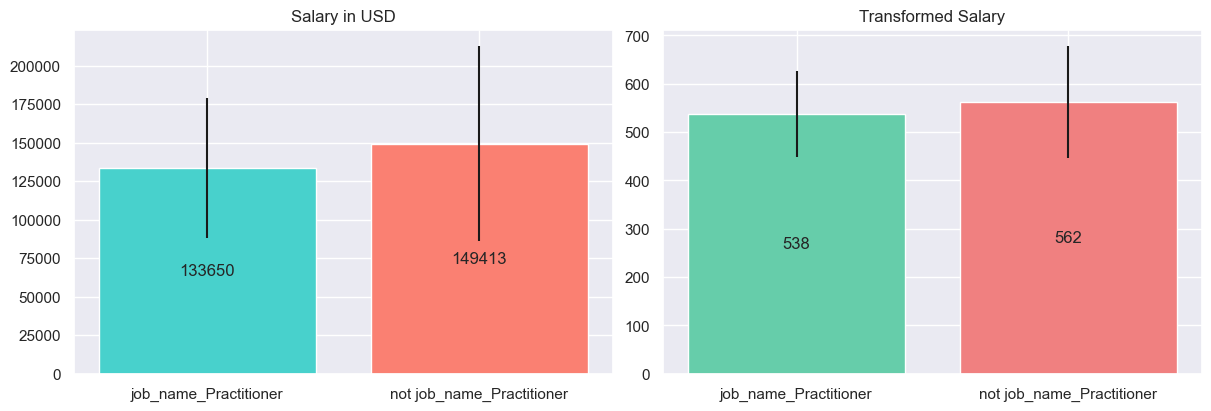

salary_in_usd               transformed_salary     
                            mean    std  count               mean  std
job_name_Principal                                                    
0                         149370  63400  14536                562  116
1                         169490  80500     18                595  135

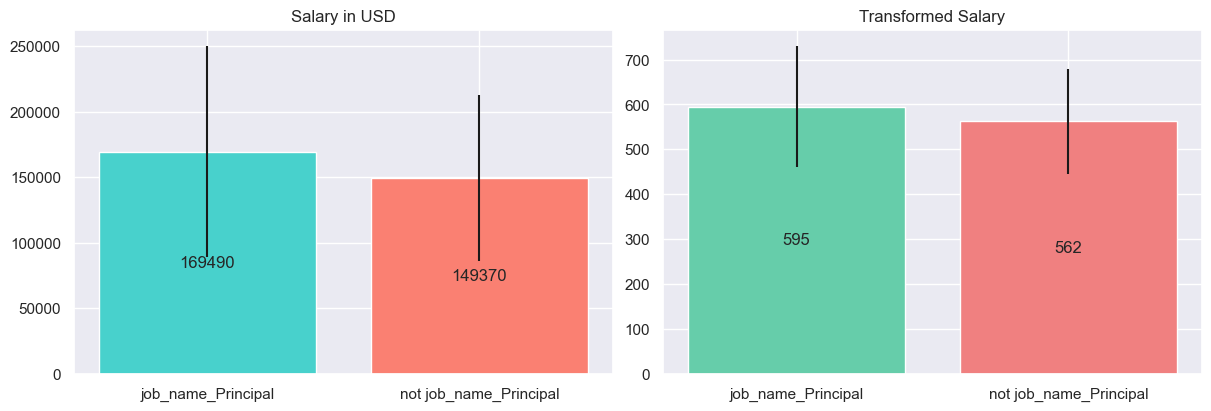

salary_in_usd               transformed_salary     
                          mean    std  count               mean  std
job_name_Product                                                    
0                       149403  63445  14511                562  116
1                       146925  56465     43                559  109

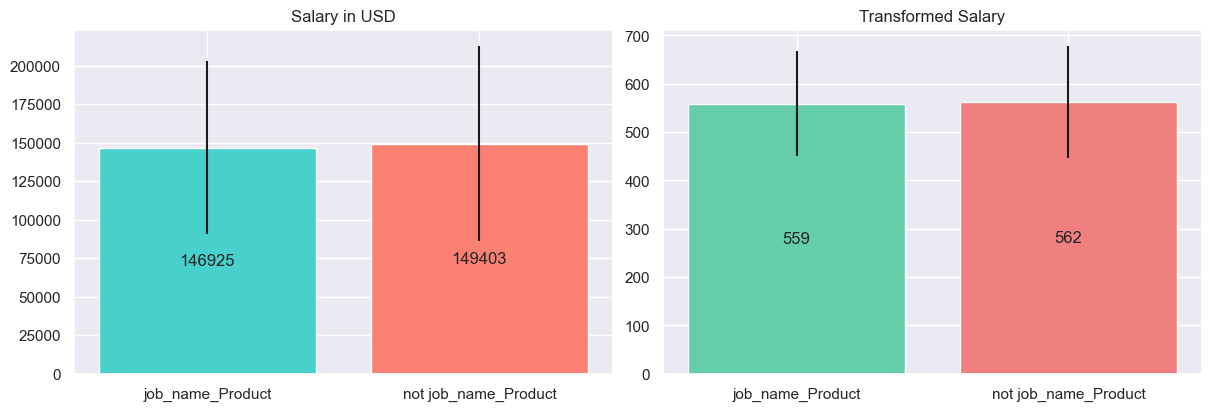

salary_in_usd               transformed_salary     
                         mean    std  count               mean  std
job_name_Prompt                                                    
0                      149368  63424  14540                562  116
1                      177937  58683     14                616  105

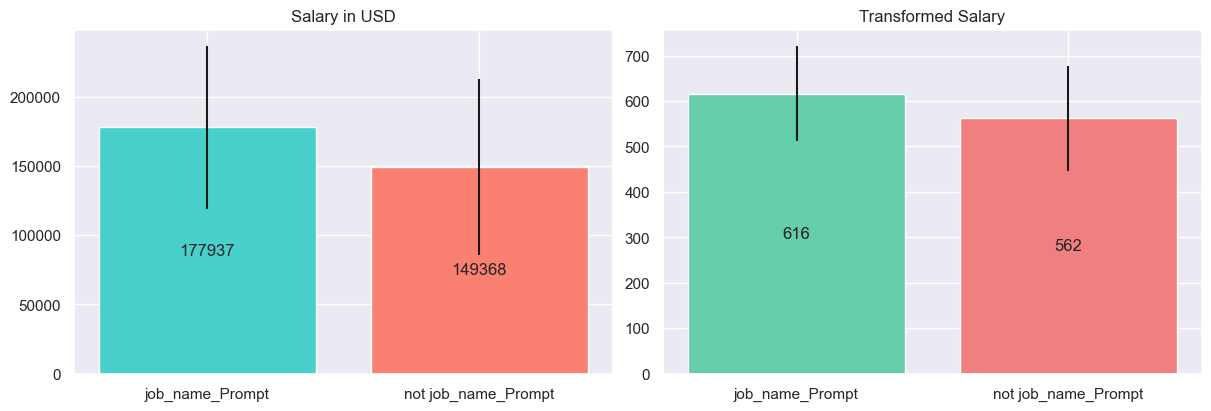

salary_in_usd               transformed_salary     
                          mean    std  count               mean  std
job_name_Quality                                                    
0                       149523  63400  14525                562  116
1                        85532  39020     29                431   94

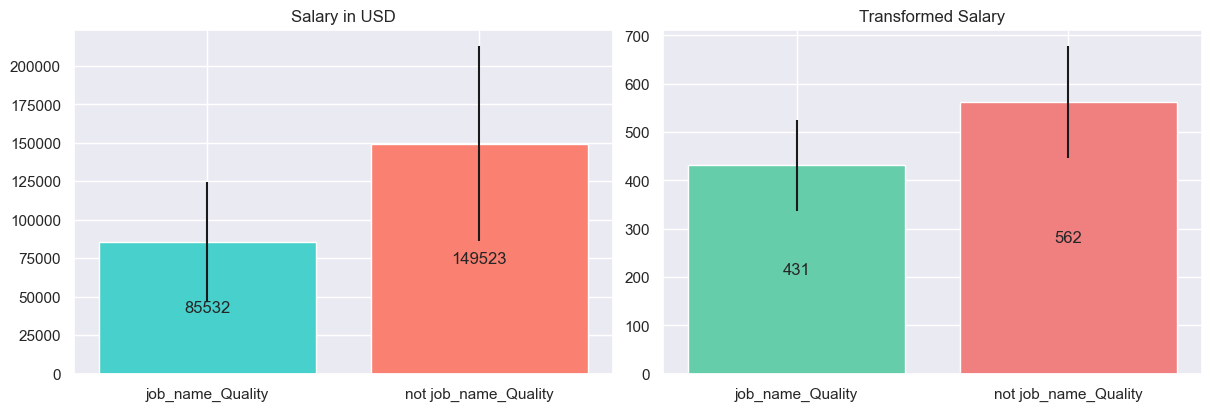

salary_in_usd               transformed_salary     
                           mean    std  count               mean  std
job_name_Robotics                                                    
0                        149380  63428  14540                562  116
1                        165071  59157     14                593  106

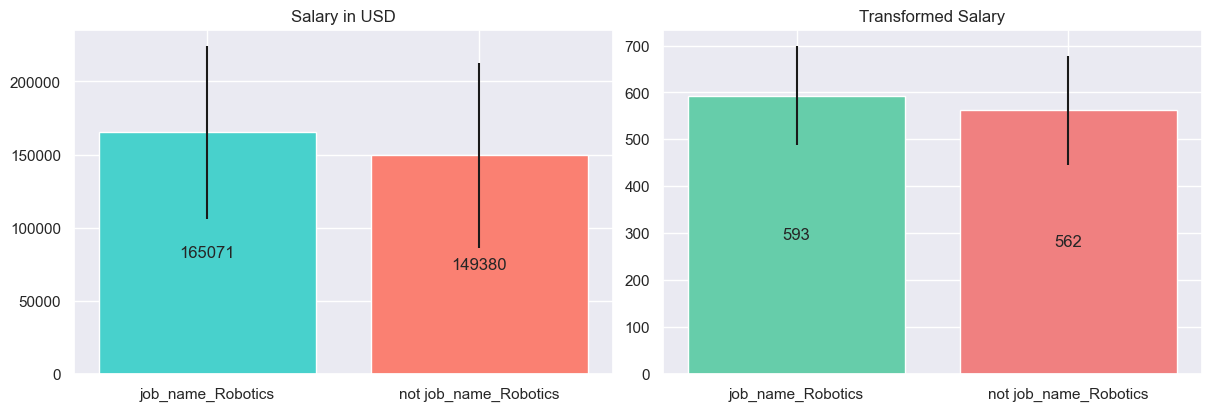

salary_in_usd               transformed_salary     
                           mean    std  count               mean  std
job_name_Software                                                    
0                        149336  63376  14524                562  116
1                        178101  79705     30                607  145

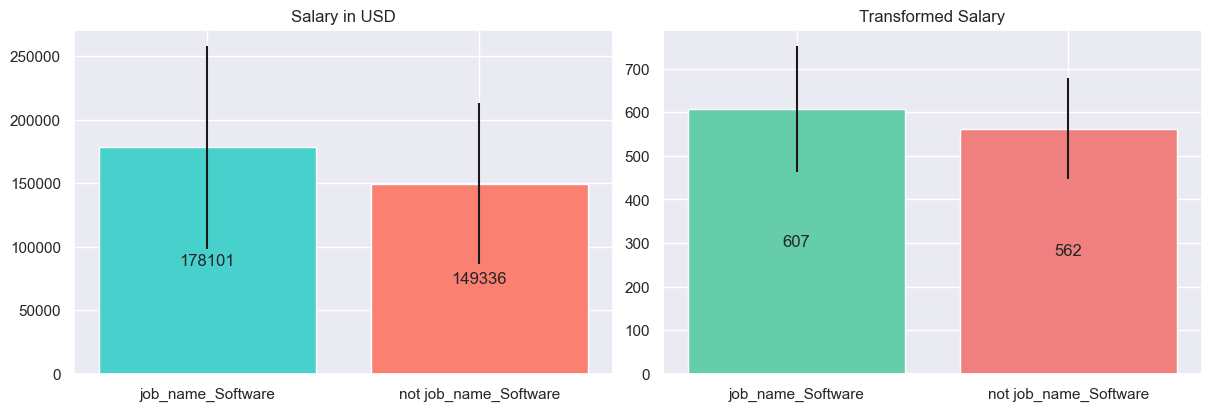

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
job_name_Specialist                                                    
0                          149903  63368  14415                563  116
1                           96693  44472    139                458   93

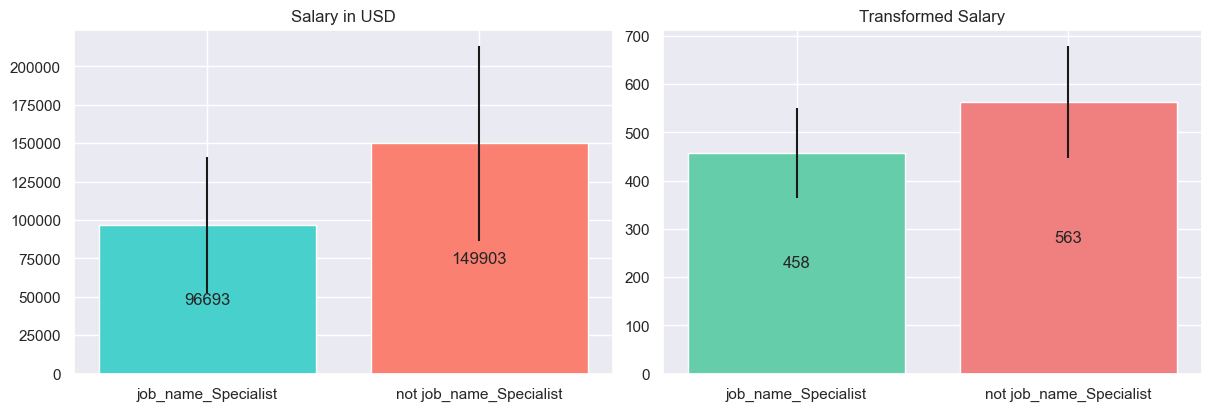

salary_in_usd               transformed_salary     
                        mean    std  count               mean  std
job_name_Staff                                                    
0                     149411  63417  14549                562  116
1                     102750  73459      5                449  187

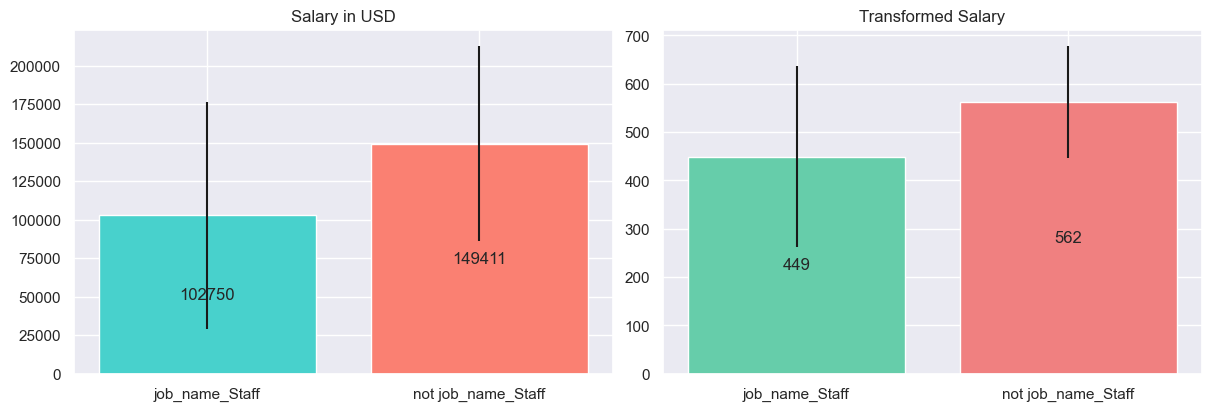

salary_in_usd               transformed_salary     
                         mean    std  count               mean  std
job_name_Vision                                                    
0                      149336  63365  14521                562  116
1                      175390  82702     33                599  158

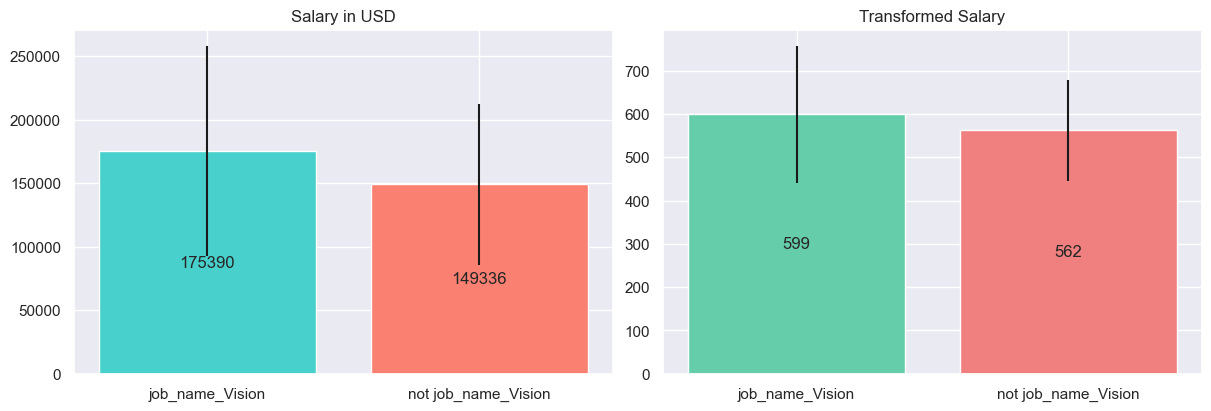

salary_in_usd               transformed_salary     
                                mean    std  count               mean  std
job_name_Visualization                                                    
0                             149433  63438  14536                562  116
1                             119144  42584     18                509   88

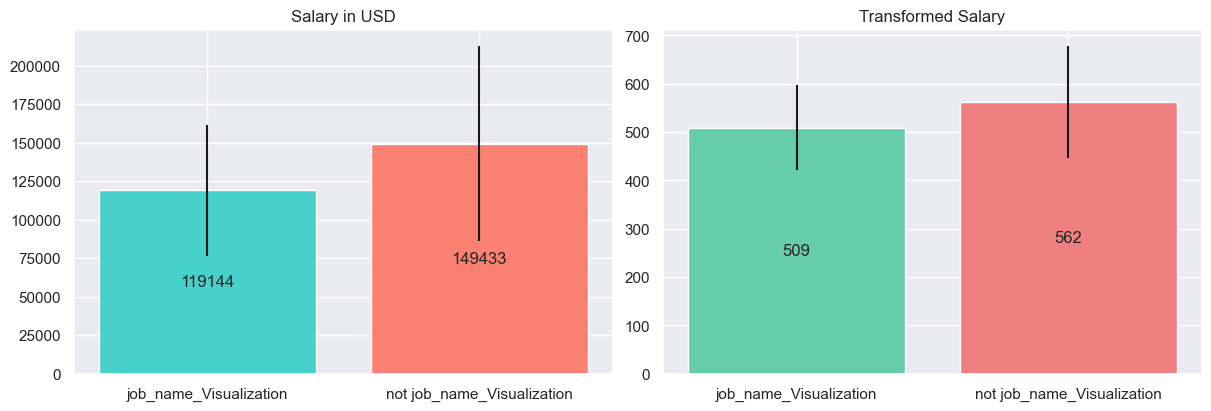

salary_in_usd               transformed_salary     
                          mean    std  count               mean  std
job_name_Machine                                                    
0                       143853  61371  12623                552  114
1                       185627  64699   1931                627  109

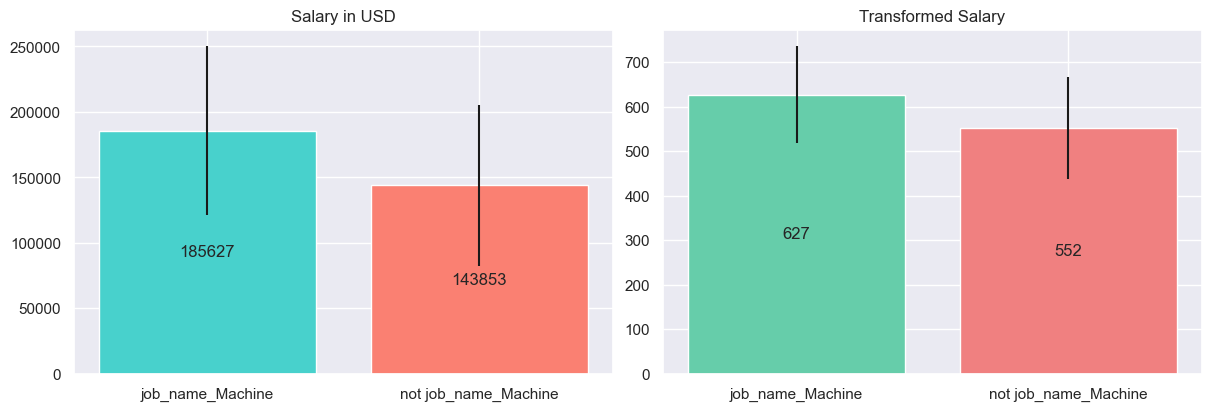

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
job_name_Operations                                                    
0                          149568  63423  14474                562  116
1                          118177  55701     80                502  110

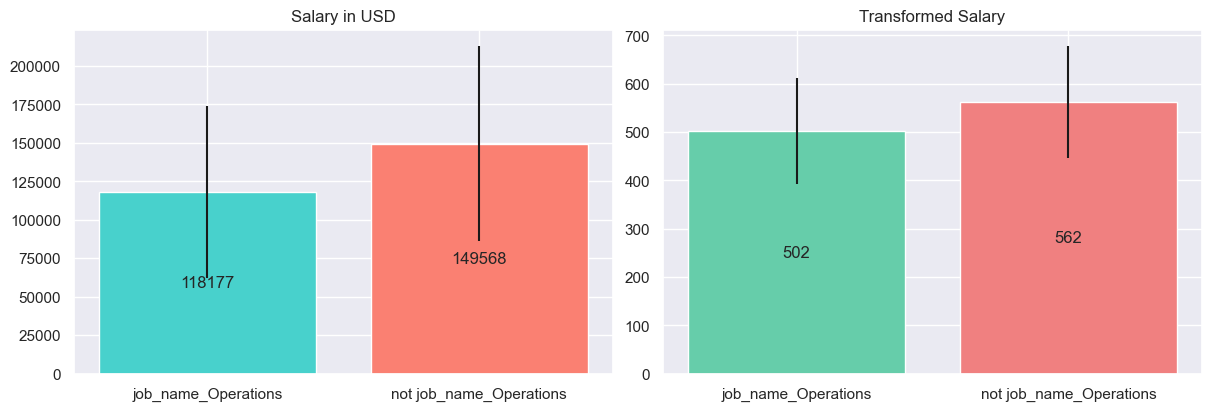

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
job_name_Intelligence                                                    
0                            150592  63710  13906                564  116
1                            123704  50560    648                515  103

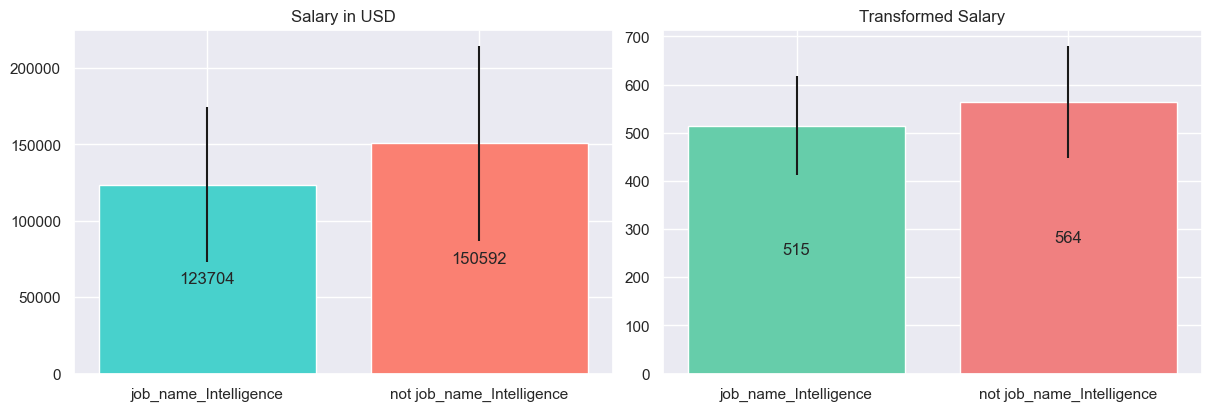

salary_in_usd               transformed_salary     
                           mean    std  count               mean  std
job_name_Business                                                    
0                        150665  63687  13891                564  116
1                        122785  50853    663                513  104

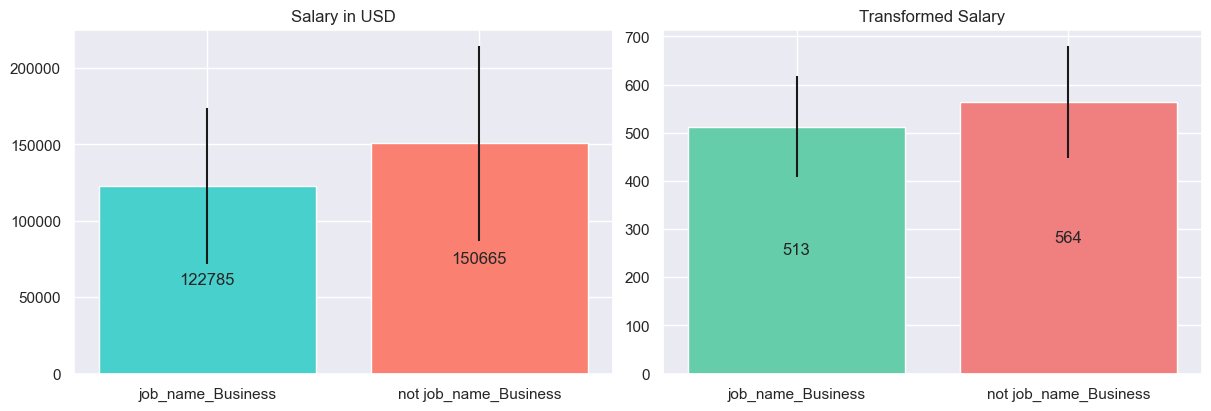

salary_in_usd               transformed_salary     
                        mean    std  count               mean  std
job_name_Cloud                                                    
0                     149390  63441  14535                562  116
1                     153219  49975     19                575   88

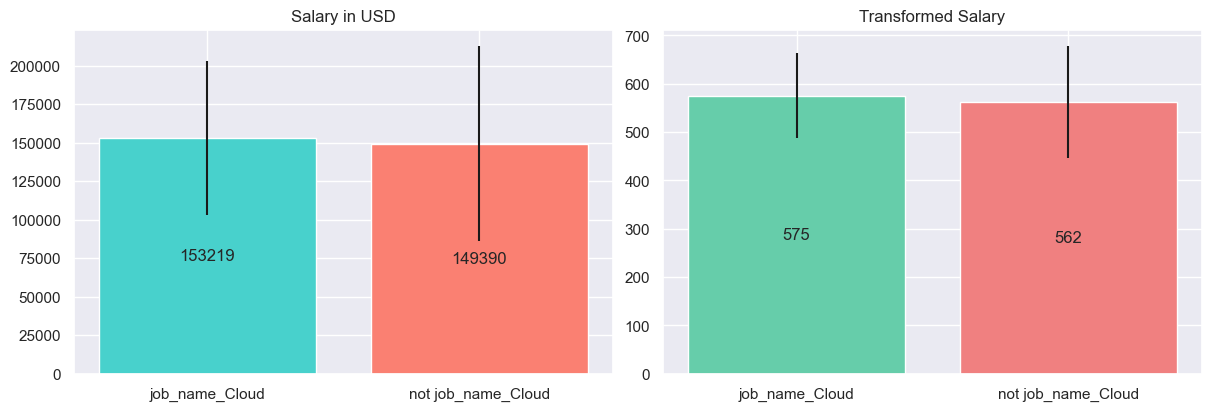

salary_in_usd               transformed_salary     
                          mean    std  count               mean  std
job_name_Modeler                                                    
0                       149465  63477  14504                562  116
1                       129084  41364     50                530   81

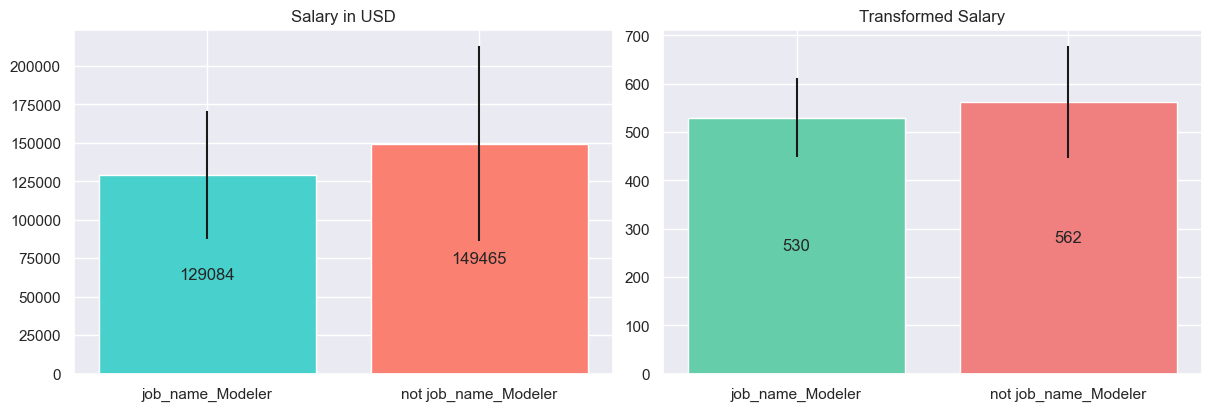

salary_in_usd              transformed_salary     
                           mean    std count               mean  std
job_name_Engineer                                                   
0                        141368  62281  8437                547  117
1                        160467  63325  6117                583  113

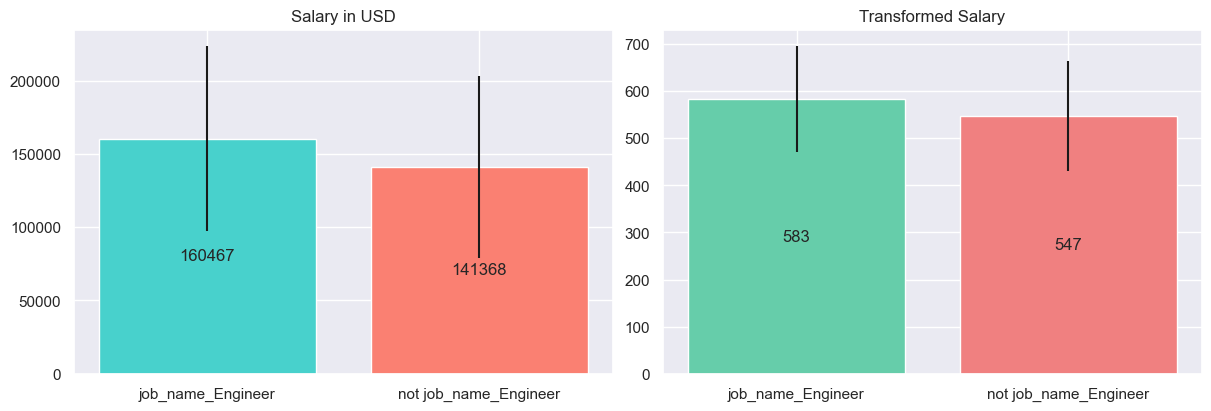

salary_in_usd               transformed_salary     
                          mean    std  count               mean  std
job_name_Finance                                                    
0                       149413  63403  14547                562  116
1                       112471  97906      7                473  174

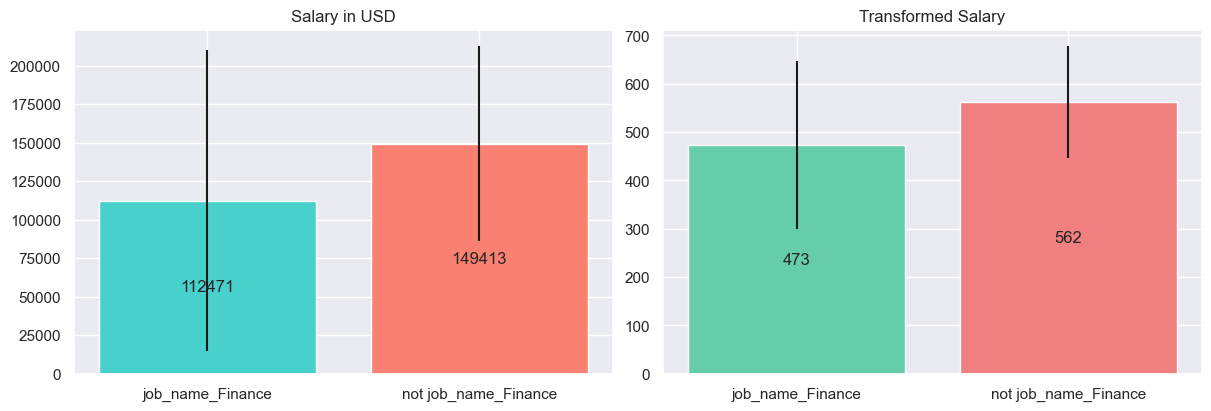

salary_in_usd               transformed_salary     
                           mean    std  count               mean  std
job_name_Research                                                    
0                        147932  62428  13693                560  115
1                        172670  73804    861                601  128

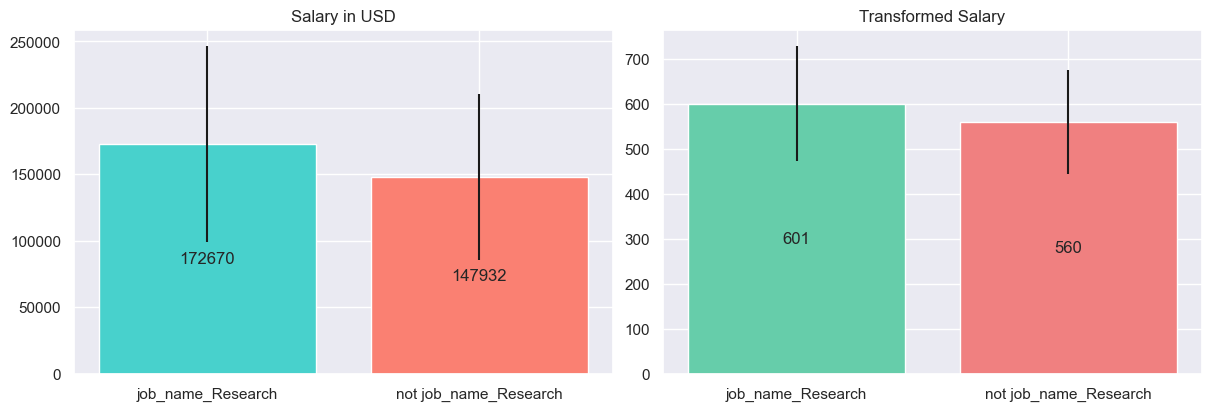

salary_in_usd               transformed_salary     
                            mean    std  count               mean  std
job_name_Scientist                                                    
0                         143539  62950  10009                551  116
1                         162293  62558   4545                586  112

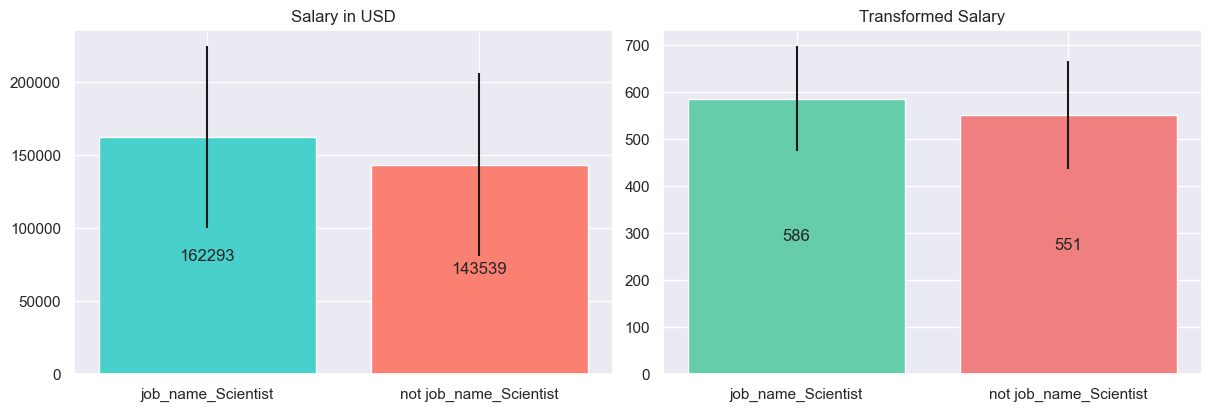

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
job_name_Strategist                                                    
0                          149476  63428  14526                562  116
1                          107593  45466     28                485   85

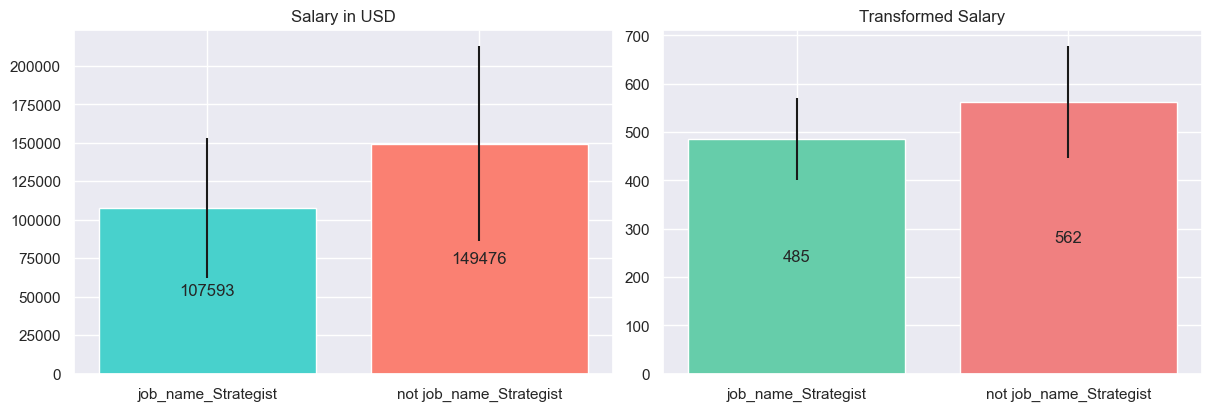

salary_in_usd               transformed_salary     
                          mean    std  count               mean  std
job_name_Manager                                                    
0                       149741  63457  14107                563  116
1                       138486  61454    447                542  112

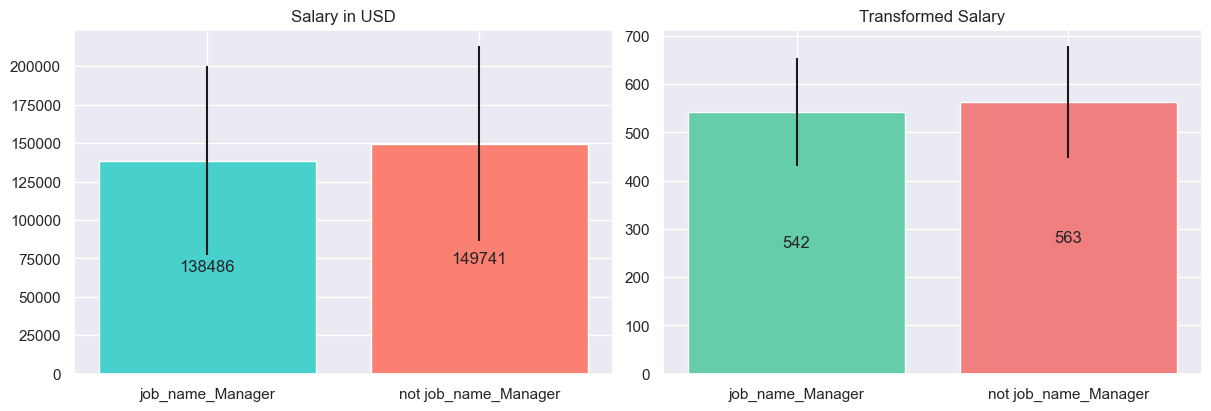

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
experience_level_EN                                                    
0                          153893  62341  13474                571  112
1                           93279  48199   1080                446  108

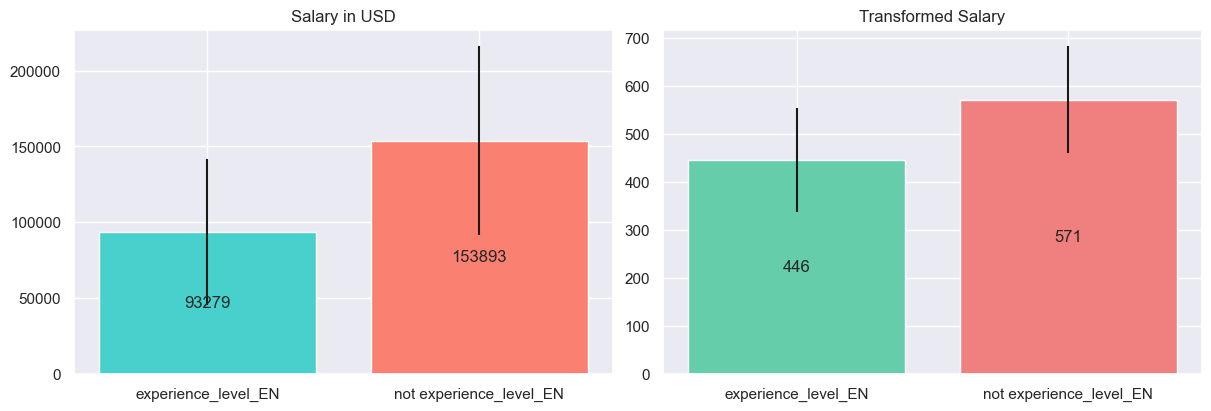

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
experience_level_EX                                                    
0                          148043  62774  14121                560  116
1                          193505  68591    433                639  111

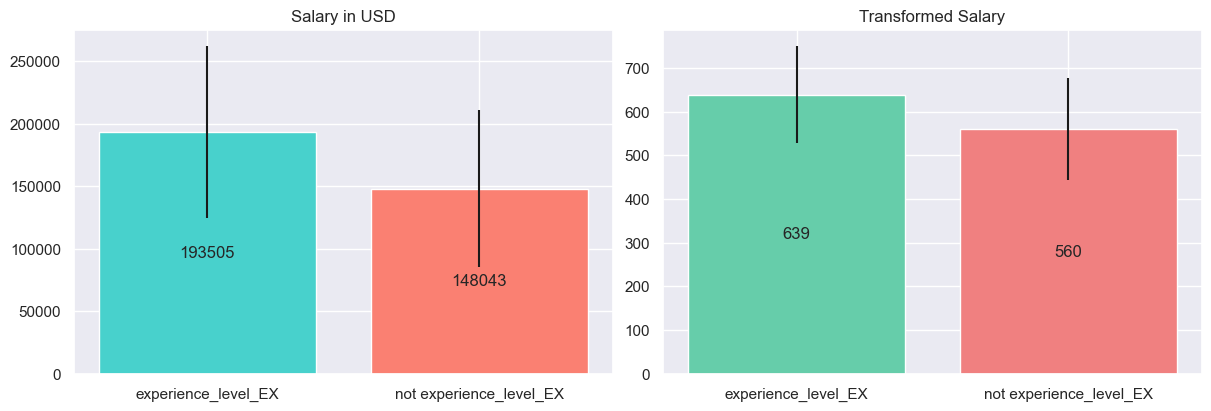

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
experience_level_MI                                                    
0                          157468  63619  11106                577  114
1                          123395  55298   3448                513  109

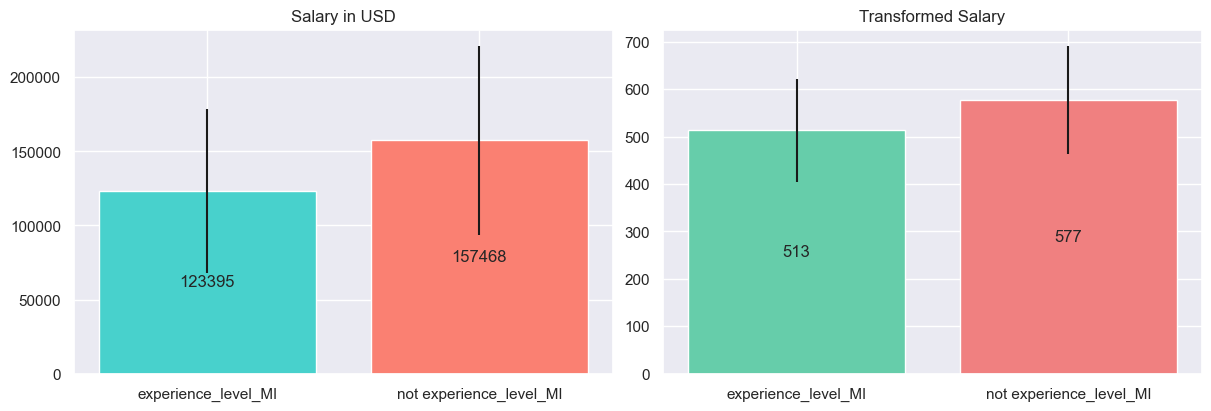

salary_in_usd              transformed_salary     
                             mean    std count               mean  std
experience_level_SE                                                   
0                          122958  60553  4961                509  119
1                          163067  60487  9593                589  105

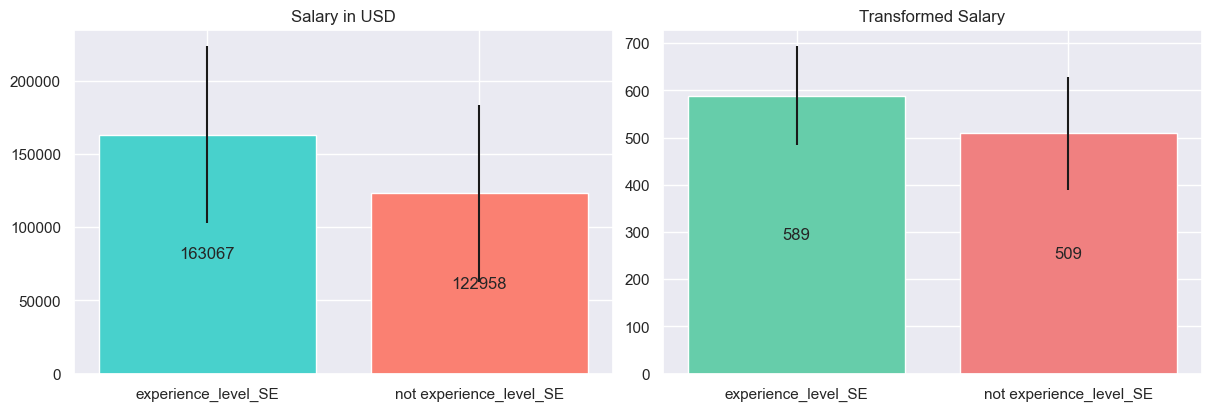

salary_in_usd                transformed_salary     
                            mean     std  count               mean  std
employment_type_CT                                                     
0                         149433   63349  14533                562  116
1                         123018  102058     21                489  182

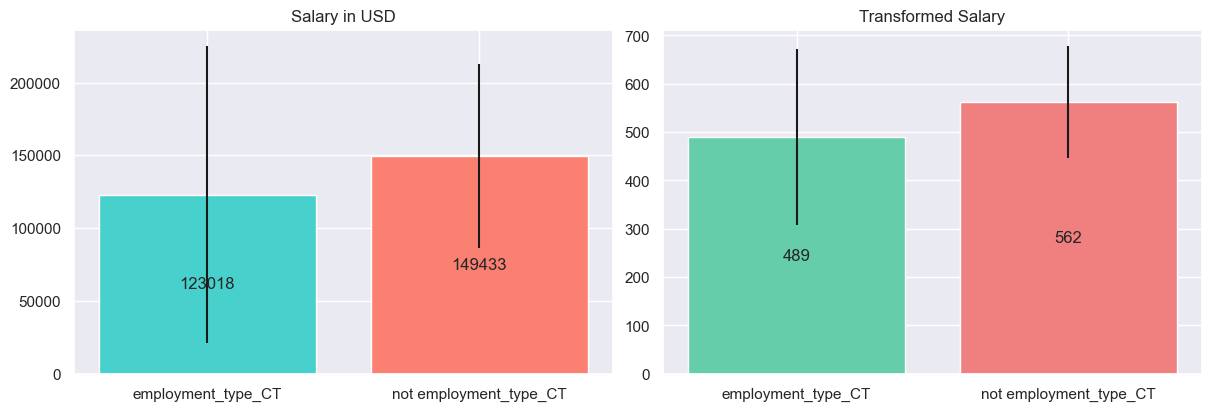

salary_in_usd               transformed_salary     
                            mean    std  count               mean  std
employment_type_FL                                                    
0                         149444  63399  14547                562  116
1                          48646  26666      7                328   84

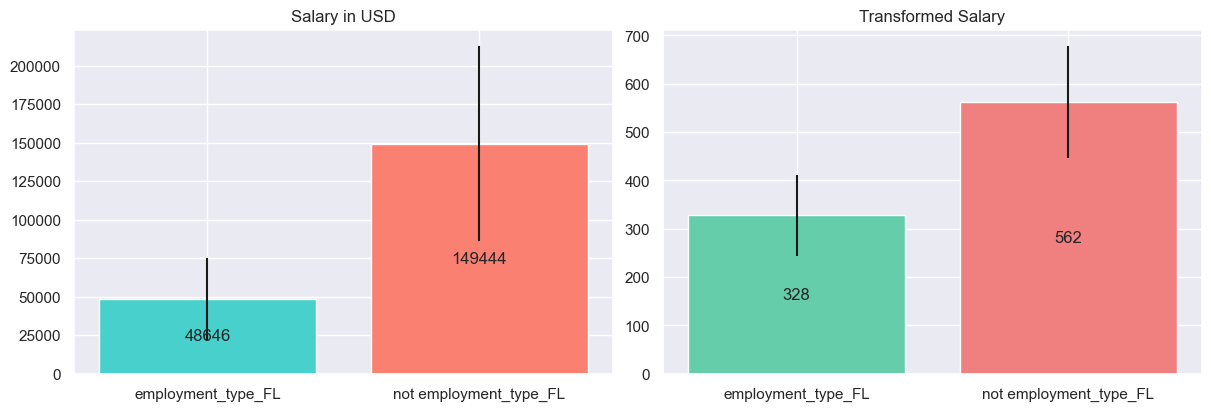

salary_in_usd               transformed_salary     
                            mean    std  count               mean  std
employment_type_FT                                                    
0                          90088  81109     48                419  164
1                         149592  63269  14506                562  116

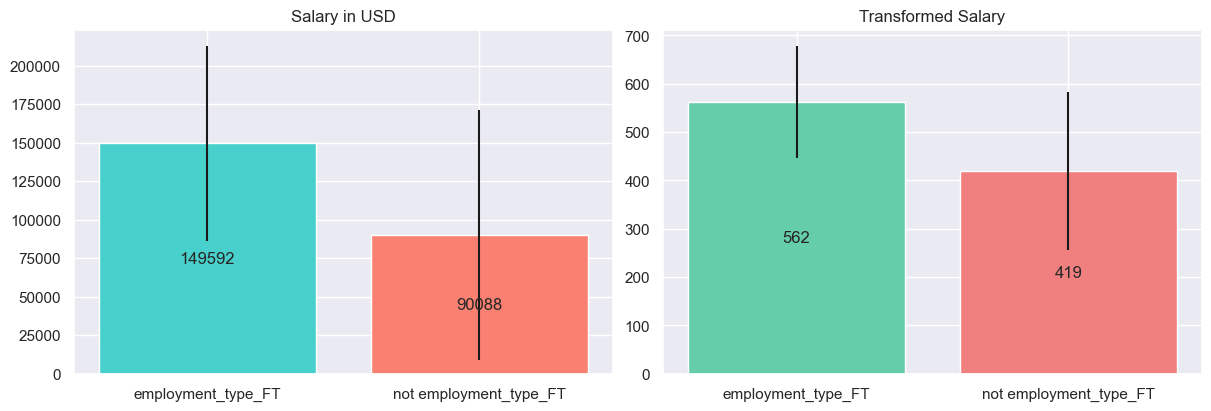

salary_in_usd               transformed_salary     
                            mean    std  count               mean  std
employment_type_PT                                                    
0                         149505  63370  14534                562  116
1                          70016  53192     20                376  138

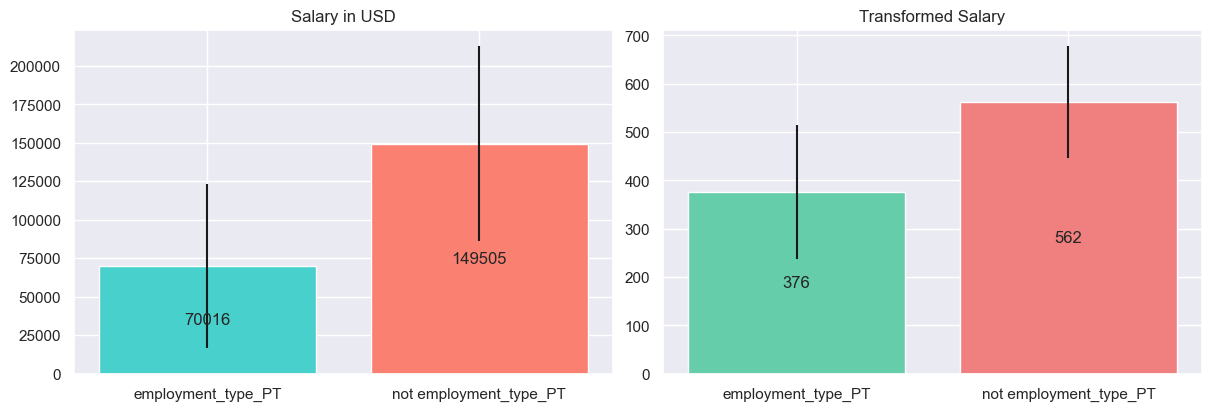

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
salary_currency_AUD                                                    
0                          149448  63415  14543                562  116
1                           79662  27474     11                422   69

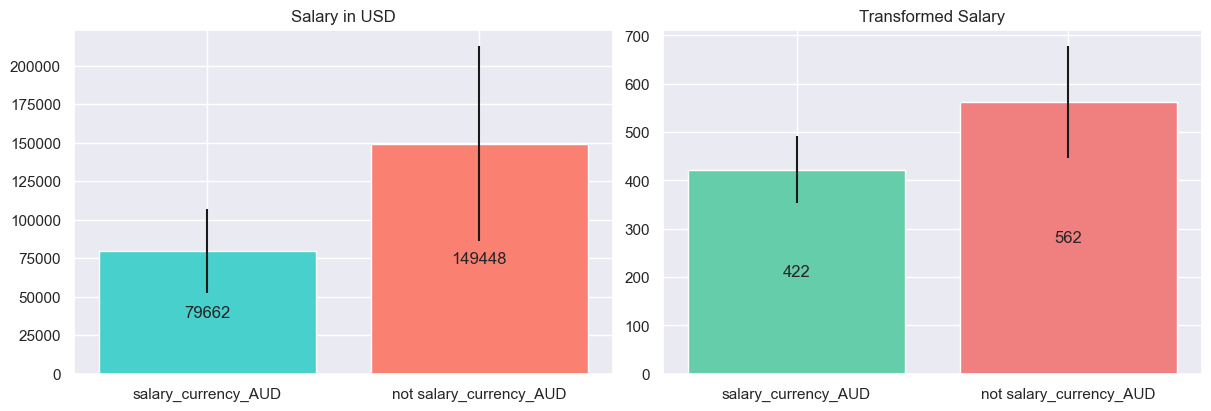

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
salary_currency_CAD                                                    
0                          149532  63415  14506                562  116
1                          108122  52213     48                481  105

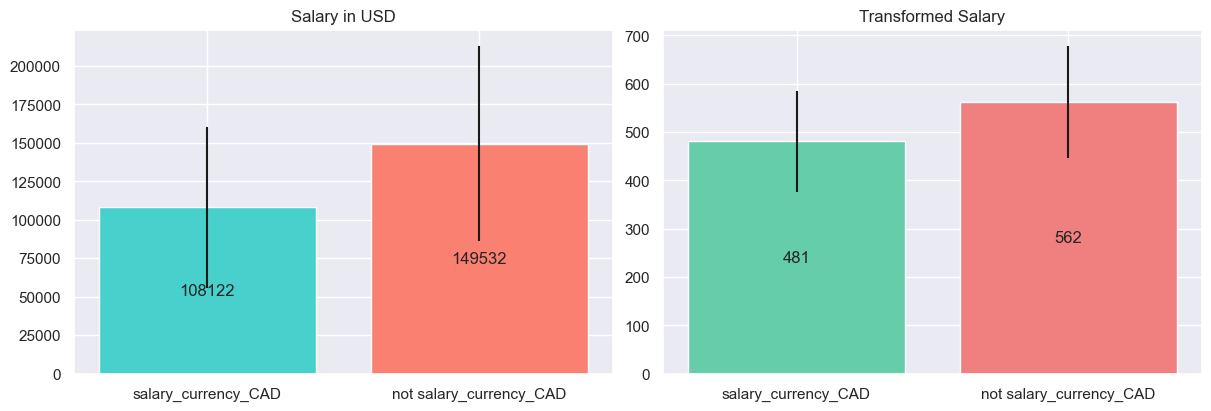

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
salary_currency_CHF                                                    
0                          149402  63417  14546                562  116
1                          137187  79146      8                537  131

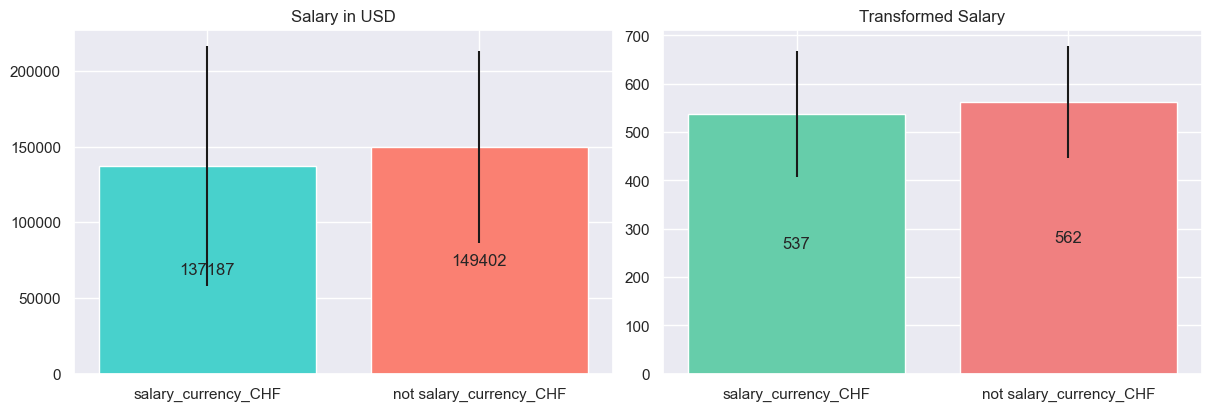

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
salary_currency_EUR                                                    
0                          151753  62435  14162                567  113
1                           64213  32615    392                376   82

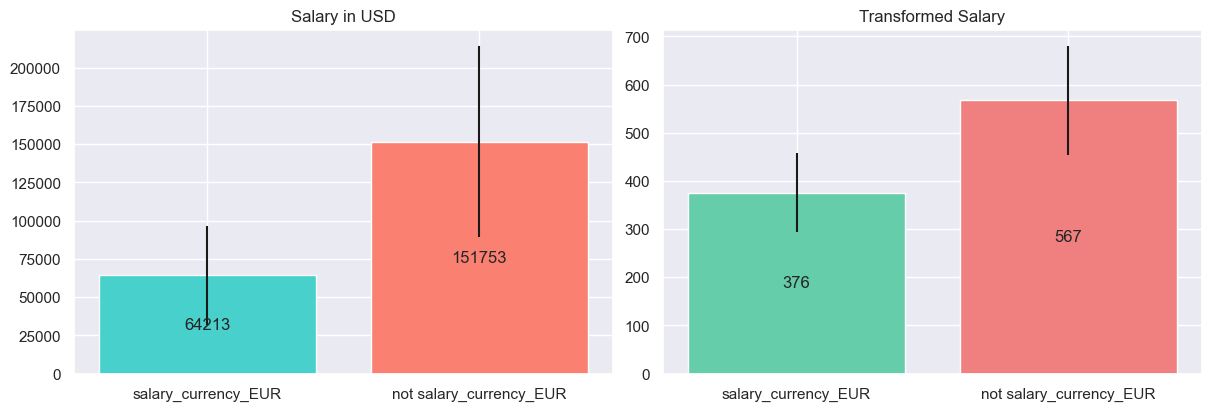

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
salary_currency_GBP                                                    
0                          152162  62531  13997                568  113
1                           79867  42752    557                417   91

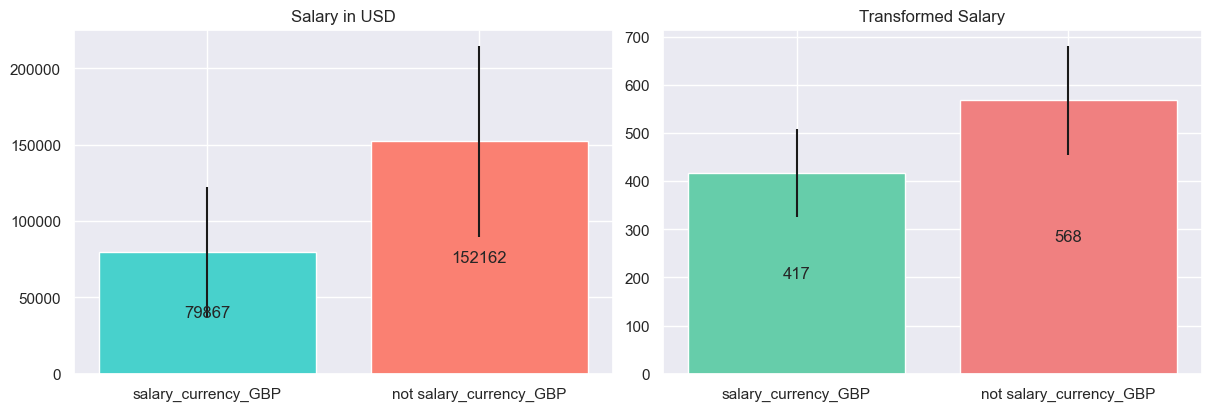

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
salary_currency_INR                                                    
0                          149785  63165  14505                563  115
1                           33910  19277     49                276   68

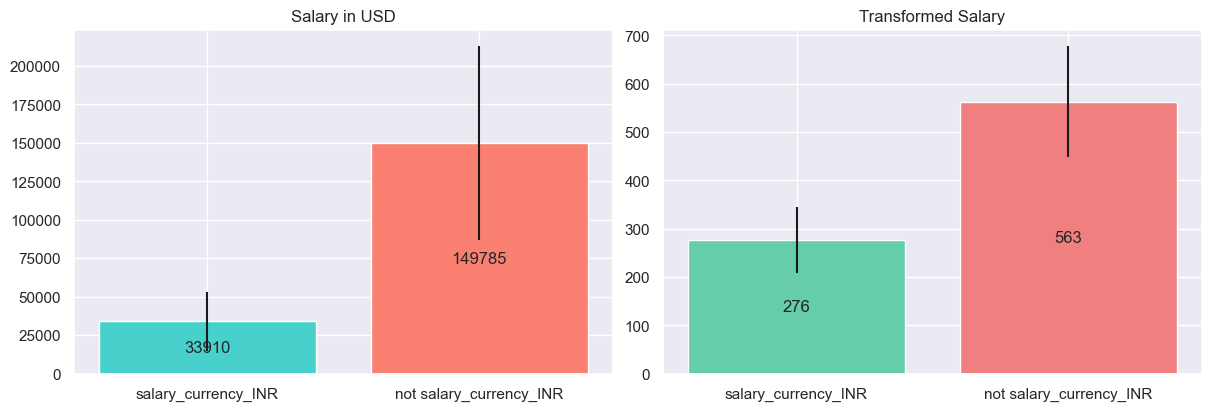

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
salary_currency_PLN                                                    
0                          149442  63395  14548                562  116
1                           36295  11609      6                291   47

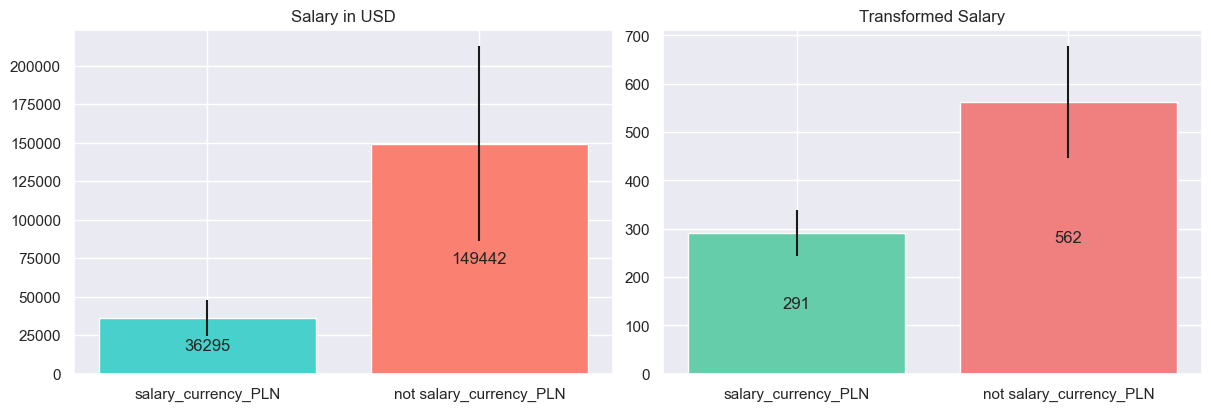

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
salary_currency_USD                                                    
0                           73483  41717   1071                398   96
1                          155425  60909  13483                575  108

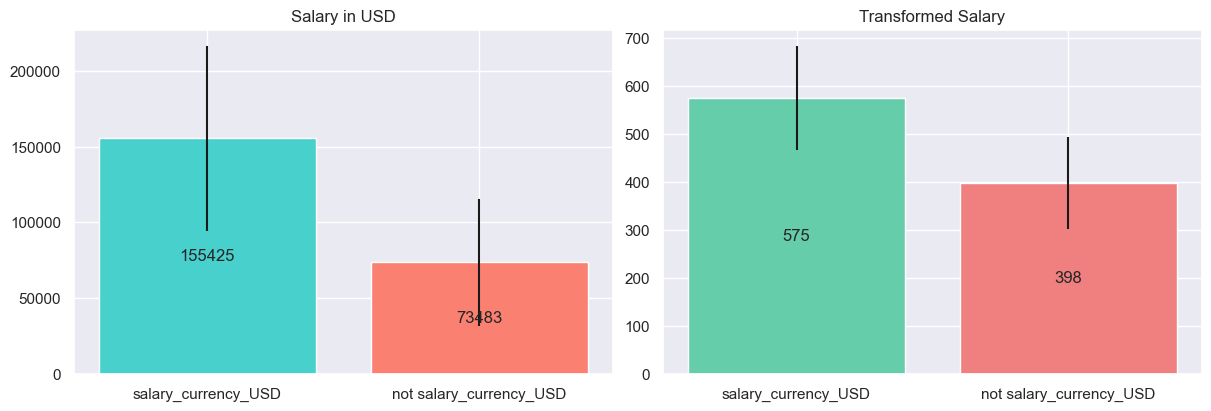

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_AR                                                    
0                            149461  63401  14543                562  116
1                             62272  18504     11                376   55

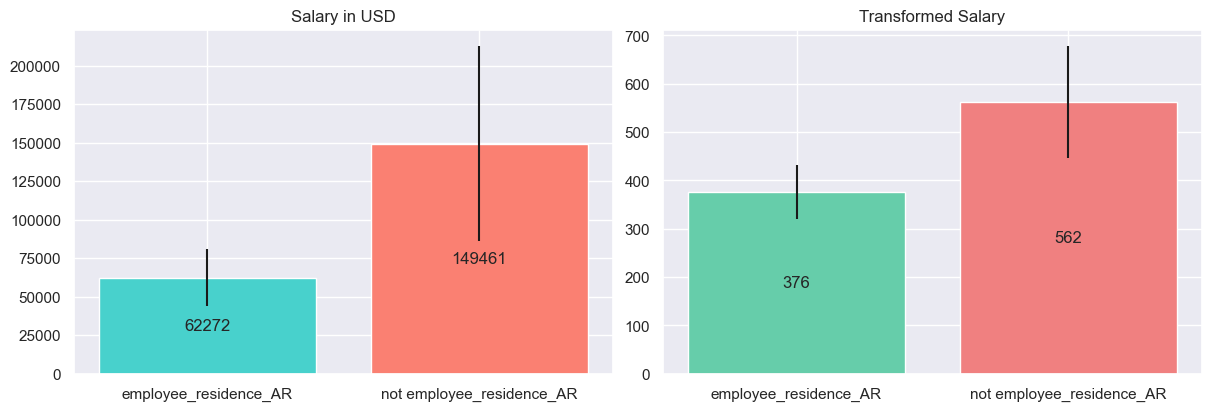

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_AT                                                    
0                            149451  63409  14544                562  116
1                             68378  15101     10                395   41

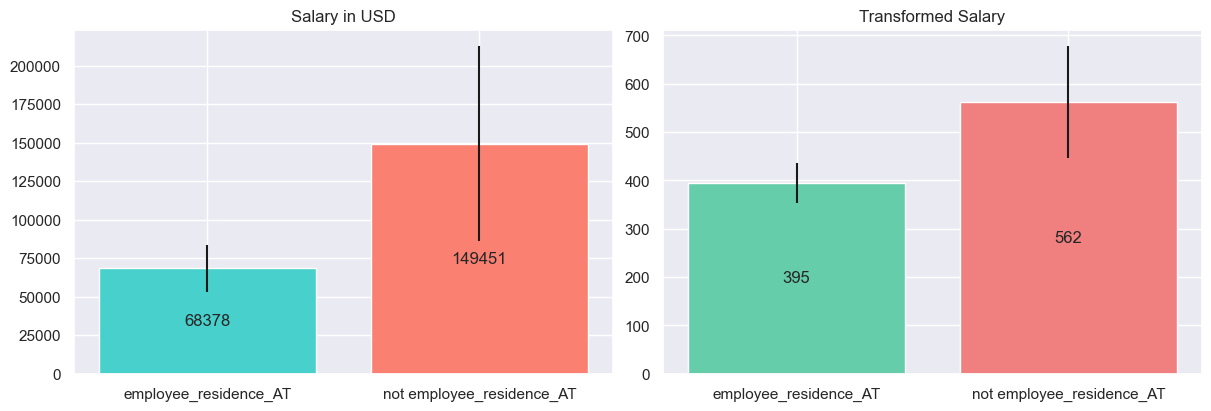

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_AU                                                    
0                            149440  63387  14506                562  116
1                            135952  73275     48                531  136

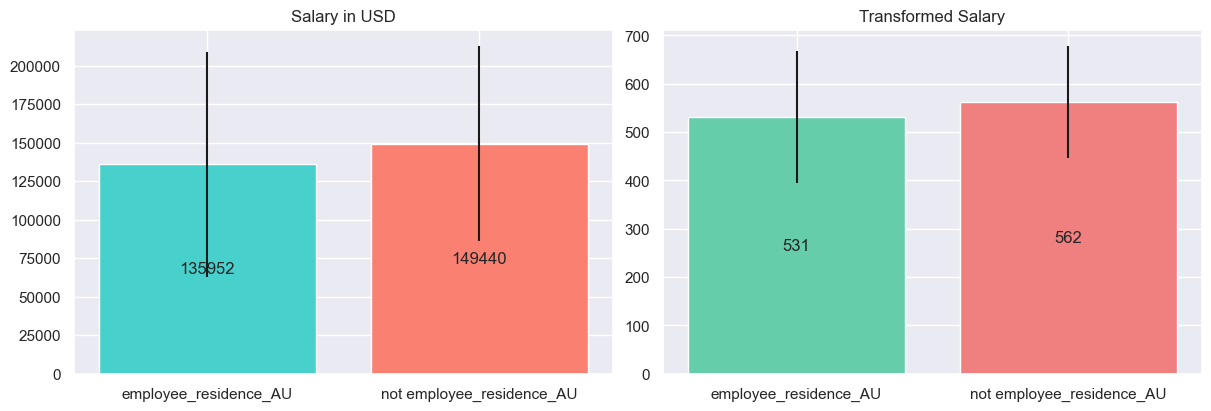

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_BR                                                    
0                            149499  63390  14535                562  116
1                             70263  33412     19                392   87

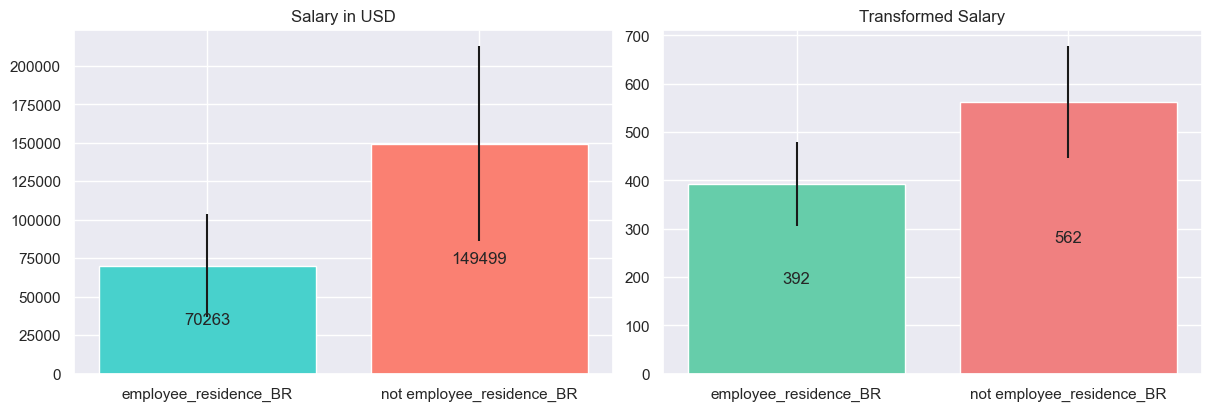

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_CA                                                    
0                            149536  63548  14173                562  116
1                            144168  58471    381                554  107

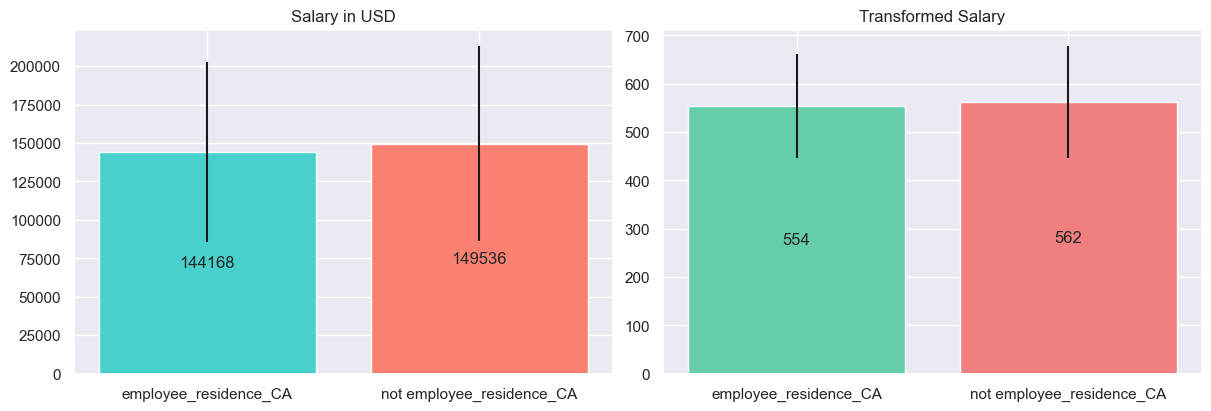

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_CH                                                    
0                            149402  63417  14546                562  116
1                            137187  79146      8                537  131

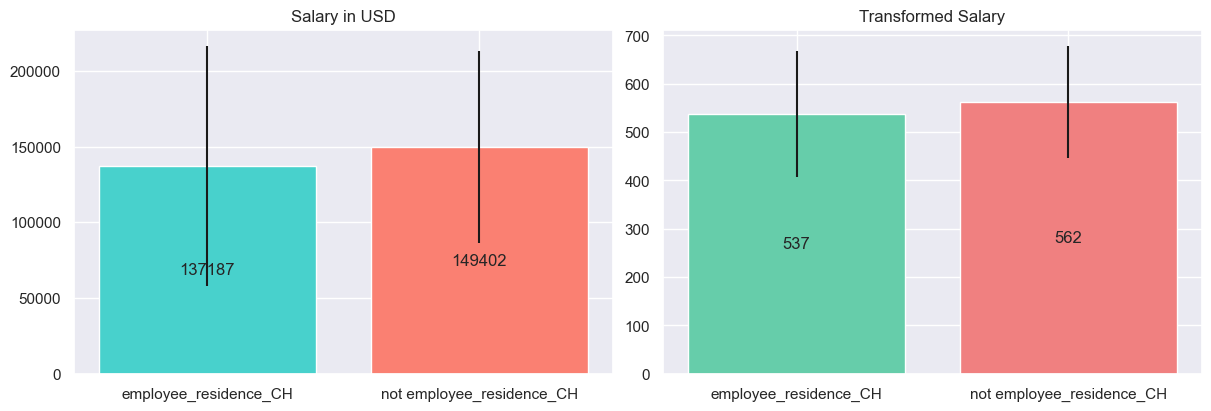

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_CO                                                    
0                            149473  63409  14538                562  116
1                             79115  30019     16                418   79

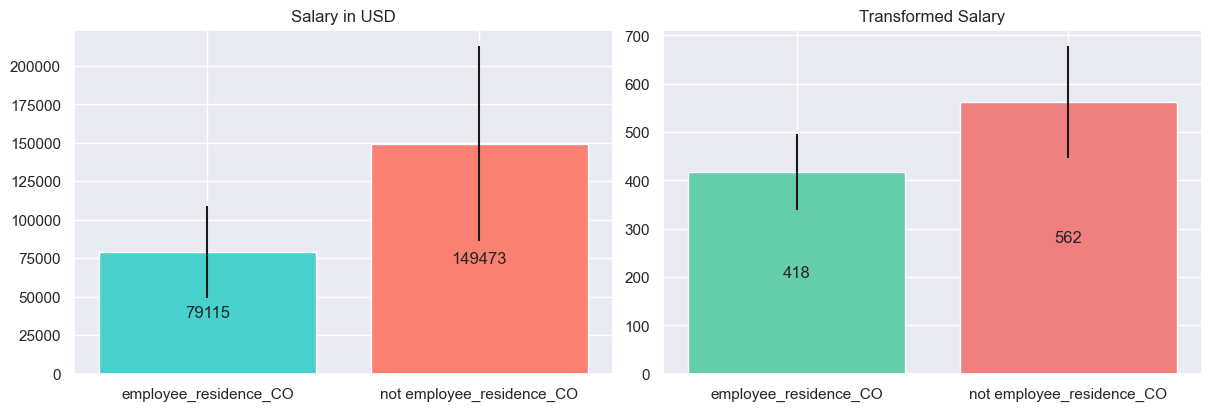

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_DE                                                    
0                            149701  63349  14467                563  116
1                             98510  55151     87                456  116

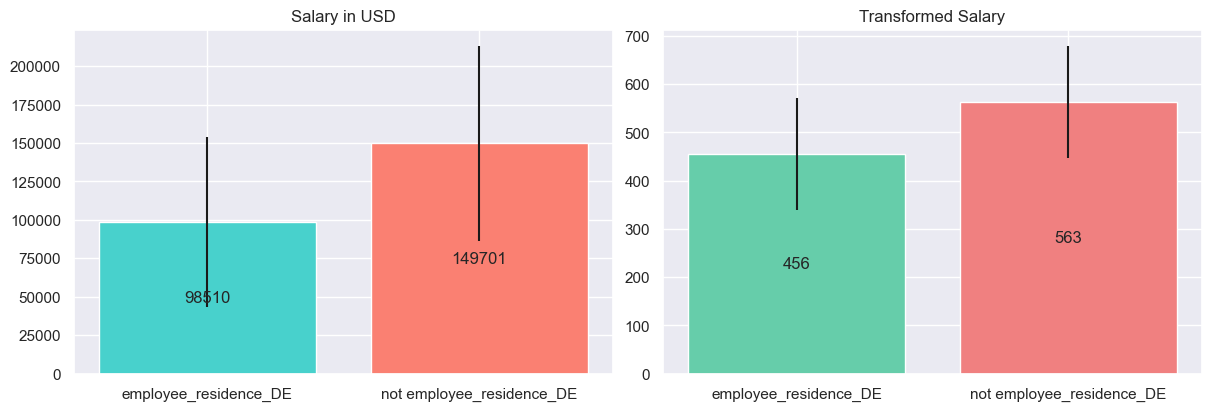

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_EE                                                    
0                            149475  63381  14543                562  116
1                             43941   8749     11                321   30

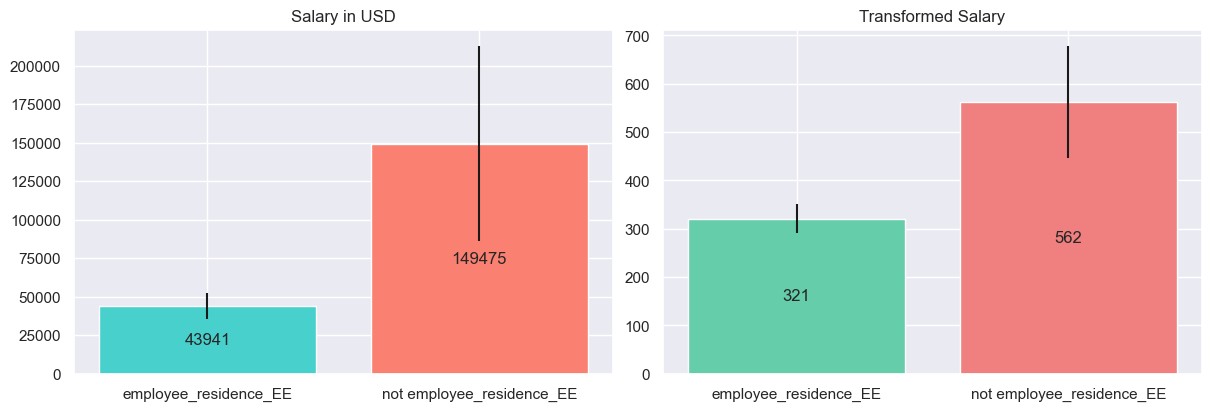

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_EG                                                    
0                            149408  63418  14540                562  116
1                            135807  70464     14                530  143

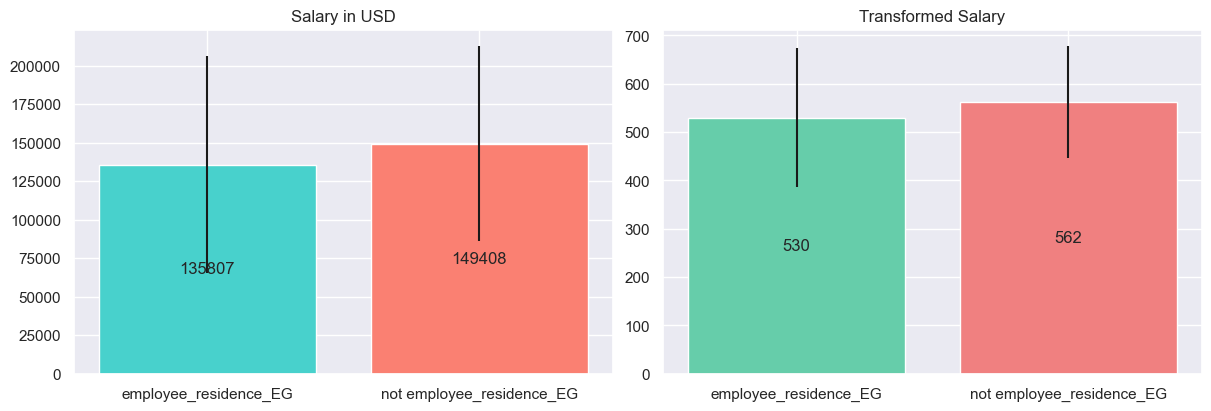

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_ES                                                    
0                            150200  63028  14426                564  115
1                             58668  36987    128                358   86

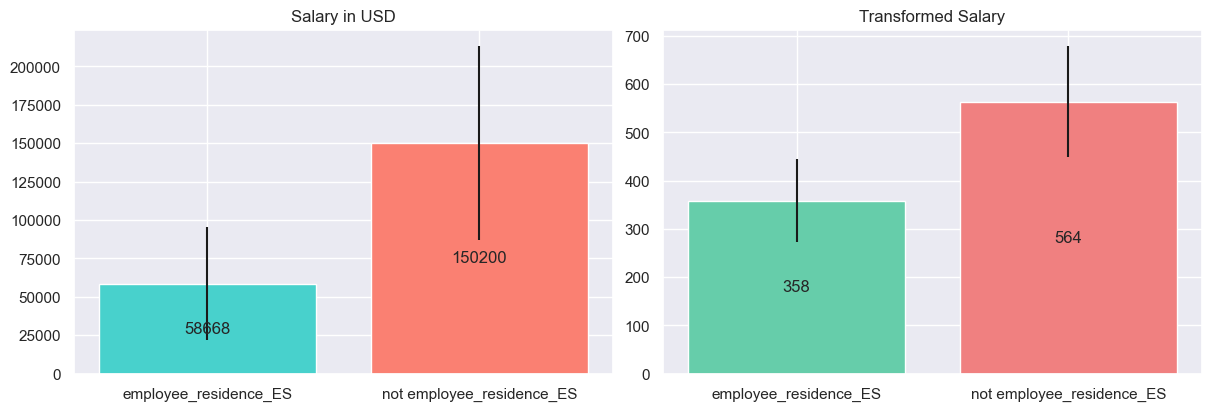

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_FR                                                    
0                            149666  63302  14491                563  116
1                             87129  61200     63                426  125

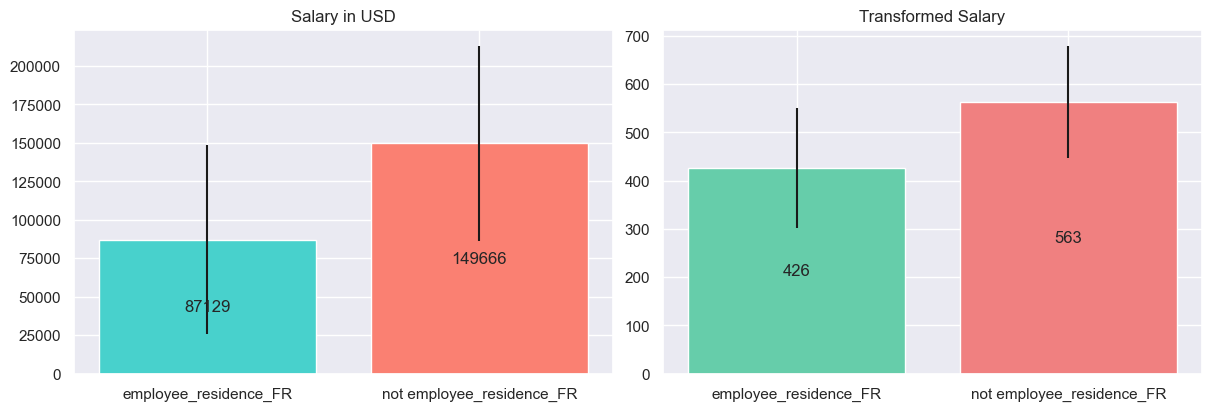

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_GB                                                    
0                            151929  62655  13913                567  114
1                             94391  54463    641                447  112

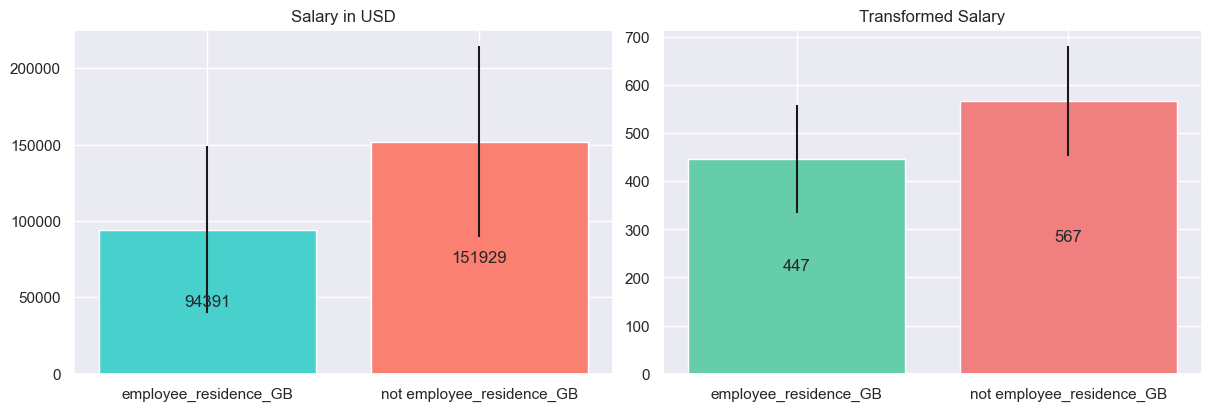

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_GR                                                    
0                            149503  63372  14538                562  116
1                             51692  21262     16                340   71

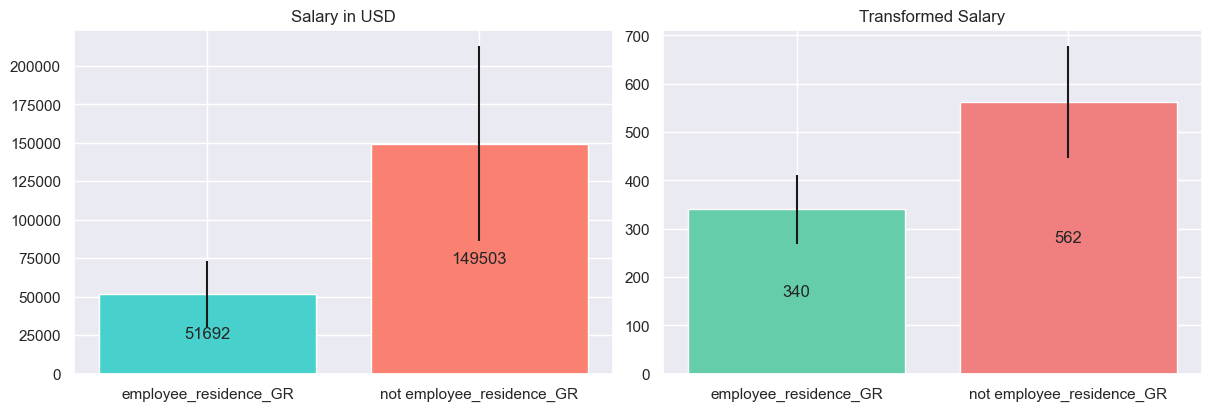

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_IE                                                    
0                            149432  63430  14542                562  116
1                            104694  33896     12                481   69

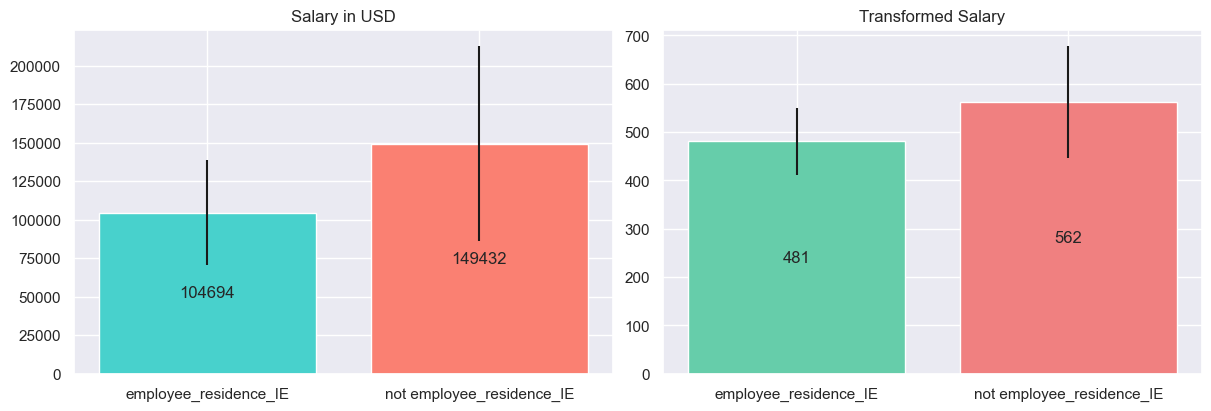

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_IN                                                    
0                            149861  63135  14488                563  115
1                             47248  39994     66                312  111

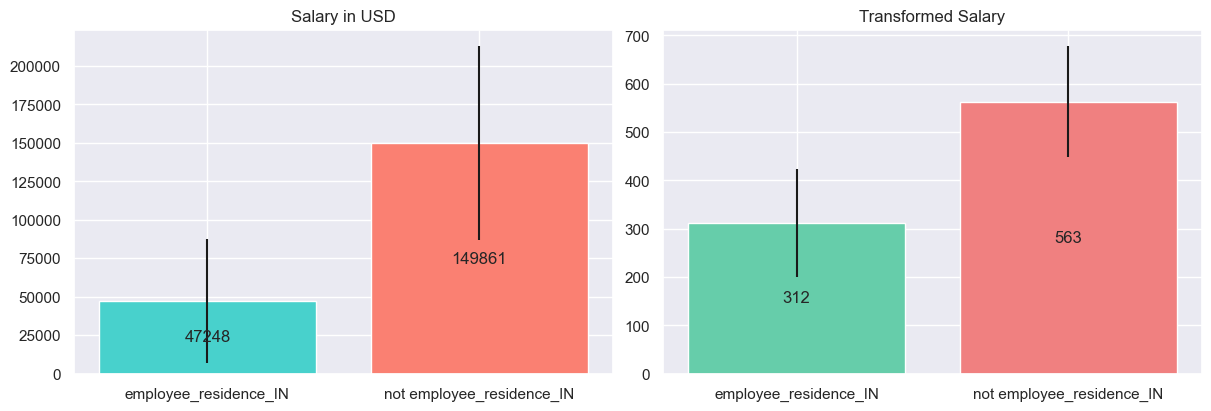

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_IT                                                    
0                            149532  63358  14533                562  116
1                             54867  30538     21                347   87

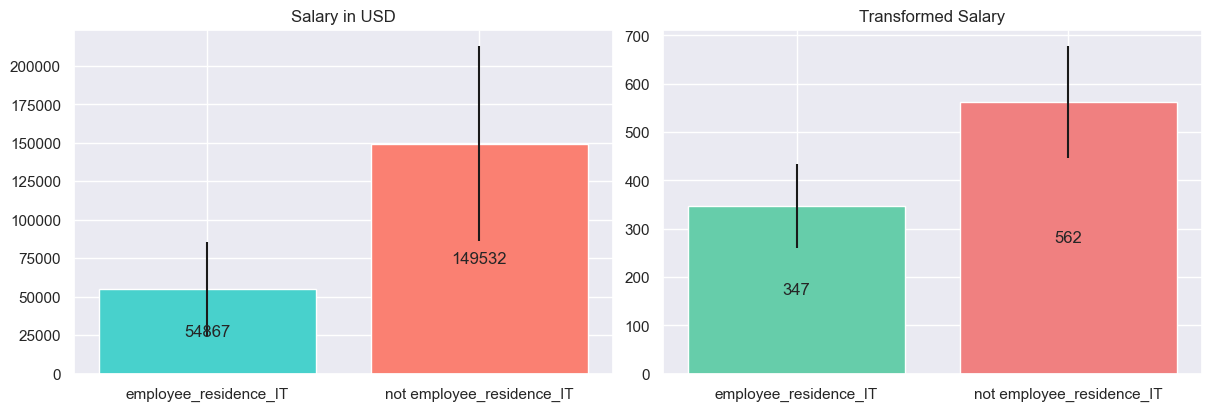

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_LT                                                    
0                            149484  63395  14538                562  116
1                             68553  29287     16                390   77

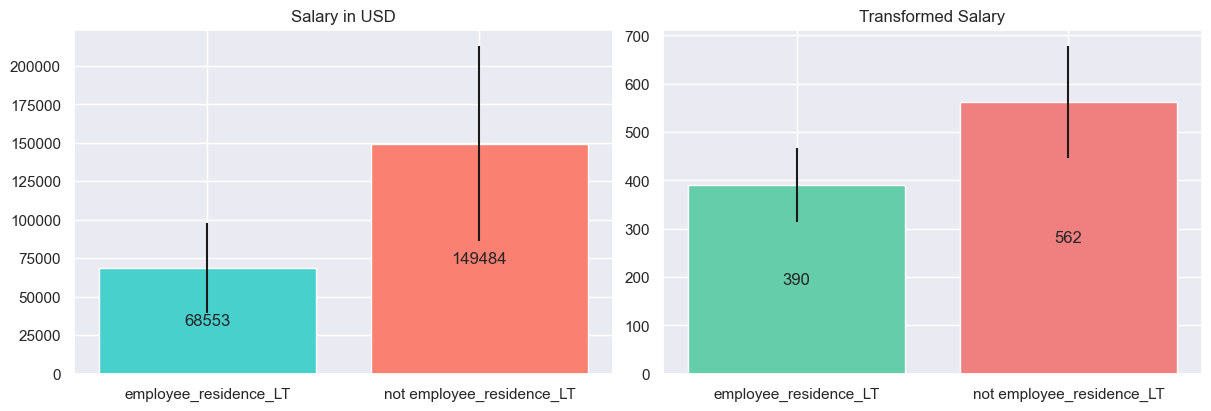

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_LV                                                    
0                            149486  63384  14540                562  116
1                             54734  19875     14                353   59

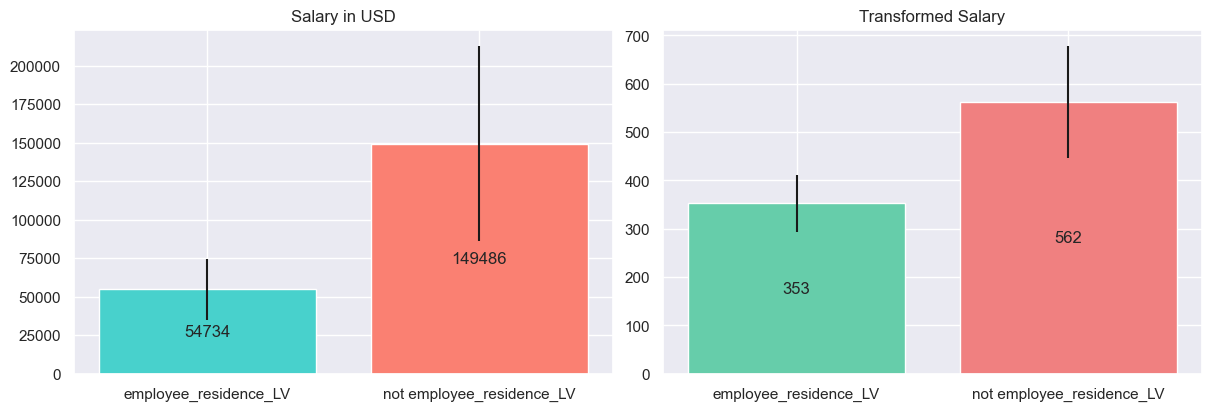

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_MX                                                    
0                            149445  63395  14542                562  116
1                             89258  72868     12                418  166

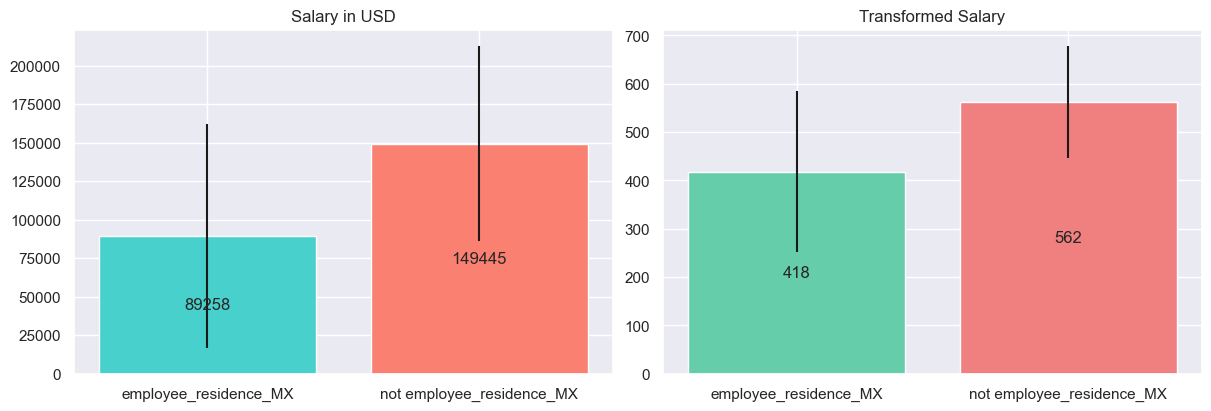

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_NG                                                    
0                            149461  63382  14544                562  116
1                             53900  53637     10                329  132

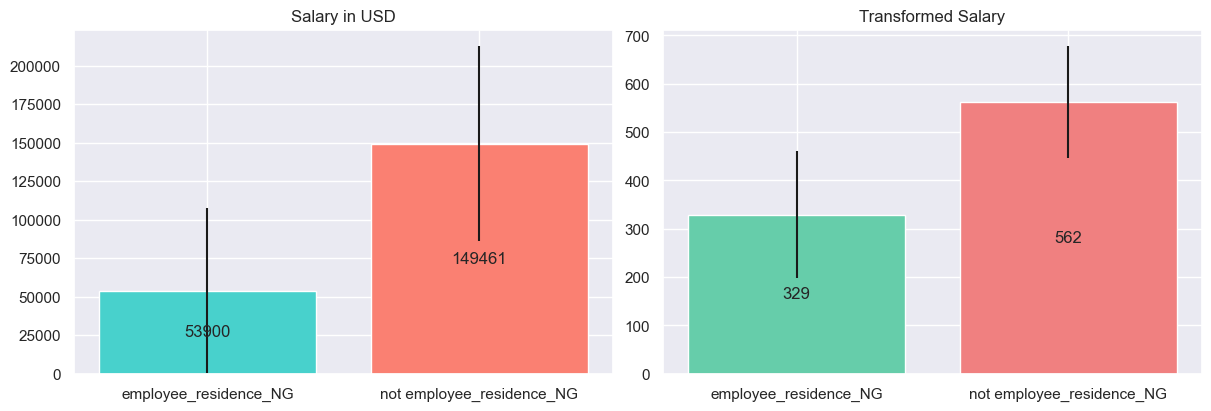

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_NL                                                    
0                            149528  63396  14527                562  116
1                             77820  28550     27                416   73

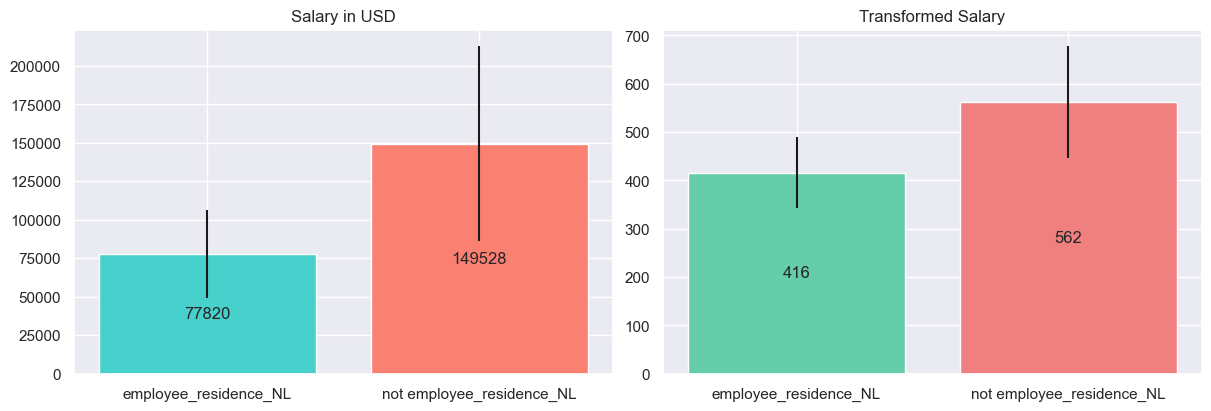

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_NZ                                                    
0                            149394  63432  14549                562  116
1                            152218  35137      5                578   61

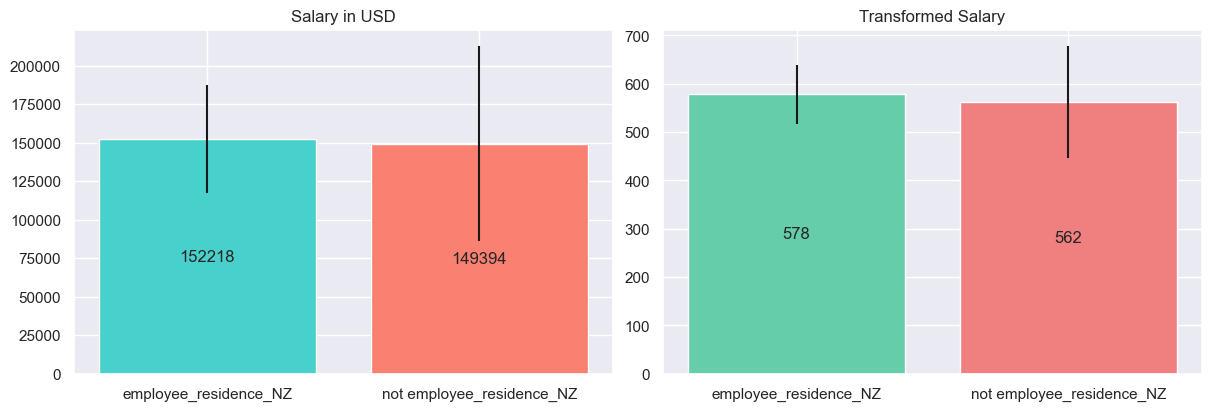

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_PH                                                    
0                            149442  63401  14547                562  116
1                             51337  24241      7                339   76

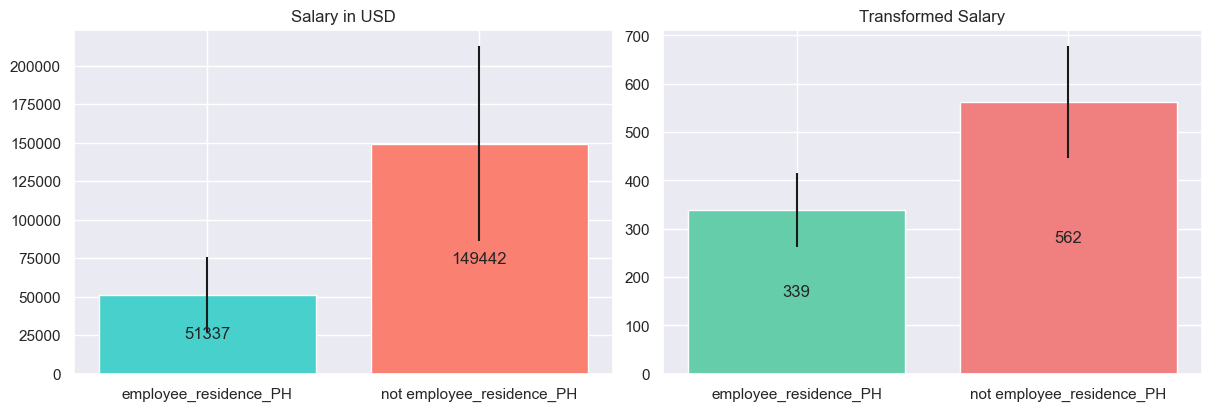

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_PL                                                    
0                            149463  63396  14540                562  116
1                             79055  54735     14                404  133

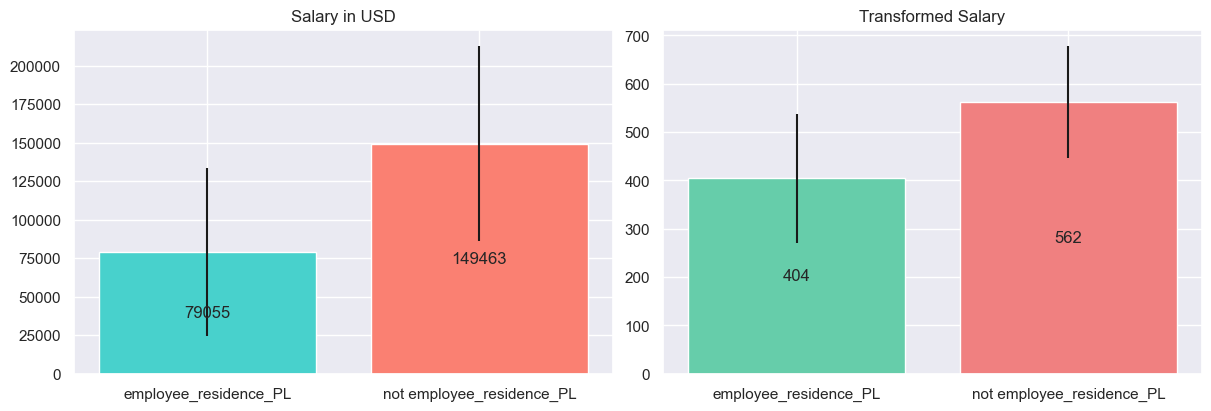

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_PT                                                    
0                            149592  63328  14524                562  116
1                             53920  28464     30                345   83

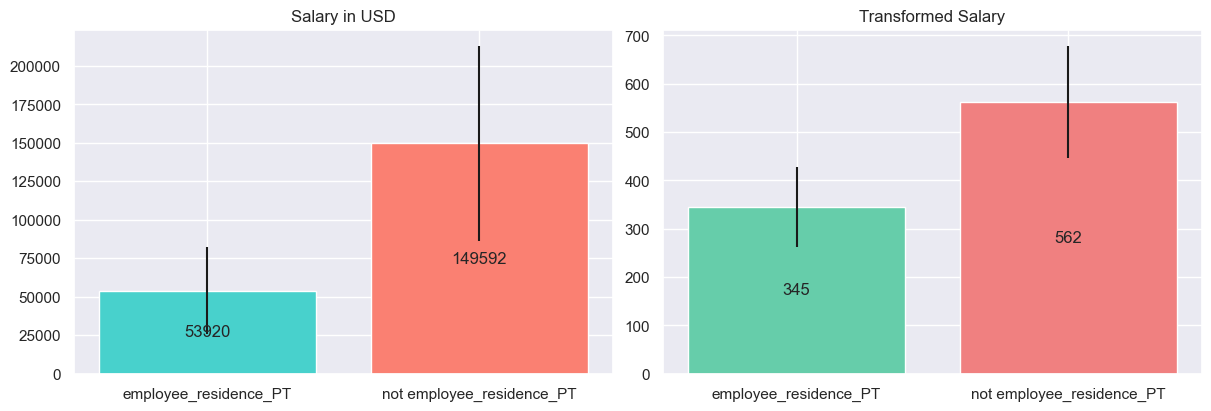

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_SI                                                    
0                            149434  63407  14548                562  116
1                             56186  28245      6                353   84

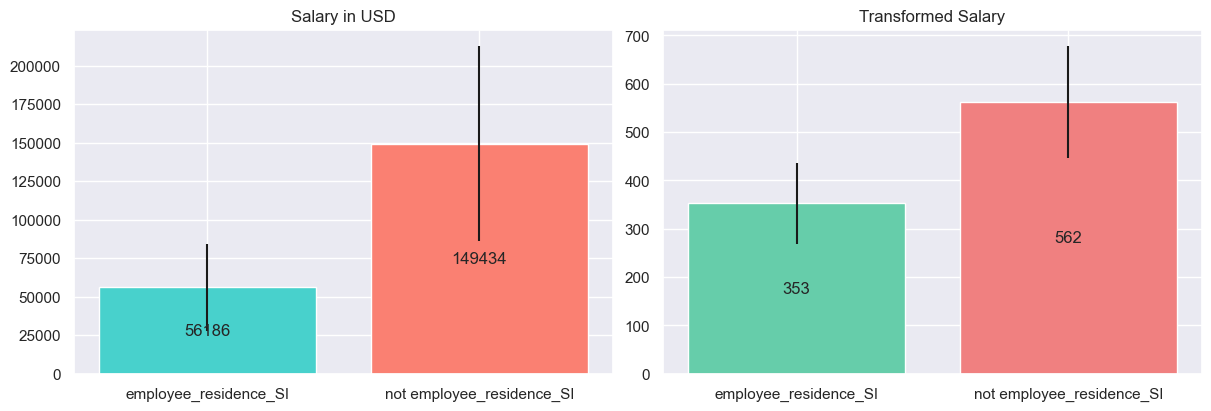

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_UA                                                    
0                            149434  63405  14543                562  116
1                             98272  71246     11                447  150

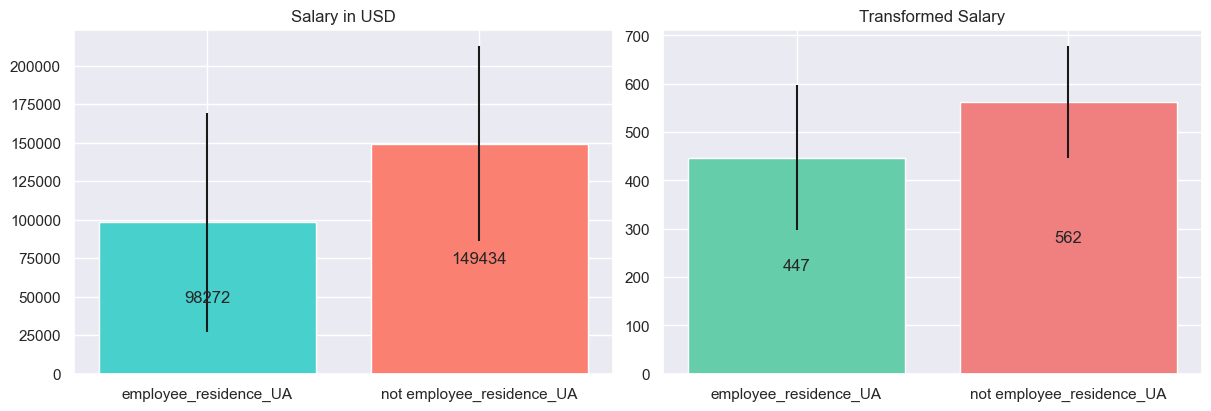

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_US                                                    
0                             98354  60618   1718                452  129
1                            156227  60615  12836                577  106

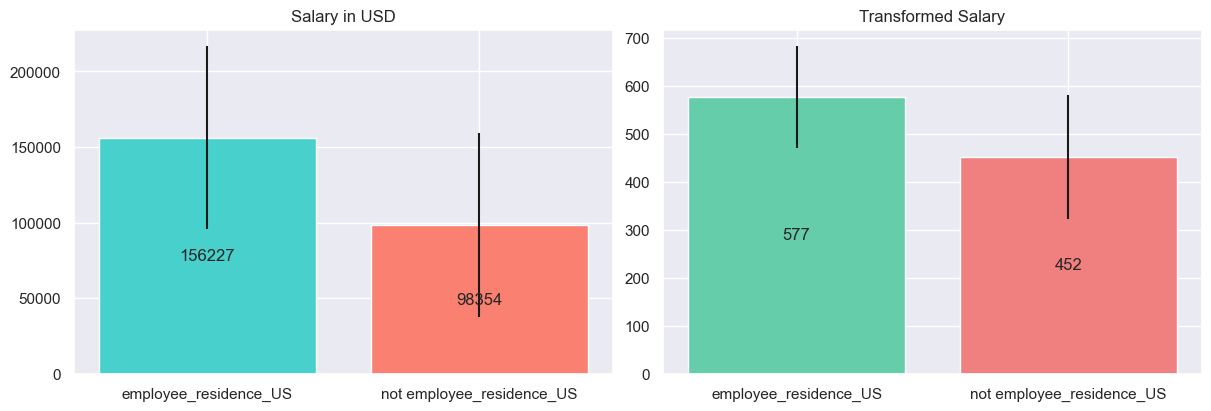

salary_in_usd               transformed_salary     
                               mean    std  count               mean  std
employee_residence_ZA                                                    
0                            149484  63386  14540                562  116
1                             57308  24142     14                359   66

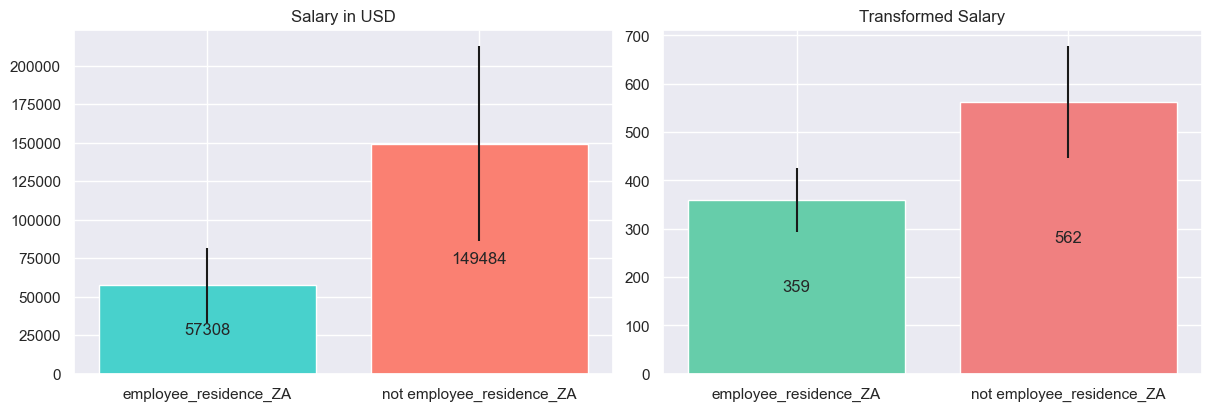

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
remote_ratio_Hybrid                                                    
0                          150260  62991  14360                564  115
1                           85404  62782    194                418  134

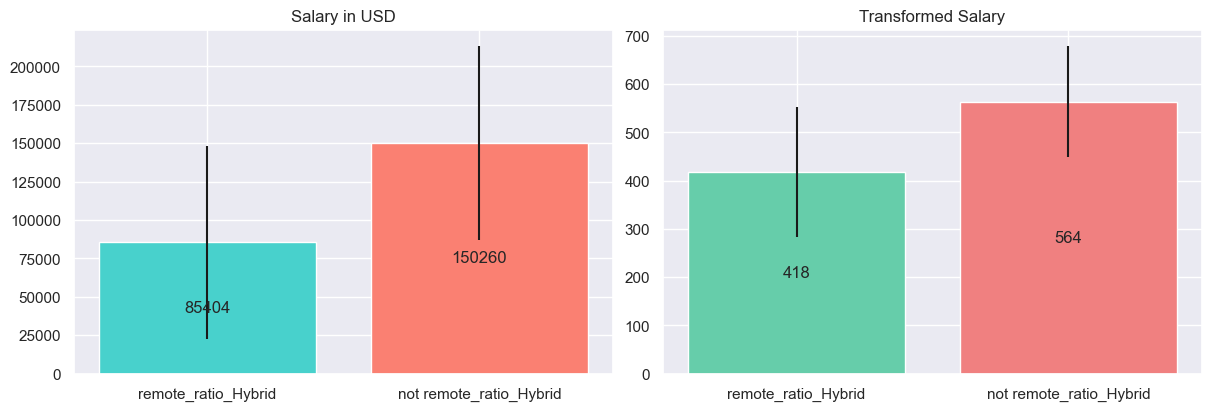

salary_in_usd              transformed_salary     
                              mean    std count               mean  std
remote_ratio_On_Site                                                   
0                           143374  60520  4825                551  116
1                           152382  64612  9729                568  116

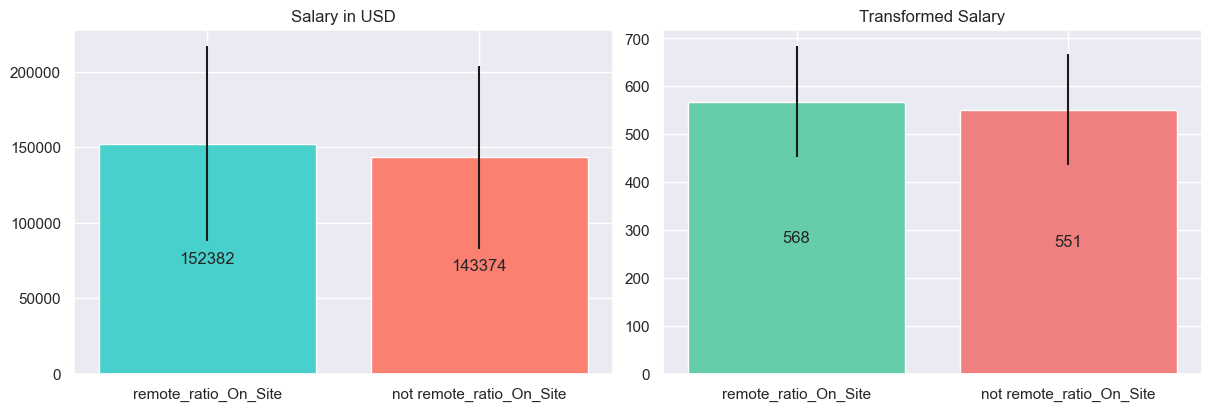

salary_in_usd              transformed_salary     
                             mean    std count               mean  std
remote_ratio_Remote                                                   
0                          151072  65236  9923                565  118
1                          145802  59204  4631                556  111

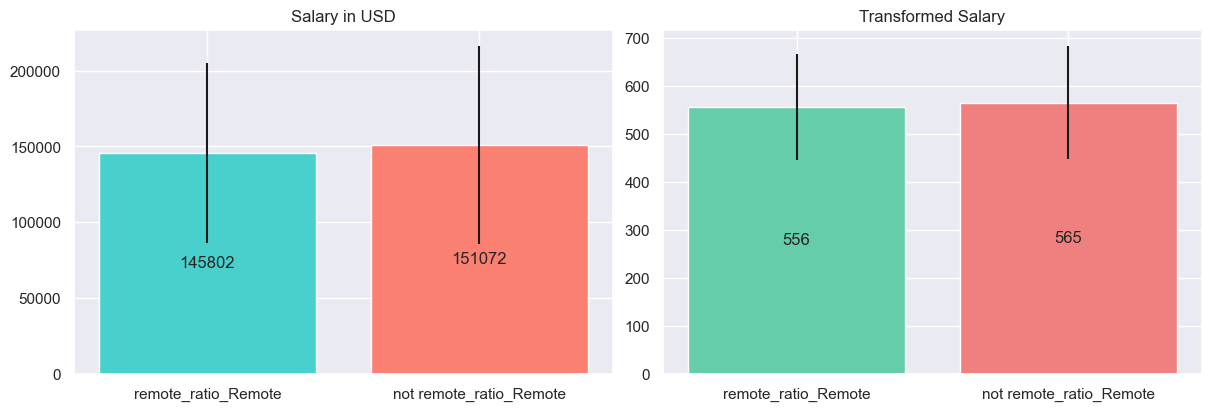

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_AR                                                    
0                          149434  63414  14547                562  116
1                           69571  17299      7                398   48

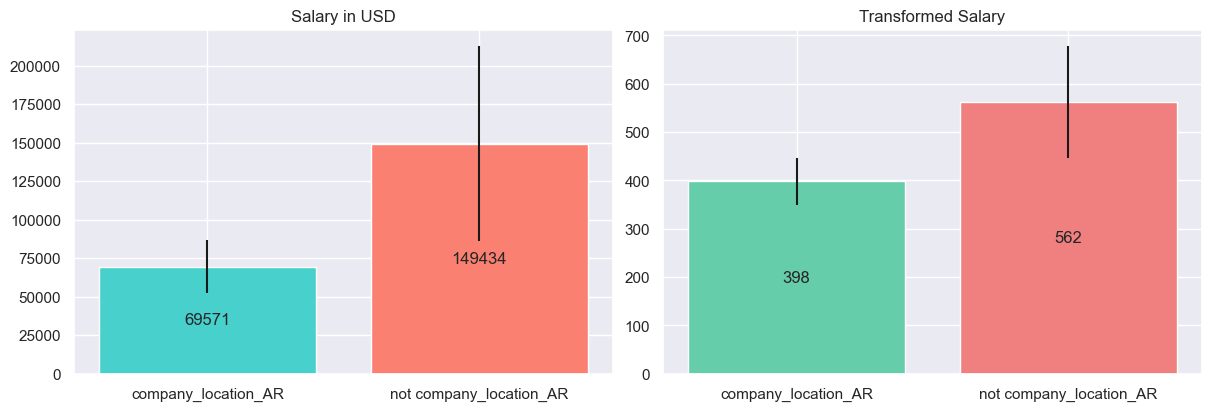

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_AT                                                    
0                          149451  63409  14544                562  116
1                           68479  15045     10                396   41

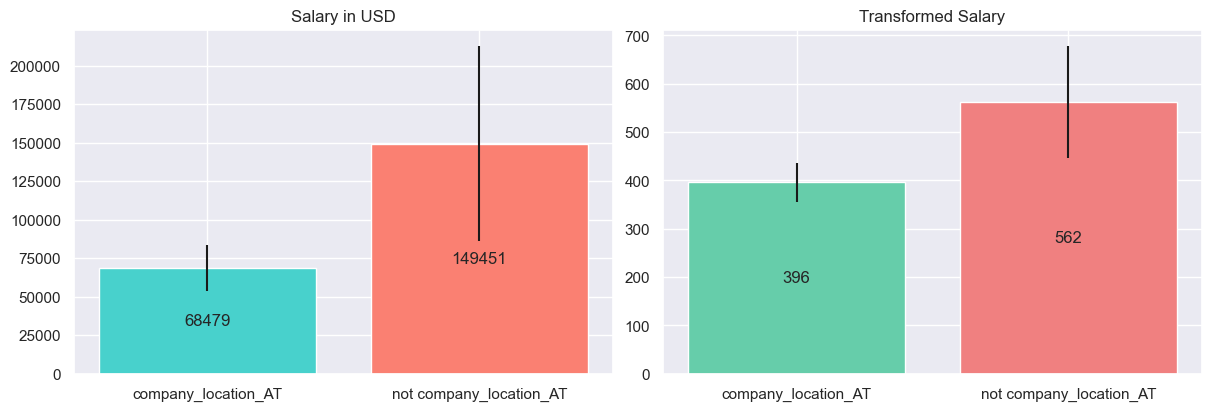

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_AU                                                    
0                          149445  63386  14504                562  116
1                          134934  72972     50                529  137

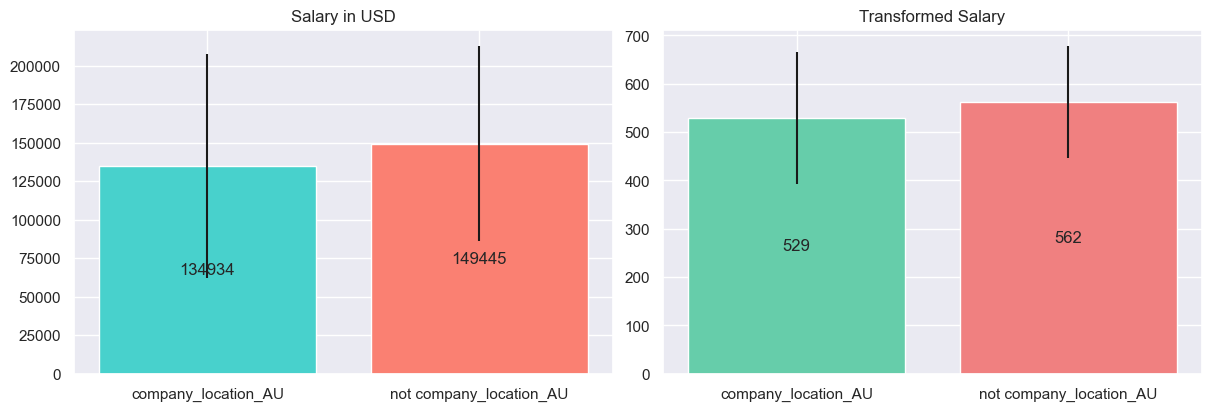

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_BR                                                    
0                          149496  63387  14537                562  116
1                           63235  25395     17                376   73

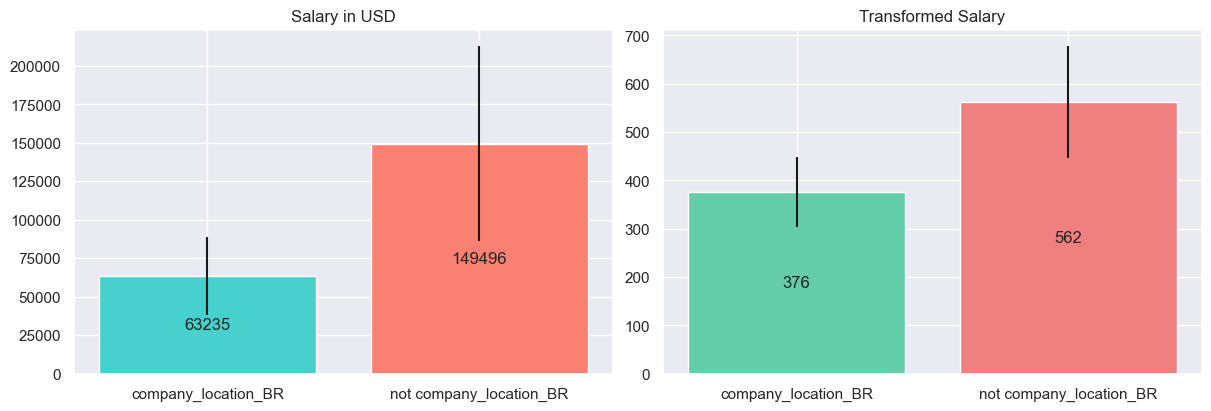

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_CA                                                    
0                          149545  63534  14171                562  116
1                          143867  59049    383                553  109

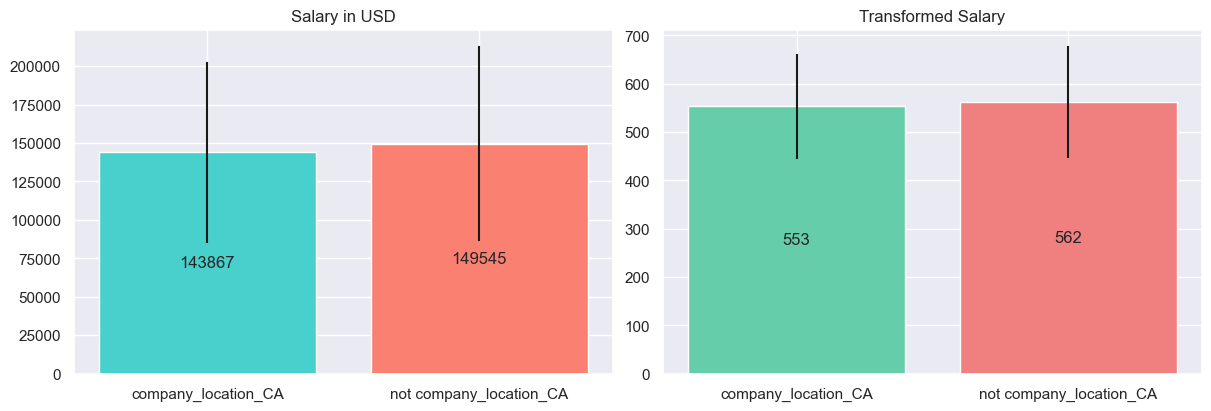

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_CH                                                    
0                          149411  63411  14545                562  116
1                          124646  83045      9                504  157

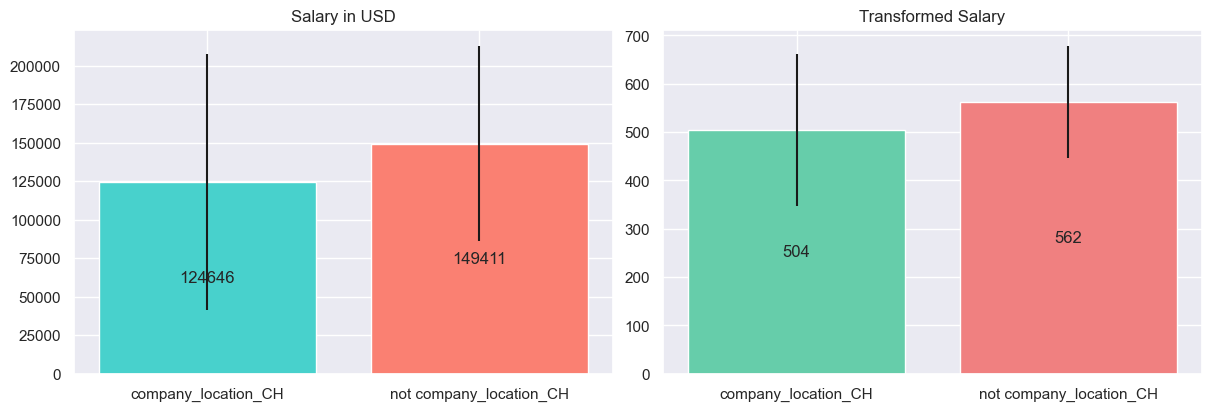

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_CO                                                    
0                          149473  63409  14538                562  116
1                           79115  30019     16                418   79

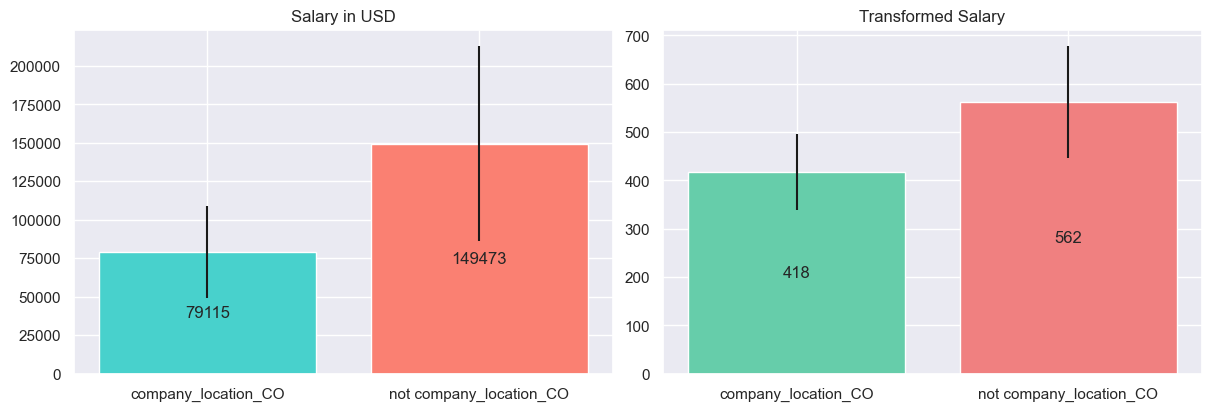

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_DE                                                    
0                          149737  63327  14463                563  116
1                           95051  55176     91                448  117

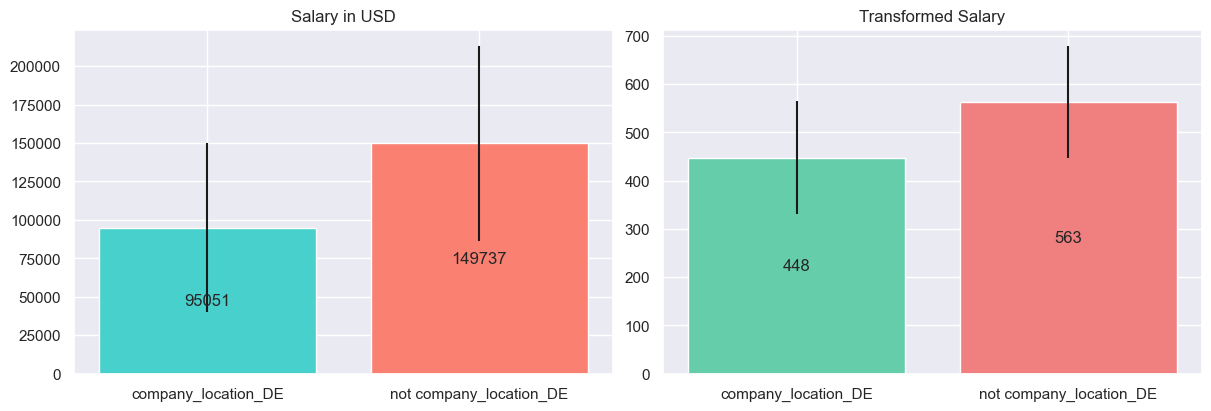

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_EE                                                    
0                          149475  63381  14543                562  116
1                           43941   8749     11                321   30

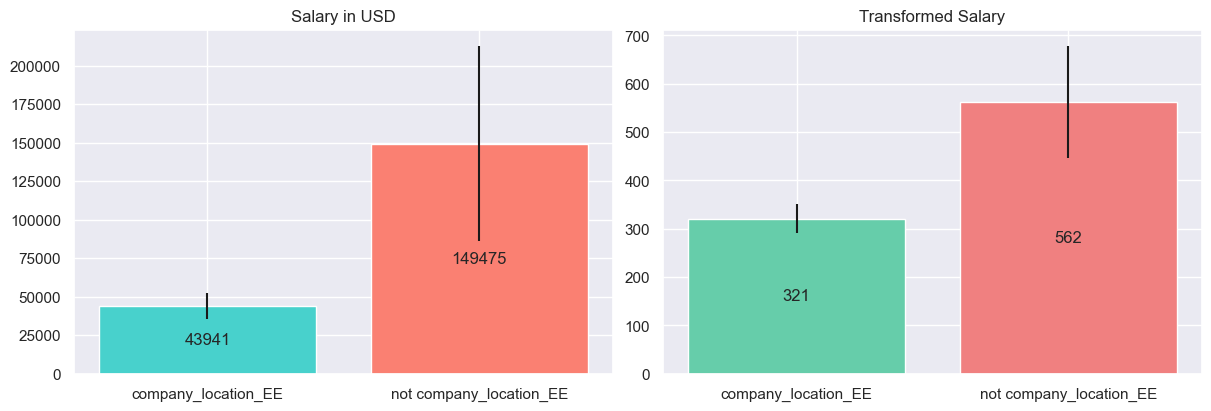

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_EG                                                    
0                          149403  63420  14541                562  116
1                          140869  70642     13                540  144

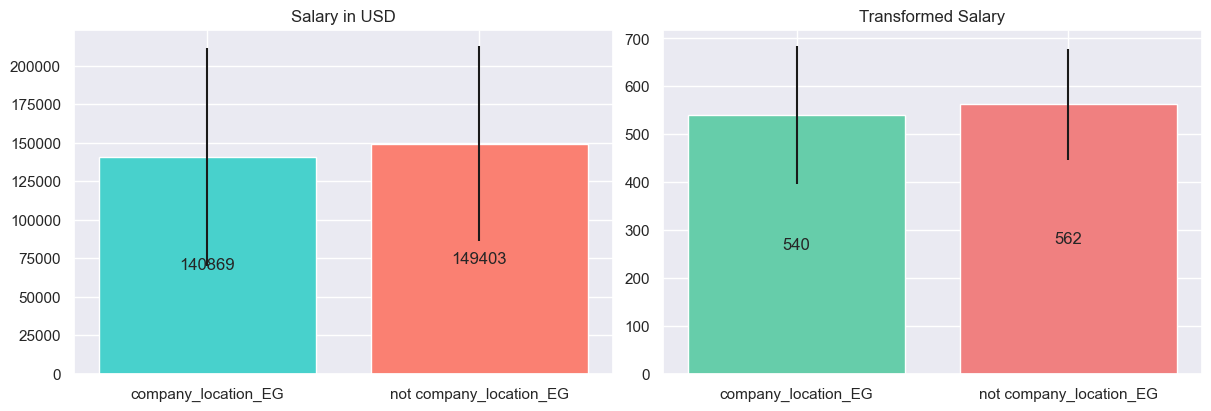

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_ES                                                    
0                          150203  63025  14428                564  115
1                           56932  34523    126                354   80

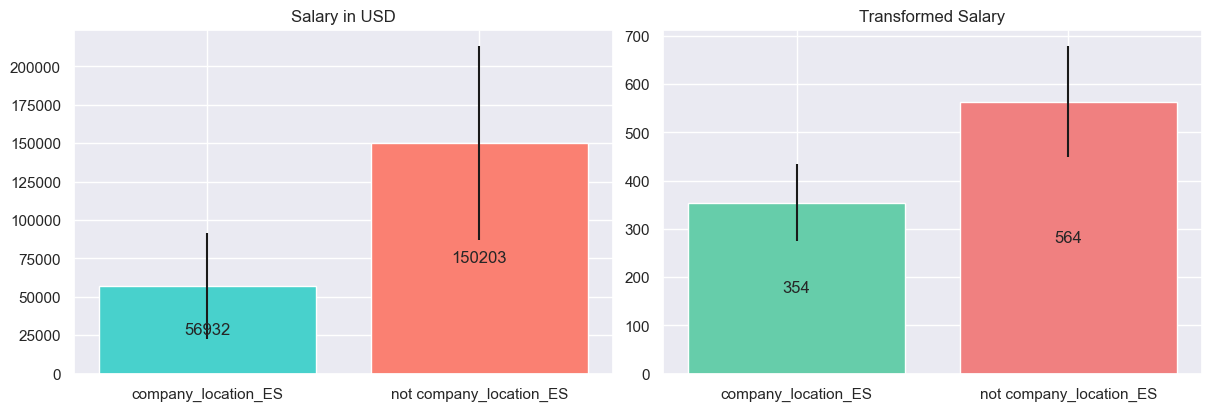

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_FR                                                    
0                          149649  63327  14496                563  116
1                           85878  55799     58                424  120

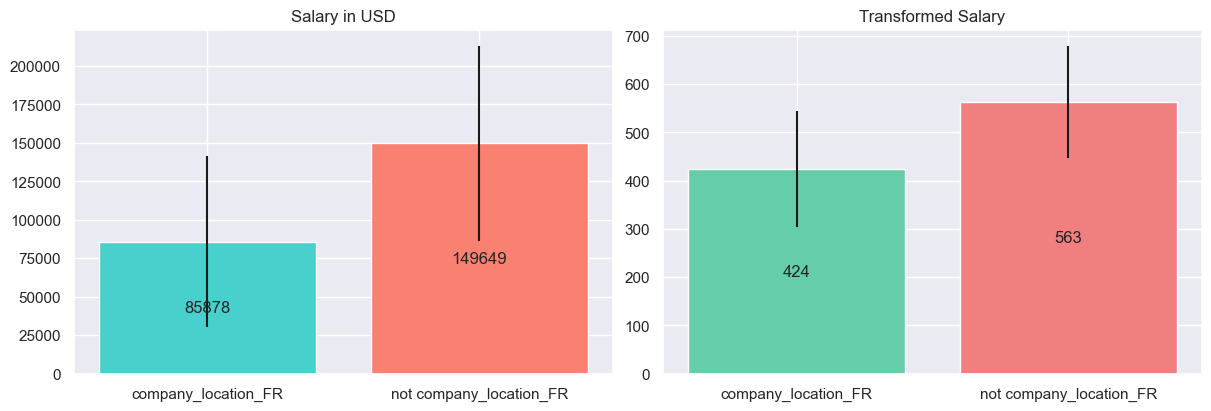

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_GB                                                    
0                          151958  62645  13908                567  114
1                           94211  54355    646                447  112

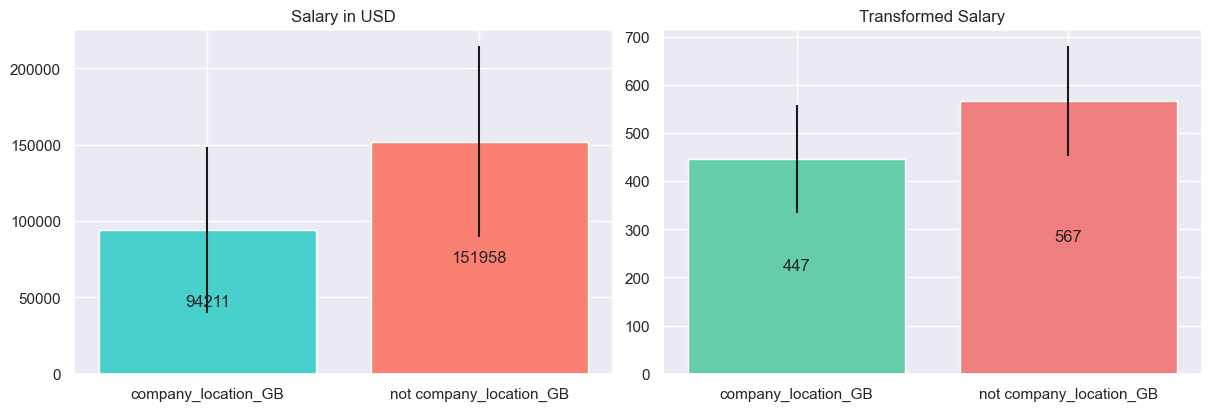

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_GR                                                    
0                          149489  63380  14540                562  116
1                           52260  21279     14                342   71

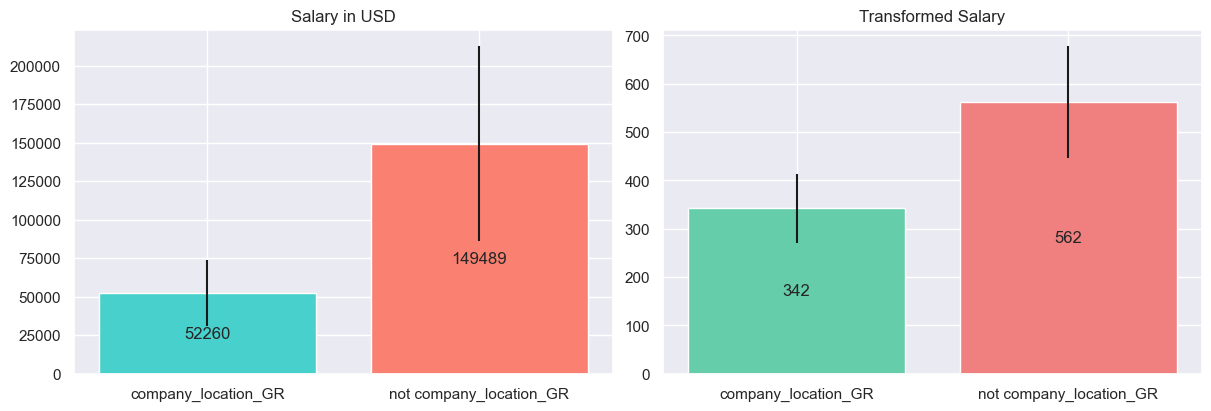

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_IE                                                    
0                          149432  63430  14542                562  116
1                          104694  33896     12                481   69

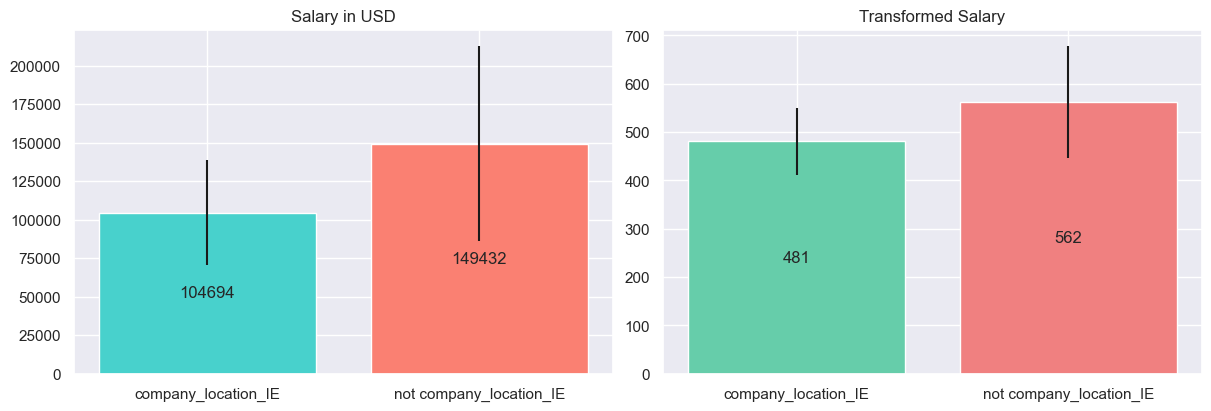

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_IN                                                    
0                          149820  63149  14497                563  115
1                           41360  34229     57                295  100

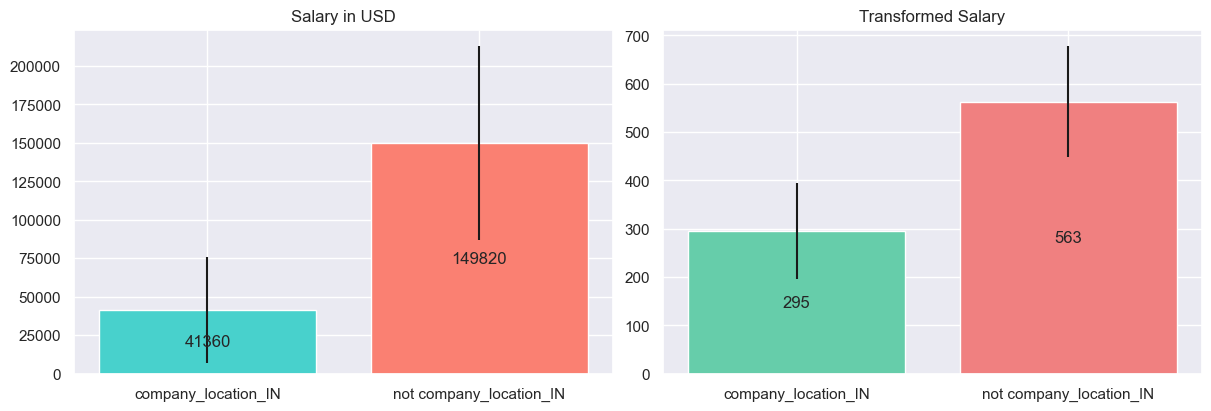

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_IT                                                    
0                          149491  63377  14540                562  116
1                           49600  18169     14                335   63

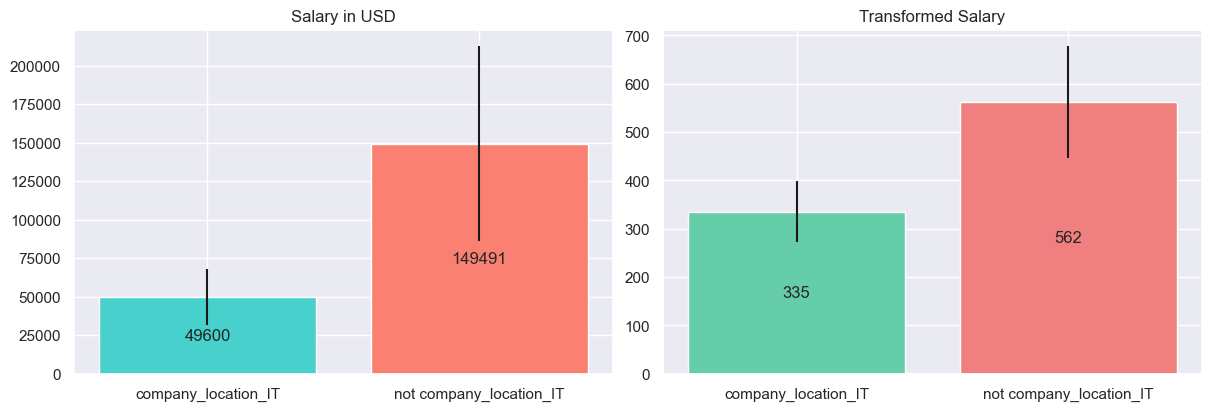

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_LT                                                    
0                          149484  63395  14538                562  116
1                           68553  29287     16                390   77

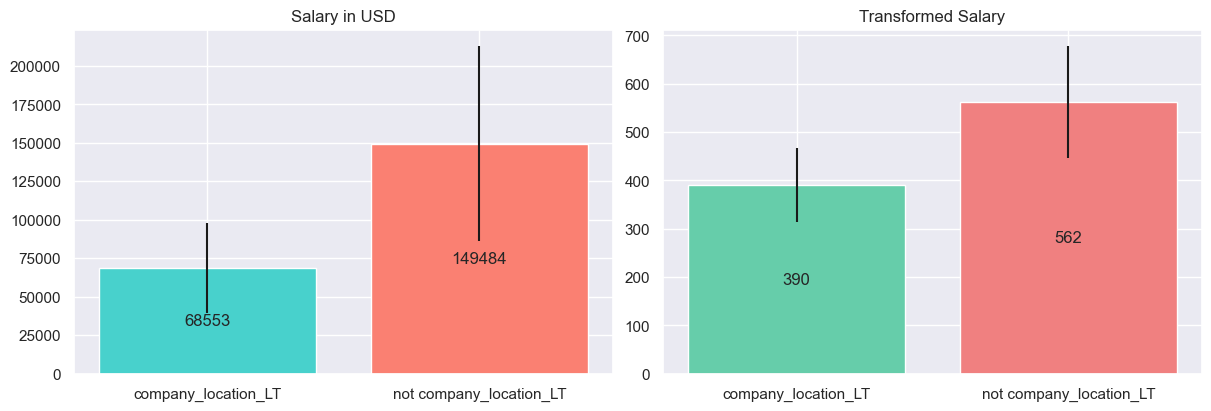

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_LV                                                    
0                          149486  63384  14540                562  116
1                           54734  19875     14                353   59

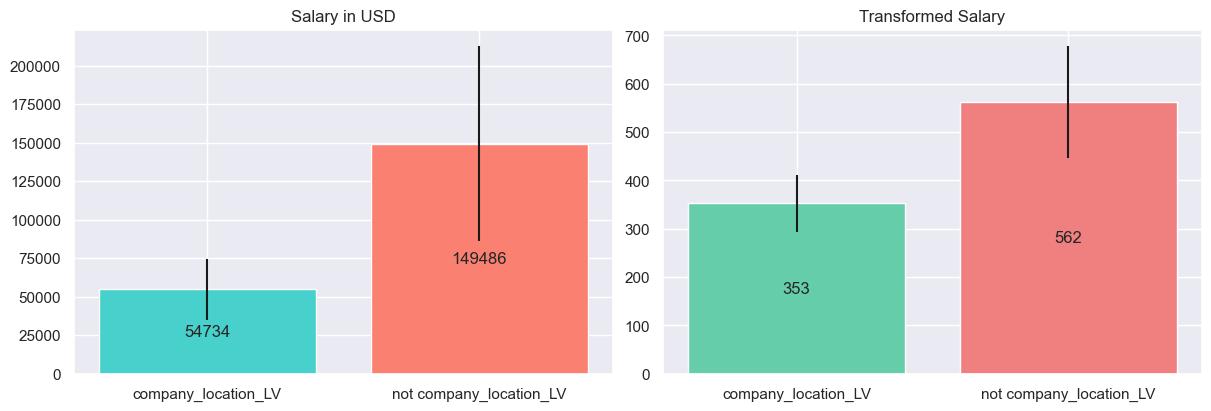

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_MX                                                    
0                          149451  63393  14541                562  116
1                           87007  70236     13                415  160

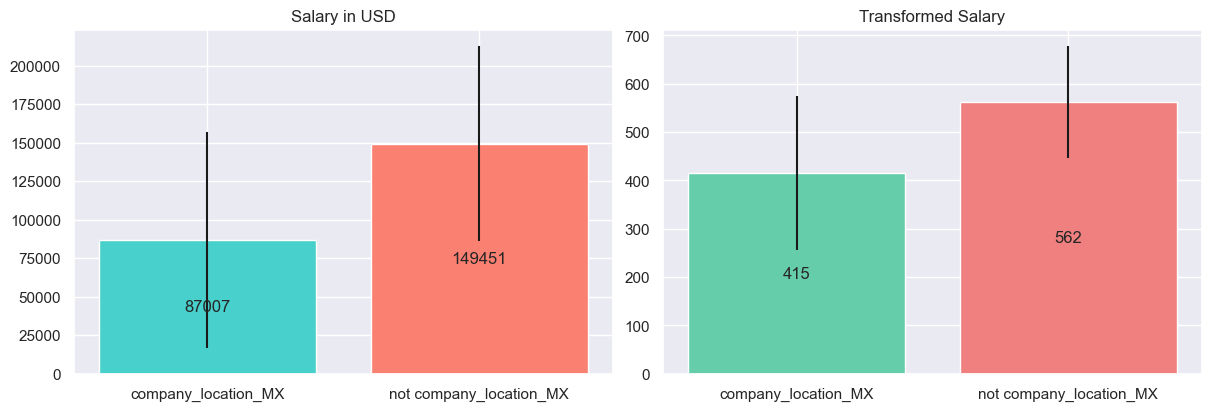

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_NG                                                    
0                          149436  63400  14547                562  116
1                           64857  61066      7                362  141

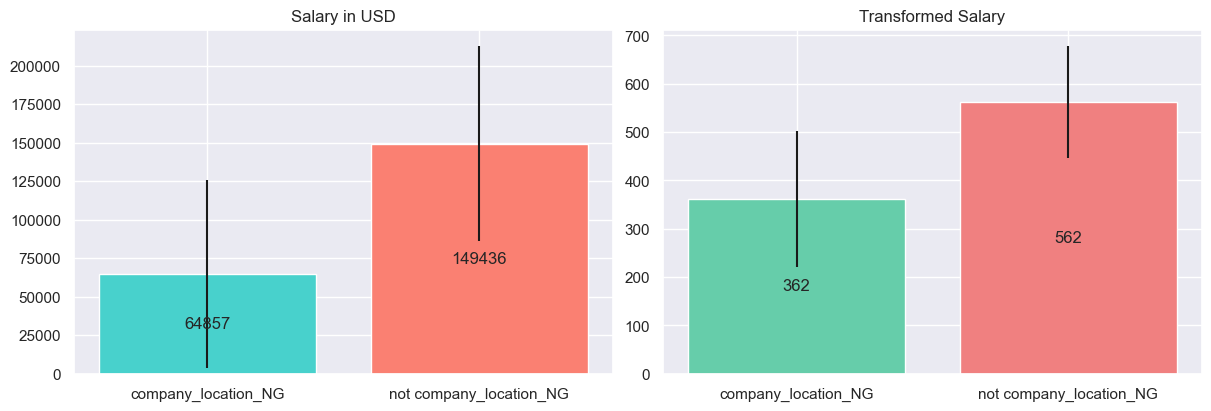

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_NL                                                    
0                          149529  63394  14527                562  116
1                           77218  30223     27                413   80

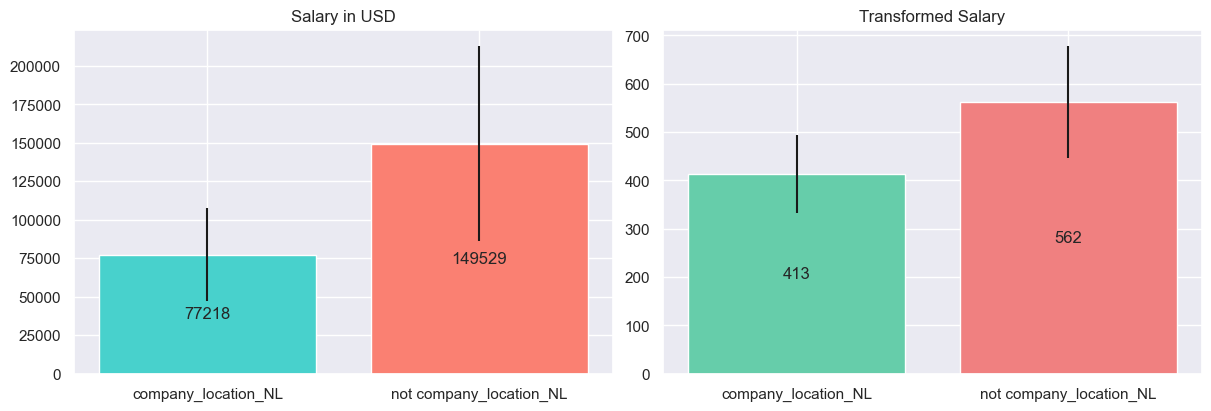

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_NZ                                                    
0                          149394  63432  14549                562  116
1                          152218  35137      5                578   61

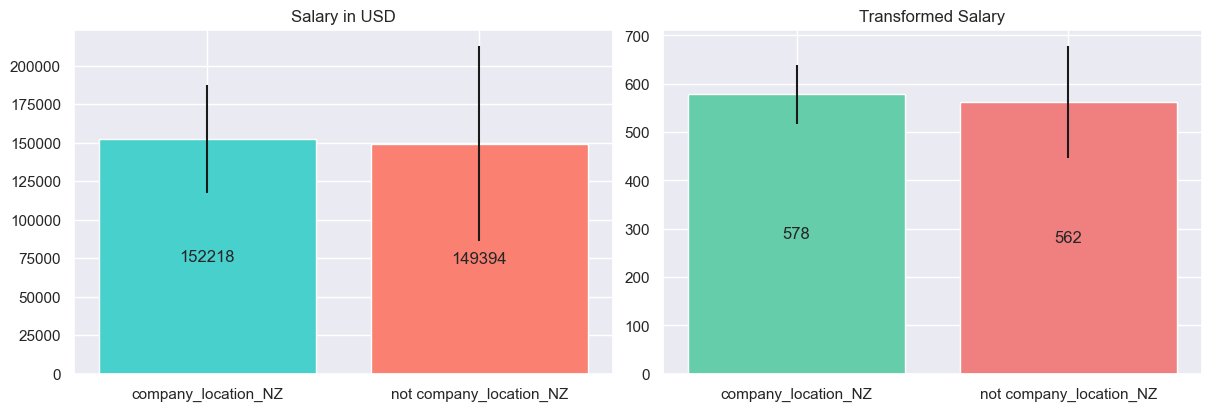

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_PH                                                    
0                          149427  63410  14549                562  116
1                           55720  27981      5                351   88

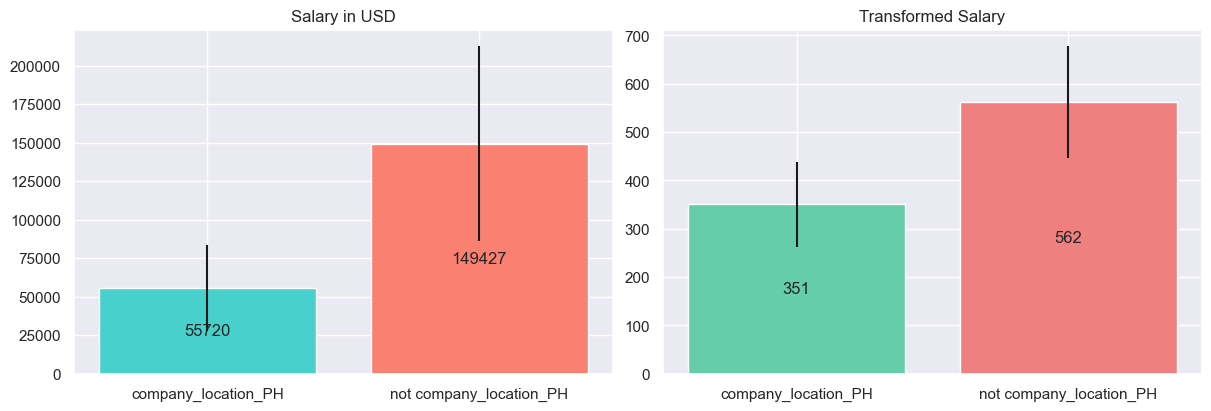

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_PL                                                    
0                          149451  63404  14541                562  116
1                           86787  56866     13                424  132

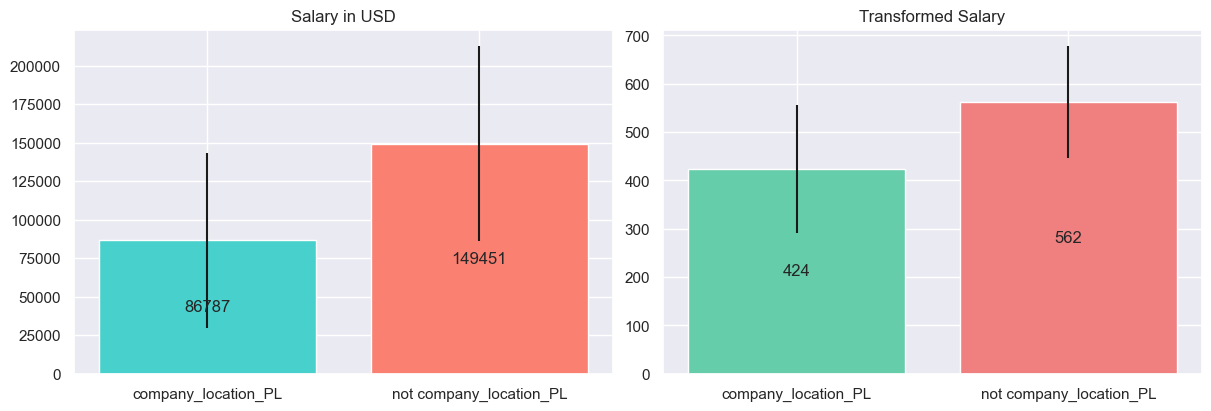

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_PT                                                    
0                          149578  63334  14527                562  116
1                           51115  22826     27                338   73

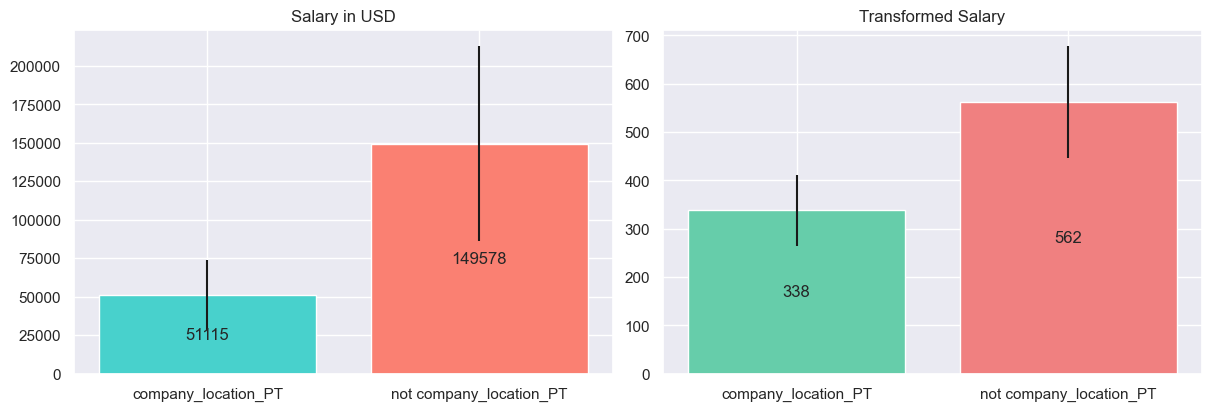

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_SI                                                    
0                          149434  63407  14548                562  116
1                           56186  28245      6                353   84

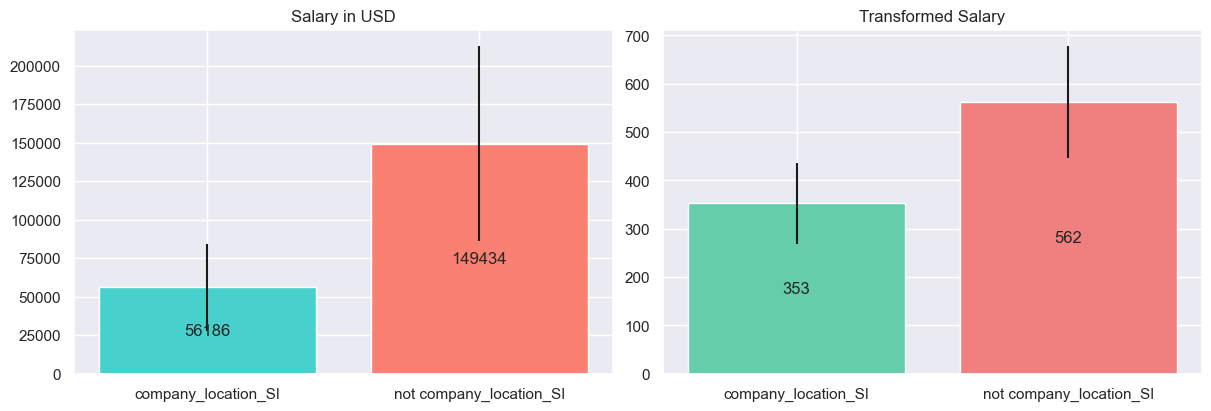

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_UA                                                    
0                          149425  63411  14544                562  116
1                          105600  70596     10                467  142

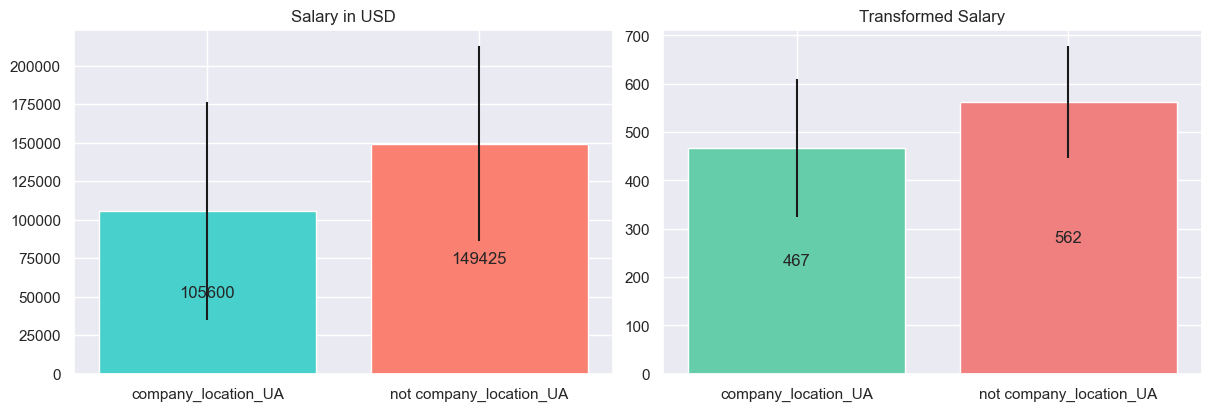

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_US                                                    
0                           98627  60588   1691                453  128
1                          156069  60710  12863                576  107

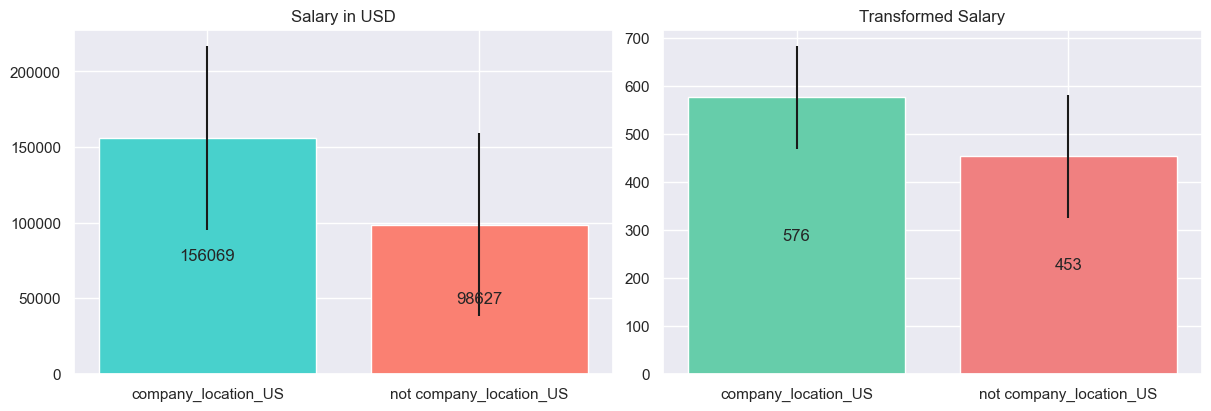

salary_in_usd               transformed_salary     
                             mean    std  count               mean  std
company_location_ZA                                                    
0                          149484  63386  14540                562  116
1                           57308  24142     14                359   66

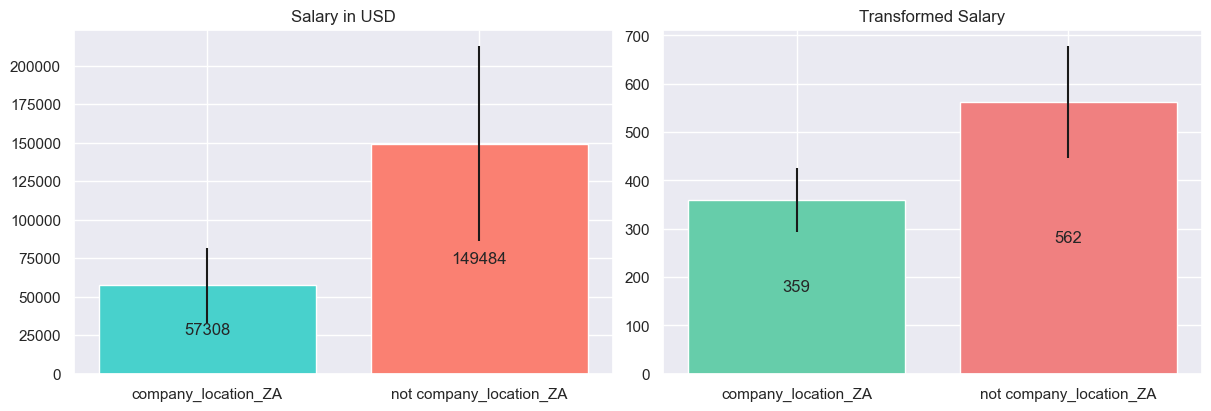

salary_in_usd               transformed_salary     
                        mean    std  count               mean  std
company_size_L                                                    
0                     149729  62790  13637                563  114
1                     144436  72056    917                547  140

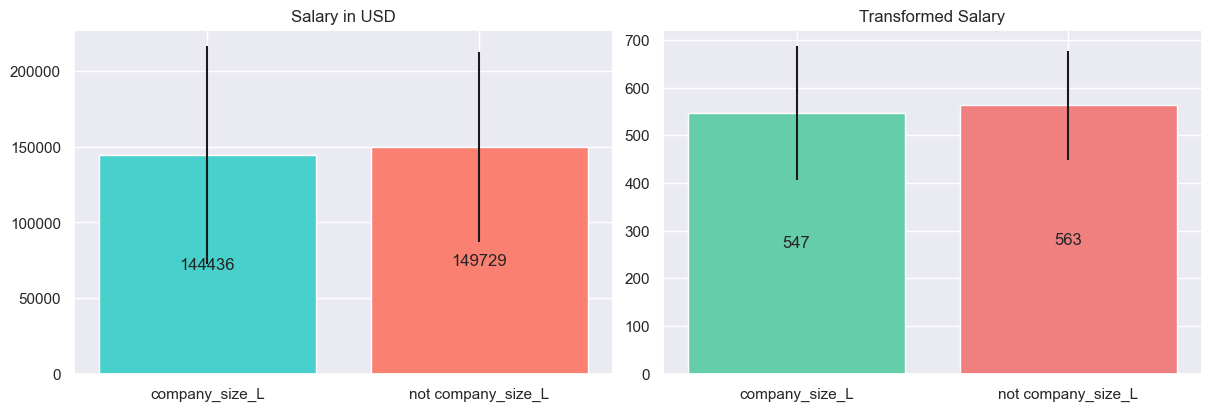

salary_in_usd               transformed_salary     
                        mean    std  count               mean  std
company_size_M                                                    
0                     138129  72823   1043                533  144
1                     150265  62559  13511                564  114

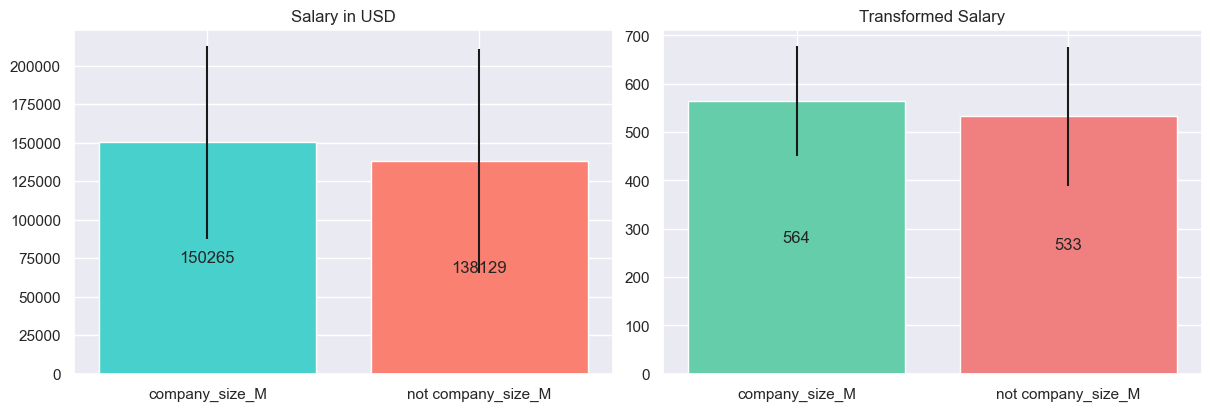

salary_in_usd               transformed_salary     
                        mean    std  count               mean  std
company_size_S                                                    
0                     149894  63218  14428                563  116
1                      92233  61197    126                436  132

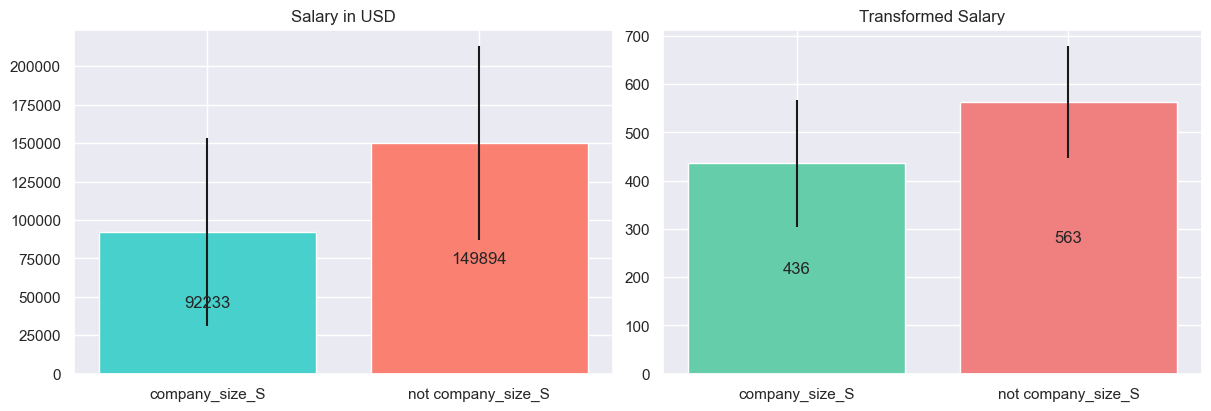

In [35]:
diffs = {}

aux = new_X.groupby('work_year')[['salary_in_usd', 'transformed_salary']].agg(['mean', 'std', 'count']).iloc[:,:5].astype(int)
display(aux)
for year in aux.index:
    diffs['work_year_' + str(year)] = aux.loc[year,('transformed_salary', 'mean')] - avg
    diffs['work_year_' + str(year)] = (diffs['work_year_' + str(year)], 
                                       abs(diffs['work_year_' + str(year)])/aux.loc[year,('transformed_salary', 'std')],
                                       aux.loc[year,('salary_in_usd', 'count')])

for var in new_X.columns[1:-2]:
    aux = new_X.groupby(var)[['salary_in_usd', 'transformed_salary']].agg(['mean', 'std', 'count']).iloc[:,:5].astype(int)
    display(aux)
    diffs[var] = aux.loc[1,('transformed_salary', 'mean')] - avg
    diffs[var] = (diffs[var], 
                  abs(diffs[var])/aux.loc[1,('transformed_salary', 'std')], 
                  aux.loc[1,('salary_in_usd', 'count')])
    plotting(var)

In [36]:
diffs = pd.DataFrame(diffs, index=['differences', 'abs_z_score', 'counts']).transpose()
diffs.sort_values('abs_z_score', ascending=False)

differences  abs_z_score   counts
job_name_Insight         -232.492204     9.299688     12.0
company_location_EE      -241.492204     8.049740     11.0
employee_residence_EE    -241.492204     8.049740     11.0
salary_currency_PLN      -271.492204     5.776430      6.0
salary_currency_INR      -286.492204     4.213121     49.0
employee_residence_AT    -167.492204     4.085176     10.0
company_location_AT      -166.492204     4.060785     10.0
job_name_Associate       -169.492204     4.035529      5.0
company_location_IT      -227.492204     3.610987     14.0
employee_residence_LV    -209.492204     3.550715     14.0
company_location_LV      -209.492204     3.550715     14.0
company_location_AR      -164.492204     3.426921      7.0
employee_residence_AR    -186.492204     3.390767     11.0
employee_residence_GR    -222.492204     3.133693     16.0
company_location_GR      -220.492204     3.105524     14.0
employee_residence_ZA    -203.492204     3.083215     14.0
company_location_ZA      -203.492204     3.083215     14.0
company_location_PT      -224.492204     3.075236     27.0
employee_residence_PH    -223.492204     2.940687      7.0
employment_type_FL       -234.492204     2.791574      7.0
company_location_IN      -267.492204     2.674922     57.0
employee_residence_PT    -217.492204     2.620388     30.0
company_location_ES      -208.492204     2.606153    126.0
company_location_BR      -186.492204     2.554688     17.0
employee_residence_SI    -209.492204     2.493955      6.0
company_location_SI      -209.492204     2.493955      6.0
employee_residence_IT    -215.492204     2.476922     21.0
company_location_PH      -211.492204     2.403320      5.0
employee_residence_ES    -204.492204     2.377816    128.0
salary_currency_EUR      -186.492204     2.274295    392.0
employee_residence_IN    -250.492204     2.256687     66.0
company_location_LT      -172.492204     2.240158     16.0
employee_residence_LT    -172.492204     2.240158     16.0
salary_currency_AUD      -140.492204     2.036119     11.0
employee_residence_NL    -146.492204     2.006743     27.0
employee_residence_BR    -170.492204     1.959681     19.0
company_location_NL      -149.492204     1.868653     27.0
employee_residence_CO    -144.492204     1.829015     16.0
company_location_CO      -144.492204     1.829015     16.0
employee_residence_NG    -233.492204     1.768880     10.0
salary_currency_GBP      -145.492204     1.598815    557.0
company_location_NG      -200.492204     1.421931      7.0
job_name_Quality         -131.492204     1.398853     29.0
employment_type_PT       -186.492204     1.351393     20.0
employee_residence_PL    -158.492204     1.191671     14.0
employee_residence_IE     -81.492204     1.181046     12.0
company_location_IE       -81.492204     1.181046     12.0
work_abroad              -153.492204     1.180709     63.0
company_location_FR      -138.492204     1.154102     58.0
job_name_Specialist      -104.492204     1.123572    139.0
job_name_Big             -161.492204     1.098586     12.0
employee_residence_FR    -136.492204     1.091938     63.0
job_name_Consultant       -77.492204     1.091439     87.0
experience_level_EN      -116.492204     1.078632   1080.0
remote_ratio_Hybrid      -144.492204     1.078300    194.0
company_location_PL      -138.492204     1.049183     13.0
employee_residence_GB    -115.492204     1.031180    641.0
company_location_GB      -115.492204     1.031180    646.0
job_name_Director         111.507796     1.023007     42.0
company_location_DE      -114.492204     0.978566     91.0
company_size_S           -126.492204     0.958274    126.0
company_location_MX      -147.492204     0.921826     13.0
employee_residence_DE    -106.492204     0.918036     87.0
job_name_Strategist       -77.492204     0.911673     28.0
job_name_Analyst          -81.492204     0.876260   2602.0
employee_residence_MX    -144.492204     0.870435     12.0
job_name_Developer        -75.492204     0.803109    215.0
job_name_Inte

In [37]:
diffs.sort_values('differences', ascending=False)

differences  abs_z_score   counts
job_name_Director         111.507796     1.023007     42.0
job_name_Head              97.507796     0.755874     63.0
experience_level_EX        76.507796     0.689259    433.0
job_name_Applied           67.507796     0.661841    406.0
job_name_Machine           64.507796     0.591815   1931.0
job_name_Infrastructure    55.507796     0.504616     49.0
job_name_Prompt            53.507796     0.509598     14.0
job_name_Deep              50.507796     0.295367     13.0
job_name_Software          44.507796     0.306950     30.0
job_name_Decision          39.507796     0.718324     38.0
job_name_Research          38.507796     0.300842    861.0
job_name_Vision            36.507796     0.231062     33.0
job_name_Architect         34.507796     0.335027    399.0
job_name_Principal         32.507796     0.240798     18.0
job_name_Robotics          30.507796     0.287809     14.0
experience_level_SE        26.507796     0.252455   9593.0
job_name_AI                25.507796     0.173522    168.0
job_name_Scientist         23.507796     0.209891   4545.0
job_name_Engineer          20.507796     0.181485   6117.0
employee_residence_NZ      15.507796     0.254226      5.0
company_location_NZ        15.507796     0.254226      5.0
employee_residence_US      14.507796     0.136866  12836.0
company_location_US        13.507796     0.126241  12863.0
job_name_Cloud             12.507796     0.142134     19.0
salary_currency_USD        12.507796     0.115813  13483.0
work_year_2023              8.507796     0.074630   8433.0
job_name_Analytics          7.507796     0.076610    484.0
remote_ratio_On_Site        5.507796     0.047481   9729.0
job_name_Ops                5.507796     0.058594     22.0
company_size_M              1.507796     0.013226  13511.0
employment_type_FT         -0.492204     0.004243  14506.0
job_name_Lead              -0.492204     0.003281     96.0
job_name_Database          -2.492204     0.034614     13.0
work_year_2024             -3.492204     0.029848   4270.0
job_name_Product           -3.492204     0.032039     43.0
remote_ratio_Remote        -6.492204     0.058488   4631.0
employee_residence_CA      -8.492204     0.079366    381.0
company_location_CA        -9.492204     0.087084    383.0
company_size_L            -15.492204     0.110659    917.0
job_name_Manager          -20.492204     0.182966    447.0
company_location_EG       -22.492204     0.156196     13.0
job_name_Practitioner     -24.492204     0.275193     16.0
employee_residence_CH     -25.492204     0.194597      8.0
salary_currency_CHF       -25.492204     0.194597      8.0
work_year_2022            -26.492204     0.236538   1611.0
employee_residence_AU     -31.492204     0.231560     48.0
job_name_Modeler          -32.492204     0.401138     50.0
employee_residence_EG     -32.492204     0.227218     14.0
company_location_AU       -33.492204     0.244469     50.0
job_name_Intelligence     -47.492204     0.461089    648.0
job_name_NLP              -47.492204     0.306401     15.0
job_name_Business         -49.492204     0.475887    663.0
experience_level_MI       -49.492204     0.454057   3448.0
job_name_Owner            -52.492204     0.318135      6.0
job_name_Visualization    -53.492204     0.607866     18.0
job_name_ETL              -58.492204     0.504243     31.0
company_location_CH       -58.492204     0.372562      9.0
job_name_Operations       -60.492204     0.549929     80.0
employment_type_CT        -73.492204     0.403803     21.0
job_name_Integration      -75.492204     0.794655     45.0
job_name_Developer        -75.492204     0.803109    215.0
job_name_Strategist       -77.492204     0.911673     28.0
job_name_Consultant       -77.492204     1.091439     87.0
job_name_Analyst          -81.492204     0.876260   2602.0
employee_residence_IE     -81.492204     1.181046     12.0
company_location_IE       -81.492204     1.181046     12.0
salary_currency_CAD       -81.492204     0.776116     48.0
job_name_Fina